# Sorteio de comportamentos não-sinalizantes

Usarei a biblioteca $hopsy$ para sortear comportamentos uniformemente distribuídos no politopo não sinalizante.

$hopsy$ é a tentativa de oferecer algumas das principais funcionalidades dos $hops$ através de uma interface Python. $hops$ é uma biblioteca C++ altamente baseada em templates para amostragem Monte Carlo de cadeia de Markov em politopos convexos

$$
P = \{x: Ax \leq b \}
$$

## Quadrado de lado 1

In [1]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sorting import sorteio
from npateste import npatest



In [2]:
start = [1.0]
2*start

[1.0, 1.0]

In [3]:
# Definindo "A" e "b" para gerar o politopo "P"


A = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])
b = np.array([[1], [1], [0], [0]])


In [4]:
# next we construct a 2-dim standard Gaussian
#model = hopsy.Gaussian(dim=2)

# the complete problem is defined by the target distribution and the constrained domain, 
# defined by the above mentioned inequality
problem = hopsy.Problem(A, b)

# the run object contains and constructs the markov chains. in the default case, the
# Run object will have a single chain using the Hit-and-Run proposal algorithm and is
# set to produce 10,000 samples.
mc = hopsy.MarkovChain(problem, proposal=hopsy.GaussianHitAndRunProposal, starting_point=[0.0, 0.0])
rng = hopsy.RandomNumberGenerator()

# call sample on the mc and rng objects 
acceptance_rate, states = hopsy.sample(mc,rng, n_samples=1000, thinning=3)




In [5]:
states = np.array(states)


x = states[0][:,0]
y = states[0][:,1]

# the states have 3 dimensions: number of chains, number of samples, number of dimensions.
print(states)

[[[0.06677217 0.73330303]
  [0.2849779  0.65626719]
  [0.00989473 0.36384867]
  ...
  [0.81408167 0.5460253 ]
  [0.24024794 0.48182867]
  [0.04428858 0.03377142]]]


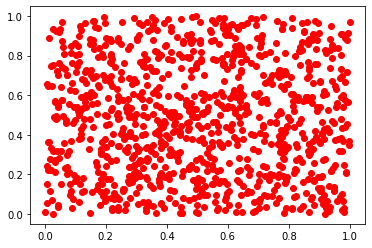

In [6]:
plt.scatter(x,y, color='red')
plt.show()

## Cubo de lado 1

Agora vamos fazer o teste com um cubo de lado 1. Neste caso, temos que ter

$$
A = \left(\begin{array}{cc} 
 1 & 0 & 0 \\ 
 0 & 1 & 0\\
 0 & 0 & 1\\
 -1 & 0 & 0\\
 0 & -1 & 0\\
 0 & 0 & -1 
 \end{array}\right) \ \ \ \ \ \ \ \ \ \ \ \ b = \left(\begin{array}{c} 
 1 \\ 
 1 \\
 1 \\
 0 \\
 0 \\
 0
 \end{array}\right) 
$$

Com esses valores de $A$ e $b$, $P = \{x: Ax \leq b \}$ é, da fato, um cubo de lado 1

$$
0 \geq x_1 \leq 1  
$$

$$
0 \geq x_2 \leq 1
$$

$$
0 \geq x_3 \leq 1
$$

In [7]:
from sorting import sorteio

A_cubo = np.array([[1,0,0], [0,1,0], [0,0,1], [-1,0,0], [0,-1,0], [0,0,-1]])

b_cubo = np.array([[1], [1], [1], [0], [0], [0]])


In [8]:
sorteio_cubo = sorteio(A_cubo,b_cubo,1000)
sorteio_cubo

array([[[0.51861456, 0.95991003, 0.89436152],
        [0.83861951, 0.11716725, 0.57859057],
        [0.98946051, 0.56777502, 0.34982224],
        ...,
        [0.56722009, 0.30627575, 0.93613098],
        [0.44103848, 0.48174735, 0.86675961],
        [0.61042135, 0.47856689, 0.88892759]]])

In [9]:
x = sorteio_cubo[0][:,0]
y = sorteio_cubo[0][:,1]
z = sorteio_cubo[0][:,2]
print(len(x))

1000


/tmp/ipykernel_12139/522239054.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  grafico = figura.gca(projection='3d')


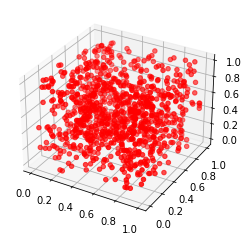

In [10]:
#gráficos em 3D

figura = plt.figure()
grafico = figura.gca(projection='3d')

grafico.scatter(x,y,z, color='red')
plt.show()

/tmp/ipykernel_12139/3150978398.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


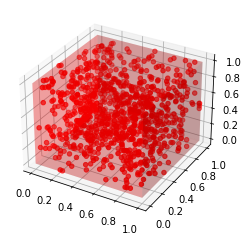

In [11]:
# Vizualizando os pontos dentro do cubo

# Create axis
axes = [1, 1, 1]
  
# Create Data
data = np.ones(axes, dtype=np.bool)
  
# Controll Tranperency
alpha = 0.2
  
# Control colour
colors = np.empty(axes + [4], dtype=np.float32)
  
colors[:] = [1, 0, 0, alpha]  # red
  
# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
  
# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors)
ax.scatter(x,y,z, color='red')



## Para o politopo não-sinalizante

Dado o caso de CHSH, i.e., cenário de Bell (2,2,2), sortearei pontos dentro do politopo não-sinalizante $P_{\mathcal{NS}}$. Preferirei fazer isso na representação de correlatores. As desigualdades que caracterizam o politopo não sinalizante são as desigualdades de não-negatividade das probabilidades. Uma vez que

$$
p(a,b|x,y) = \frac{1}{4} \left[ 1 + (-1)^a \left<A_x\right> + (-1)^b \left<B_y\right> + (-1)^{(a+b)} \left<A_xB_y\right> \right]
$$

e

$$
p(a,b|x,y) \geq 0
$$

logo

$$
\frac{1}{4} \left[ 1 + (-1)^a \left<A_x\right> + (-1)^b \left<B_y\right> + (-1)^{(a+b)} \left<A_xB_y\right> \right] \geq 0.
$$

Mas, no código, teremos que implementar a desigualdade invertida

$$
- \left[ (-1)^a \left<A_x\right> + (-1)^b \left<B_y\right> + (-1)^{(a+b)} \left<A_xB_y\right> \right] \leq 1
$$

In [12]:

A_NS = np.array([[-0.25, -0.  , -0.25, -0.  , -0.25, -0.  , -0.  , -0.  ],
       [-0.25, -0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ],
       [ 0.25, -0.  , -0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ],
       [ 0.25, -0.  ,  0.25, -0.  , -0.25, -0.  , -0.  , -0.  ],
       [-0.25, -0.  , -0.  , -0.25, -0.  , -0.25, -0.  , -0.  ],
       [-0.25, -0.  , -0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  ],
       [ 0.25, -0.  , -0.  , -0.25, -0.  ,  0.25, -0.  , -0.  ],
       [ 0.25, -0.  , -0.  ,  0.25, -0.  , -0.25, -0.  , -0.  ],
       [-0.  , -0.25, -0.25, -0.  , -0.  , -0.  , -0.25, -0.  ],
       [-0.  , -0.25,  0.25, -0.  , -0.  , -0.  ,  0.25, -0.  ],
       [-0.  ,  0.25, -0.25, -0.  , -0.  , -0.  ,  0.25, -0.  ],
       [-0.  ,  0.25,  0.25, -0.  , -0.  , -0.  , -0.25, -0.  ],
       [-0.  , -0.25, -0.  , -0.25, -0.  , -0.  , -0.  , -0.25],
       [-0.  , -0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ,  0.25],
       [-0.  ,  0.25, -0.  , -0.25, -0.  , -0.  , -0.  ,  0.25],
       [-0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  , -0.  , -0.25]])
       

b_NS = (1/4)*np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])

In [13]:
sorteio_NS = sorteio(A_NS,b_NS,10000)

In [14]:
print(sorteio_NS)

[[[ 0.03437045  0.02452807  0.20260051 ... -0.11887262  0.1384858
   -0.08681084]
  [ 0.03173303  0.72013458  0.10958613 ... -0.34933151 -0.15528954
    0.22104989]
  [ 0.09738304  0.71331641  0.15742337 ... -0.37537797 -0.09030464
    0.22763035]
  ...
  [ 0.15499236  0.4702021   0.0491705  ...  0.57358218 -0.00141915
    0.0840102 ]
  [ 0.32909344  0.26781884 -0.11277999 ...  0.54361697 -0.33716423
   -0.06273115]
  [ 0.09426975  0.34500982 -0.13952988 ...  0.24750812 -0.26310732
    0.08495159]]]


In [15]:
A0 = sorteio_NS[0][:,0]
A1 = sorteio_NS[0][:,1]
B0 = sorteio_NS[0][:,2]
B1 = sorteio_NS[0][:,3]
A0B0 = sorteio_NS[0][:,4]
A0B1 = sorteio_NS[0][:,5]
A1B0 = sorteio_NS[0][:,6]
A1B1 = sorteio_NS[0][:,7]

In [16]:
%%timeit
for i in range(len(A0)):
    P = np.array([A0[i],A1[i],B0[i],B1[i],A0B0[i],A0B1[i],A1B0[i],A1B1[i]])
    
    print(P)

[ 0.03437045  0.02452807  0.20260051 -0.0920351  -0.00112219 -0.11887262
  0.1384858  -0.08681084]
[ 0.03173303  0.72013458  0.10958613  0.02854855 -0.34445873 -0.34933151
 -0.15528954  0.22104989]
[ 0.09738304  0.71331641  0.15742337 -0.0204316  -0.28746301 -0.37537797
 -0.09030464  0.22763035]
[ 0.02478565  0.72115295  0.07212039  0.01353419 -0.29987413 -0.41448686
 -0.1805814   0.17204117]
[-0.36843811  0.47003684 -0.15580281 -0.19239328  0.34783735 -0.27530199
  0.25591366  0.20155169]
[-0.42856413  0.23734779 -0.10549168 -0.24790254  0.30650073 -0.26547379
  0.27413638  0.11605095]
[-0.40738477  0.15893113 -0.16106447 -0.12588696  0.3373387  -0.25595698
  0.40009394 -0.02745933]
[-0.58879933  0.14491967 -0.23899149 -0.04340077  0.4642864  -0.25244221
  0.46581647 -0.17419916]
[-0.43642054  0.27366321 -0.08005432 -0.04743634  0.35017917 -0.26765053
  0.61130157 -0.13975415]
[-0.37819772  0.24203114 -0.07492958  0.30218766  0.36309625 -0.76234218
  0.61939976 -0.2236538 ]
[-0.398197

[ 0.20687491 -0.44913181  0.31787043 -0.11988691 -0.12704769  0.55764887
  0.20215695 -0.23905908]
[ 0.08884112 -0.41648944  0.36747953 -0.02040477 -0.34498447  0.66024566
  0.12885095 -0.30569676]
[ 0.10621387 -0.08976269  0.27421042  0.14605539 -0.43909681  0.54250082
  0.2160626  -0.66839117]
[ 0.13120336  0.09152139  0.22642996  0.08811052 -0.5524525   0.67640732
  0.26676421 -0.72853164]
[-0.03476356 -0.15490726  0.28757178  0.09164053 -0.32462982  0.65770202
  0.18122362 -0.57370721]
[-0.32402037 -0.09120321  0.2914692   0.04771363 -0.23690736  0.52170258
  0.18662932 -0.83492841]
[-0.29999931 -0.15459654  0.45760918  0.20478447 -0.06901898  0.43102573
  0.38180517 -0.80250411]
[-0.25063345 -0.04556799  0.35388889  0.11688554 -0.01034592  0.24933815
  0.36046317 -0.88757635]
[-0.27382426  0.03353224  0.35516875 -0.02227417  0.13886368  0.14910952
  0.5703981  -0.84733004]
[-0.35775404 -0.10909877  0.32628611  0.07486602  0.18909018  0.06565994
  0.43764639 -0.9141528 ]
[-0.218219

[ 0.60804206 -0.08774651 -0.21221295 -0.74466443 -0.55499717 -0.84554043
  0.84799532  0.27931755]
[ 0.60035095 -0.08530535 -0.2084751  -0.75345132 -0.56713004 -0.82123163
  0.8510271   0.3055758 ]
[ 0.58495848 -0.07527309 -0.24888105 -0.71684663 -0.58196686 -0.83664278
  0.82372439  0.32041839]
[ 0.56130139 -0.10223019 -0.26792204 -0.69149292 -0.60293956 -0.85796428
  0.83376469  0.3212186 ]
[ 0.5928827  -0.19144005 -0.22125724 -0.68057983 -0.57118101 -0.7217438
  0.81550793  0.35606898]
[ 0.46307183 -0.32804644 -0.30741044 -0.84043046 -0.53610879 -0.55723805
  0.94237657  0.37247108]
[ 0.49708286 -0.39947137 -0.33180021 -0.82534806 -0.51625131 -0.5254443
  0.91589993  0.35068962]
[ 0.44151858 -0.39517537 -0.4971239  -0.86841642 -0.44505341 -0.53083792
  0.76673395  0.47460577]
[ 0.44389649 -0.40922599 -0.49202593 -0.76057866 -0.50137272 -0.32976653
  0.81634689  0.60698796]
[ 0.44530067 -0.42155291 -0.49964026 -0.75034575 -0.50106824 -0.30798342
  0.83100864  0.5977236 ]
[ 0.36354126

[ 0.56693476  0.02191301  0.15873346 -0.78230017  0.25908795 -0.67541206
 -0.7327979  -0.09509401]
[ 0.53137199  0.02411496  0.11526195 -0.73271853  0.25643075 -0.68437033
 -0.84153658  0.01920025]
[ 0.50375873  0.01880325  0.17103094 -0.64546118  0.31329027 -0.75341777
 -0.72078945  0.22633267]
[ 0.50353825  0.02860669  0.22696398 -0.68774318  0.34485613 -0.7956205
 -0.71609038  0.18156097]
[ 0.42412465 -0.02804006  0.2364069  -0.67544661  0.52831605 -0.72252288
 -0.75457921  0.06598975]
[ 0.43602547 -0.02372381  0.2361448  -0.68447875  0.51969629 -0.69918316
 -0.75914446  0.07023275]
[ 0.442188   -0.02334559  0.24124132 -0.6879226   0.52320666 -0.70294539
 -0.76978028  0.07184197]
[ 0.42196161 -0.04077319  0.20710066 -0.74696741  0.57524694 -0.67435991
 -0.78197076  0.09237672]
[ 0.55426248  0.03452562  0.19100545 -0.66098329  0.56456262 -0.71466372
 -0.67995161  0.01002838]
[ 0.46422994  0.03053421  0.0422952  -0.58781785  0.51391771 -0.69923091
 -0.83716196  0.08782334]
[ 0.4612036

[-0.34017594  0.36753098  0.20974036  0.56376116 -0.24709602 -0.62448926
  0.37206505  0.31282976]
[-0.29602853  0.4934714   0.22801611  0.46126721 -0.32113454 -0.6699239
  0.29006301  0.05601695]
[-0.32476527  0.65983401 -0.01208612  0.24227032 -0.22321466 -0.811809
  0.02573821  0.03379898]
[-0.23895037  0.64740354  0.07409239  0.17114407 -0.09585678 -0.71897055
  0.0414024   0.06858501]
[-0.09120826  0.36370749 -0.14069702  0.1221415  -0.68623313 -0.44861466
 -0.06052007  0.16399541]
[-0.05147965  0.38263561 -0.2052878   0.13614948 -0.62630728 -0.39405289
 -0.06415665  0.21612206]
[ 0.1050559   0.10021618 -0.3437085   0.127621   -0.0148039  -0.66561966
  0.02225425  0.29801394]
[-0.1112743  -0.26283295 -0.65722712 -0.01745387 -0.10725852 -0.70493742
  0.50013114  0.45379694]
[-0.09317735 -0.38853783 -0.49470385  0.0019146  -0.05884697 -0.68847413
  0.48405876  0.44744053]
[-0.03512621 -0.10337519 -0.43624471  0.0560887  -0.07646432 -0.56701224
  0.42216503  0.05404451]
[-0.22300786 

 -0.43071286  0.65744393]
[-0.24912278 -0.53935707  0.32289544 -0.46361601 -0.35965527  0.76217416
 -0.519525    0.12739416]
[-0.19248845 -0.51679299  0.21013016 -0.48007663 -0.12543076  0.70959477
 -0.66291227  0.29504936]
[-0.2009     -0.26291821  0.11125288 -0.37709154 -0.21687339  0.66184722
 -0.84556556  0.28117782]
[-0.1997796  -0.18836661  0.10688341 -0.40856211 -0.31301341  0.62315976
 -0.8674709   0.29191022]
[-0.16635331 -0.16804731  0.13963692 -0.42544038 -0.36026261  0.63373941
 -0.84177915  0.27035966]
[-0.41722676 -0.18852971  0.25482845 -0.69906235 -0.55225935  0.46789267
 -0.89103318  0.32434655]
[-0.41287088 -0.1958157   0.26778129 -0.76953231 -0.58995387  0.4551811
 -0.89957651  0.14645128]
[-0.4858002  -0.25541919  0.17493645 -0.79743032 -0.57321542  0.41494356
 -0.89423029  0.07982657]
[-0.38347359 -0.23316481  0.21173684 -0.66851973 -0.57360512  0.20652969
 -0.92436945  0.1425868 ]
[-0.55276656 -0.31541904  0.24520904 -0.667046   -0.46086757  0.26178896
 -0.8738167

[-0.4678866   0.50879735  0.22475054  0.07614323 -0.56997116  0.04296577
 -0.04495118  0.47161408]
[ 0.26622992  0.13151592  0.14622003  0.13421996 -0.0824613  -0.0310126
 -0.10425968  0.45270057]
[0.28098695 0.30649432 0.15219348 0.0489342  0.01103862 0.18632817
 0.00555356 0.66430455]
[-0.02828447 -0.06190849  0.33608691  0.61267569  0.41503633 -0.0614715
  0.11494859  0.30941663]
[-0.26385438  0.45532031  0.15836809  0.39415118  0.50321082  0.04681154
 -0.14181384  0.51233881]
[-0.28838585  0.28733185  0.18520927  0.47363647  0.46218246 -0.01111378
 -0.04854048  0.65791384]
[-0.18822769  0.32662188  0.08459371  0.34456456  0.44019192 -0.14297459
 -0.02106828  0.55058785]
[-0.33322784  0.36298919  0.17038449  0.42120913  0.42599777 -0.25384539
 -0.04389658  0.53942826]
[-0.23636628  0.41437268  0.39671367  0.72517362  0.29561298 -0.11969372
  0.12191758  0.60221771]
[-0.24760993  0.43615057  0.14149509  0.64975411  0.32610807  0.03200934
  0.5997853   0.57872988]
[-0.1451693   0.0882

[-0.20135768 -0.00816491  0.01359203  0.04252059 -0.77089757 -0.12141833
 -0.00355151  0.67126385]
[-0.21383883 -0.00297674  0.02391593  0.03739578 -0.76511628 -0.11742641
 -0.00820728  0.65094183]
[-0.1144845  -0.12456884 -0.06244727  0.11864948 -0.80028914 -0.33532822
  0.08498496  0.55837794]
[-9.32567121e-02  1.36000595e-01 -8.39891667e-02  4.05464697e-04
 -8.17409890e-01 -1.59381673e-01  9.06226550e-02  6.20416608e-01]
[ 0.36612343 -0.24465324 -0.14726057 -0.27554165 -0.65031498 -0.29546674
  0.03206479  0.81497069]
[ 0.34505888 -0.40143008 -0.11837996 -0.26699368 -0.64382093 -0.32587578
  0.0547619   0.70468838]
[ 0.24028293 -0.52313022  0.0324585  -0.34509788 -0.6215449  -0.18086554
 -0.00498116  0.73343562]
[ 0.14813933 -0.49618375  0.02277863 -0.34931421 -0.59863663 -0.3504564
 -0.06769863  0.75594665]
[ 0.02299132 -0.43786692  0.11037995 -0.28711735 -0.48823386 -0.31136178
 -0.02161707  0.65192205]
[ 0.01764932 -0.42471284  0.0949996  -0.29450498 -0.48502999 -0.31428504
 -0.0

  0.38113502  0.02022901]
[-0.24134721 -0.3637194  -0.01702901  0.02455843  0.1476716  -0.4056841
  0.26133533  0.04172827]
[-0.34642142 -0.55885819 -0.0542564   0.14028702 -0.0806659  -0.3474396
  0.39775139 -0.06504089]
[-0.24916194 -0.13826754 -0.07599131  0.29790444 -0.30051955 -0.18598387
  0.14625555  0.07089705]
[-0.17941336 -0.08197673 -0.00545055  0.31873585 -0.26892031 -0.15225152
  0.1327932   0.13770205]
[-0.14147203  0.24399058  0.0028961   0.25751737 -0.14783082  0.05816548
  0.16390697  0.25682945]
[-0.17542921  0.24962102 -0.14745787 -0.18359764 -0.25935193 -0.25322029
  0.3827433   0.21109107]
[-0.41524927  0.27501214 -0.30807463 -0.04000461 -0.27262569 -0.26286155
  0.31093079  0.27689477]
[ 0.04848348 -0.27842727  0.53651135  0.02865723  0.22623315 -0.10299916
 -0.55725393  0.29537113]
[ 0.06513823 -0.17985416  0.53358276  0.04150295  0.32078811 -0.21275049
 -0.53410462  0.25322988]
[ 0.06643234 -0.14958149  0.53604492  0.01391986  0.3251105  -0.19429666
 -0.5319937 

  0.418511   -0.57072618]
[-0.62452542 -0.63609869 -0.75633589  0.57465315  0.70762066 -0.86706592
  0.47855177 -0.66516228]
[-0.63545736 -0.6340323  -0.76112569  0.57073983  0.70633936 -0.87527672
  0.47732063 -0.68391867]
[-0.44748513 -0.48128971 -0.78881352  0.34774073  0.59950855 -0.83749149
  0.4612798  -0.83633979]
[-0.36606311 -0.43178586 -0.68842269  0.32456891  0.56095763 -0.86922479
  0.41465654 -0.87091192]
[-0.35853754 -0.41477287 -0.70885809  0.35902838  0.58506176 -0.87588054
  0.50209371 -0.88536065]
[-0.37489198 -0.4500669  -0.72478843  0.38105214  0.57546918 -0.82748564
  0.52255986 -0.8983499 ]
[-0.42284015 -0.47523519 -0.75780704  0.42013614  0.56949588 -0.83858912
  0.48139322 -0.87239404]
[-0.37713583 -0.40364901 -0.7549844   0.35861385  0.45913592 -0.84757252
  0.50922481 -0.87509585]
[-0.54619231 -0.53467529 -0.50142306  0.61990556  0.41949983 -0.89707625
  0.56613844 -0.88715966]
[-0.55248794 -0.55444355 -0.46851486  0.56893455  0.33340481 -0.85427075
  0.504509

  0.61917097  0.23173388]
[ 0.21815263  0.36679066  0.43034117 -0.35709456  0.48136791 -0.0992659
  0.75422202  0.06917029]
[-0.24988088  0.29756264  0.19220504 -0.23561261  0.20442253 -0.01622507
  0.50598716  0.15262076]
[-0.53551869 -0.10893104  0.55651812 -0.42327001 -0.11610391 -0.01519286
 -0.04367246  0.39374955]
[-0.63237725  0.22041137  0.40514498 -0.50591044 -0.21572122  0.51405701
  0.23660329 -0.00661994]
[-0.68447047  0.36367741  0.28826839 -0.43057401 -0.21794046  0.60635169
  0.36210973  0.18822837]
[-0.46897101  0.35937426  0.42730998 -0.48346178 -0.15579592  0.56121991
  0.15243792  0.02395532]
[-0.2520261  -0.11087416  0.37924865 -0.18993543 -0.40000618  0.82022968
  0.26155029  0.26965573]
[-0.16503285 -0.09362036  0.38368071 -0.31153573 -0.18884805  0.81003399
  0.42897825  0.36913238]
[-0.18878379 -0.11186028  0.31151031 -0.08769975 -0.09711633  0.63075229
  0.52655466  0.67418204]
[-0.19827213 -0.22815284  0.27523276  0.01896549 -0.2583597   0.71193972
  0.4820668

  0.3193148  -0.30039166]
[-0.22822437  0.11811223 -0.46188523  0.41886666 -0.14818431  0.34697669
  0.36690649 -0.17639454]
[-0.06414722  0.13402    -0.23563078  0.38861486 -0.02033324  0.39014173
  0.29779449 -0.35073724]
[ 0.18207171  0.16137986 -0.39300967 -0.01608642 -0.27483414  0.65373579
  0.33224663 -0.0425828 ]
[ 0.35350683  0.37933469 -0.2793912  -0.22014478 -0.03177984  0.28498772
 -0.09959308 -0.16301782]
[ 0.08443144  0.28162943  0.147994   -0.46272342 -0.19656492 -0.01544233
  0.18690958  0.05567453]
[-0.40075133  0.12063296  0.50899934 -0.43362584  0.03570078  0.04370563
  0.26592731 -0.07974115]
[-0.56289021  0.11893912  0.44475213 -0.45799646 -0.07796081  0.09581133
  0.27418987 -0.0851439 ]
[-0.62932492  0.12736329  0.37428605 -0.38119189 -0.00377798  0.22119083
  0.26214074 -0.03304843]
[-0.38856388  0.08619051  0.42172342 -0.37041247 -0.1256844   0.31908509
  0.07017006 -0.02496456]
[-0.34570764 -0.13939547  0.13083938 -0.54756533 -0.27470378  0.76864955
  0.097317

[-0.639871    0.1598615   0.31647822 -0.10462282 -0.28762912  0.34825765
 -0.06248031  0.68800647]
[-0.55931752 -0.09745763  0.30057544 -0.01279365 -0.08217625  0.4435774
 -0.08913015  0.62033246]
[ 0.04447289 -0.39709287  0.55540201 -0.28523087 -0.23104905  0.35927784
 -0.06949999  0.39016134]
[-0.10256316 -0.29970226  0.30462701 -0.26993956 -0.18945015 -0.16038566
 -0.60602551  0.58433114]
[-0.04323332 -0.52105168  0.39241165 -0.37841798 -0.12135317 -0.03864472
 -0.70670449  0.62824355]
[-0.12585973 -0.67425583  0.41953141 -0.62210406 -0.17969344  0.26205449
 -0.46250252  0.32137778]
[ 0.36083457 -0.69930942  0.22356321 -0.25025107 -0.39276049  0.05426069
 -0.02408082  0.39401792]
[ 0.23114229 -0.60856755  0.51191026 -0.48443743 -0.20911012  0.20732181
 -0.36458618  0.17657588]
[ 0.1374939  -0.48298919  0.22414593 -0.4921845  -0.34810982  0.28829729
 -0.44064768  0.46825469]
[-0.02516277 -0.52783515  0.57454679 -0.20408421 -0.42268318 -0.09296877
 -0.1181748   0.49344858]
[ 0.0095782

  0.23082548 -0.58989986]
[-0.03230006  0.35438798  0.02037748 -0.07858918  0.14922305 -0.5864649
  0.25534978 -0.63591193]
[ 0.10330632  0.57968303 -0.00486584 -0.05370055 -0.0926386  -0.49939874
  0.12034473 -0.26241005]
[-0.11363434  0.82160825  0.02327685 -0.10510296 -0.18954032 -0.58877612
  0.15290266 -0.10286687]
[ 0.10738495  0.78177493  0.05613046 -0.14574869 -0.09369252 -0.61829143
  0.17980931 -0.28162912]
[ 0.05245897  0.78901644  0.06591337 -0.20101927 -0.0728331  -0.58290728
  0.22814539 -0.17718542]
[-0.0368418   0.53980248 -0.1133905  -0.07715153 -0.05461566 -0.88193484
  0.03975014 -0.26604119]
[-0.10148707  0.63643094 -0.11945949  0.04630009 -0.05223643 -0.86072096
 -0.01063546 -0.29732979]
[ 0.30869704  0.41553641  0.102819   -0.01350195 -0.51428281 -0.56781909
  0.31260257 -0.24692045]
[ 0.3266076   0.35264288  0.15696118 -0.12902366 -0.5072666  -0.6077611
  0.29228143 -0.14109986]
[ 0.28003247  0.03223369  0.11797939 -0.09696366 -0.37746725 -0.68009809
  0.26467455

[ 0.51900271  0.11657397  0.50820527 -0.35999027  0.21015075 -0.46942554
 -0.13828795 -0.37101461]
[ 0.79924609  0.23990284  0.29581297 -0.59815808  0.24584423 -0.42638483
  0.01168571 -0.22205928]
[ 0.74073807  0.13802168  0.31064652 -0.60875672  0.26983698 -0.39138874
  0.06581607 -0.17531935]
[ 0.63877771  0.05589223  0.30553726 -0.63158177  0.28393672 -0.47366879
  0.01214464 -0.09974015]
[ 0.73044416  0.05517143  0.26010381 -0.53789888  0.32652747 -0.50270215
 -0.01724872 -0.14826504]
[ 0.73604858  0.02272019  0.30449058 -0.53843008  0.42098498 -0.55133218
 -0.1889528  -0.13611643]
[ 0.6396156   0.30355723  0.06277305 -0.76452498  0.35299973 -0.41400381
 -0.07853565 -0.13735281]
[ 0.51526305  0.1715994   0.1323736  -0.91891727  0.29765143 -0.50038341
  0.1580616  -0.20971703]
[ 0.54023128  0.17258908  0.13670844 -0.92719591  0.30697011 -0.5251297
  0.17329756 -0.18883434]
[ 0.54208039 -0.02723059 -0.07077247 -0.64117223  0.34463    -0.42794734
 -0.16859386 -0.04437161]
[ 0.5362163

[-0.28182843  0.37307435  0.24109096 -0.15744511 -0.85252776  0.19017775
  0.81823416 -0.32958976]
[-0.23113116  0.56863507  0.29981899 -0.24667837 -0.65548948 -0.22745576
  0.68637687 -0.36246366]
[-0.19915038  0.15197143  0.46962344 -0.06998468 -0.1913366   0.02477614
  0.43826943 -0.53175989]
[-3.65137546e-01  6.55137027e-02  5.52530957e-01 -6.72487006e-02
 -2.56132726e-01  5.50260316e-04  4.91841050e-01 -7.54507695e-01]
[-0.32638536  0.16812642  0.50728021 -0.03929649 -0.20918283  0.01844809
  0.42726767 -0.77689389]
[-0.17429057 -0.13933355  0.22772848 -0.21360975 -0.07093596  0.09589967
  0.21496575 -0.58117086]
[-0.16107766 -0.1517078   0.27977984 -0.19017049 -0.04805019  0.10116494
  0.19325118 -0.54287142]
[-0.49771679  0.02895663  0.09329683 -0.29149809 -0.06477069  0.19531238
  0.10599179 -0.63683459]
[-0.49343293 -0.0859458   0.02272837 -0.2198857   0.02794209  0.0874801
  0.14268294 -0.61122285]
[-0.69601952 -0.07914221 -0.05617959 -0.10509676  0.19729639 -0.04457767
  0.2

[ 0.04238174  0.69648407  0.0067179  -0.43296997  0.05737866 -0.5011468
 -0.20377674 -0.6594302 ]
[ 0.04750002  0.63769691 -0.08187939 -0.46518978 -0.01716105 -0.52655433
 -0.19457173 -0.6387465 ]
[ 0.2022422   0.55143076  0.24130858 -0.26459931 -0.16770086 -0.0762309
 -0.16691306 -0.51047367]
[ 0.20331233  0.60937416  0.12048011 -0.15778735 -0.19842383 -0.11031339
 -0.06536155 -0.51554994]
[ 0.35178841  0.54079133  0.07098515 -0.20473445 -0.17542947  0.00528894
 -0.10891053 -0.4952687 ]
[ 0.62535474  0.44387249  0.09201412 -0.27036056 -0.11513049 -0.14581022
 -0.24496822 -0.34990212]
[ 0.53048424  0.06341197  0.05770831  0.03877066  0.32050282  0.01065658
 -0.06618354 -0.43067369]
[ 0.47214985 -0.15895918  0.34525053 -0.14731134  0.37908272  0.00908789
  0.15824665 -0.4927835 ]
[ 0.30122945 -0.21472224  0.43708094 -0.16831357  0.34155599 -0.03363126
  0.1309011  -0.53638353]
[ 0.30085415 -0.17524605  0.44990122 -0.15313959  0.3834004  -0.0186355
  0.12759746 -0.51009402]
[ 0.54504081 

[ 0.37962723  0.24841546  0.17633495 -0.33126301  0.21370068 -0.01596427
 -0.32652524  0.3849296 ]
[ 0.14615061  0.38663898  0.01609808 -0.01474609  0.41495301  0.16247575
  0.34055492  0.31138881]
[ 0.40041217 -0.17281293  0.23812138  0.04959998  0.52784436  0.36146184
  0.32421441  0.26783146]
[ 0.51799085 -0.22045968  0.21694874  0.11315016  0.69085428  0.32462038
  0.35150988  0.10235077]
[ 0.52368288 -0.20139056  0.33873802 -0.10952402  0.62480201  0.25954737
  0.36817264  0.11929794]
[ 0.5334223  -0.31196266  0.34384106 -0.07509734  0.62120675  0.2451758
  0.04297981  0.01911083]
[ 0.407618   -0.15902785  0.31051307 -0.25194243  0.48873547  0.30055855
 -0.1278783   0.08276269]
[ 0.32548109 -0.13860162  0.37485018 -0.36371325  0.56004224  0.06489272
  0.09351651  0.08220458]
[ 0.1327817  -0.33148804  0.2143285  -0.49908607  0.46907732  0.12508773
  0.22457728  0.23684998]
[-0.09427155 -0.37688855 -0.0073881  -0.5409364   0.62576374  0.14156768
  0.154465    0.14457759]
[-0.1149527

[-0.1261493  -0.51161057 -0.01784488 -0.20647172  0.7869512   0.04681043
 -0.23380945 -0.24161438]
[ 0.0293697  -0.00790188 -0.20965982  0.20931782  0.74687478  0.130783
 -0.29119014  0.25680525]
[ 0.04351476 -0.00403482  0.08215996  0.16550944  0.63103487  0.05533173
 -0.28952906  0.11248058]
[ 0.2863295   0.19343327 -0.25823989  0.1400848   0.45398587  0.23553612
 -0.00776705  0.11689865]
[ 0.3023324  -0.23484682 -0.18653971 -0.00693316  0.44351603  0.45514762
 -0.07019753  0.17074807]
[ 0.20787255 -0.52658224 -0.06709235 -0.04704093  0.66476406  0.47044161
 -0.19213407  0.31786914]
[ 0.26074717 -0.51156042 -0.10985144 -0.17544934  0.53481897  0.39679168
 -0.26739478  0.29323904]
[ 0.25119405 -0.46682684  0.09766807 -0.31309605  0.53047596  0.09836361
 -0.36150566 -0.06444879]
[ 0.18921213 -0.49740539  0.13463335 -0.29705247  0.49446199  0.03415518
 -0.33191552 -0.08088246]
[ 0.11281132 -0.22339098  0.16845192  0.17278107  0.54377924  0.3309305
 -0.52621651  0.2702131 ]
[-0.02967388 

  0.56691183  0.38308423]
[ 0.15244612 -0.39135798 -0.40313516 -0.8329616  -0.68997064 -0.07892859
  0.62136509  0.3902686 ]
[-0.11283485 -0.24812823  0.31825245 -0.61910271 -0.56165368  0.02910279
  0.32947137  0.22629104]
[-0.31828246 -0.33861417  0.3131633  -0.51060138 -0.60134985 -0.00853456
  0.30025374  0.32016609]
[-0.28860319 -0.37494939  0.26494074 -0.36566795 -0.69426432 -0.08784606
  0.33130974  0.24854583]
[-0.31461052 -0.40938492  0.34375973 -0.64622753 -0.58205511  0.12478789
  0.15660016  0.19664786]
[-0.24583493 -0.43592491  0.3741972  -0.65728057 -0.49039704  0.18979694
  0.17005144  0.14056783]
[-0.48488984 -0.30450186  0.18269024 -0.47891505 -0.64760602  0.1413286
  0.22908181  0.36308697]
[-0.4068151  -0.46666153  0.04093487 -0.53049244 -0.56728397  0.0775781
  0.43264818  0.4023173 ]
[-0.34820388 -0.26027634  0.00863304 -0.62221327 -0.53226937  0.10955024
  0.25572421  0.33823398]
[-0.14346311 -0.12302057 -0.19071567 -0.69935498 -0.44237466  0.08867586
  0.05372097

[ 0.17277976 -0.13005362 -0.43402583  0.46749789 -0.44017867  0.55660377
  0.00665714 -0.17005244]
[ 0.08656836  0.43910656 -0.35293458  0.03209998 -0.48039853  0.47442332
  0.10863655  0.31467921]
[ 0.18848909  0.30718207  0.20105454 -0.28191283  0.26968909  0.32323411
  0.64018991  0.38170486]
[ 0.08776034  0.31071758  0.38356092 -0.23301774  0.48165271  0.34710464
  0.35043911  0.34920953]
[ 0.13493414  0.35899759  0.3910414  -0.24949512  0.57257443  0.28936559
  0.29953177  0.34689505]
[ 0.26225903  0.23371578  0.12392959 -0.15179042  0.78148522  0.16032752
 -0.01941697  0.59377312]
[ 0.10518939  0.05100636  0.17791238 -0.12124244  0.7570341   0.5229403
  0.00321688  0.80166947]
[ 0.12272293 -0.11910117  0.11875609 -0.07006896  0.72218475  0.5236285
  0.06475976  0.58845155]
[ 0.29819085  0.01263082  0.14066935 -0.03141385  0.60441577  0.22221105
  0.37436419  0.4695917 ]
[ 0.40130774  0.04980197 -0.13075482 -0.23338495  0.43729362  0.0031101
  0.40197923  0.30425439]
[-0.50150161 

 -0.07916922  0.22056944]
[-0.28342639  0.02582839  0.00465442  0.02815789  0.03589584 -0.03162006
 -0.26965106  0.09315015]
[-0.0902805  -0.36707025  0.11034987 -0.05448992  0.22517759  0.22835186
 -0.64180858  0.22551574]
[-0.35261359 -0.15640272 -0.32471492 -0.27351685 -0.00955653  0.65161497
 -0.4962622  -0.05421971]
[-0.33791782  0.24482861 -0.07188716  0.05001274  0.47470797  0.39832908
 -0.64802896 -0.0558957 ]
[-0.20270143  0.21387573 -0.30714396  0.11969437  0.16844675  0.248165
 -0.80403673 -0.28026547]
[ 0.43017763 -0.02341988 -0.15320203 -0.16265501 -0.04824546  0.07201741
 -0.45718413 -0.19832322]
[ 0.22440645  0.44029181 -0.05683458 -0.0497731  -0.09384092  0.23610186
 -0.14373272  0.02094715]
[ 0.22873891 -0.14689727 -0.00456744  0.00563107  0.0839049  -0.45792839
 -0.30081369  0.19834904]
[ 0.25018468 -0.24541367  0.10973724 -0.25685185  0.18539373  0.41630251
 -0.26610104  0.79880339]
[ 0.26032666 -0.22859967  0.11880147 -0.27472567  0.18010867  0.41885319
 -0.26558581

[ 0.49157776 -0.19493838 -0.49279266 -0.71743156 -0.34542861 -0.56163585
  0.68574814  0.104303  ]
[ 0.44366461 -0.21622827 -0.53143452 -0.68450876 -0.1935474  -0.43287483
  0.66823555  0.06037408]
[ 0.52714548 -0.35285564 -0.09924101 -0.60340783 -0.10045247 -0.70517405
  0.10959793  0.16582104]
[ 0.83752532 -0.00980074 -0.06427297 -0.44581831 -0.08697434 -0.43942879
 -0.31891493  0.42157184]
[ 0.89009137  0.02271233 -0.08621994 -0.37493053 -0.10082452 -0.42074363
 -0.31871493  0.38467544]
[ 0.81263883  0.07775097 -0.09211743 -0.38002812 -0.12636925 -0.51930746
 -0.32159088  0.33632414]
[ 0.77860587  0.01878754 -0.09425452 -0.42591894  0.02379591 -0.62039232
 -0.33147667  0.11731175]
[ 0.74728157  0.0276631  -0.06704565 -0.47713838 -0.03971908 -0.6136399
 -0.33918408  0.17685221]
[ 0.49318234 -0.04375805 -0.04802331 -0.64773439  0.25967859 -0.62852537
 -0.46718994  0.34139678]
[ 0.41804982  0.00233841  0.02829624 -0.55811271  0.31487694 -0.56354311
 -0.56098152  0.30638212]
[ 0.1725975

[ 0.41959107 -0.80617     0.70347936  0.55019759  0.6416098   0.77592955
 -0.63673519 -0.70003874]
[ 0.33368292 -0.62401161  0.86873753  0.58811498  0.31870697  0.61707282
 -0.72148287 -0.7267223 ]
[ 0.55318762 -0.95691242  0.67688473  0.61270761  0.78415432  0.44257921
 -0.71561915 -0.62961445]
[ 0.50219333 -0.9901964   0.69689882  0.61980642  0.75161689  0.45915344
 -0.69231169 -0.61281742]
[ 0.5155981  -0.97788054  0.6966398   0.59055861  0.78799672  0.46617023
 -0.6873999  -0.59714574]
[ 0.51823563 -0.9638668   0.69586848  0.6092829   0.78790014  0.45481417
 -0.69128371 -0.58094591]
[ 0.54858289 -0.86072518  0.70311367  0.57794044  0.68740245  0.37181806
 -0.76206638 -0.62530353]
[ 0.69946755 -0.48352532  0.82370801  0.16600837  0.86302679 -0.04493009
 -0.42847184 -0.40746797]
[ 0.72748255 -0.52716369  0.76696175  0.16999159  0.85063906 -0.07070503
 -0.42184158 -0.38345176]
[ 0.68928988 -0.55125568  0.783085    0.04841118  0.78667371 -0.10306689
 -0.52408346 -0.47774723]
[ 0.720963

[-0.39209241  0.40577793 -0.3819709  -0.17180875  0.36562278  0.08600653
 -0.18781923  0.23918489]
[-0.66367773  0.31225938 -0.26158329 -0.02373488  0.20056247  0.01171513
 -0.300137    0.13207164]
[-0.72440146  0.57909247 -0.43699841  0.10926118  0.63826871  0.02286715
 -0.57353162 -0.19780865]
[-0.60089807  0.30766831 -0.74164212  0.15472071  0.74987069  0.11147666
 -0.5411623  -0.13424804]
[-0.70483137  0.28792266 -0.64062745 -0.00114786  0.75698435  0.06908741
 -0.53541444 -0.22990868]
[-0.73867105  0.31534311 -0.39475928  0.02841672  0.62885144  0.02547916
 -0.54101129 -0.12800709]
[-0.57423663  0.48716063 -0.61828206  0.26939229  0.29881981  0.0874714
 -0.34627506  0.02619394]
[-0.51177317  0.57664027 -0.32613835  0.26449336  0.30573421  0.05744368
 -0.40267602  0.20134156]
[-0.68261775  0.39475786 -0.52958205  0.26402932  0.35169477 -0.19619207
 -0.40789678  0.45507888]
[-0.3194304  -0.30578225 -0.28630964  0.20054347  0.33921894 -0.53540415
  0.24616993  0.15828242]
[-0.1412111

  0.04345323 -0.31033532]
[ 0.01821619  0.22015229 -0.53358845 -0.18269284 -0.15370785 -0.53376767
 -0.64168264 -0.64019026]
[ 0.06635221  0.20706798 -0.53479593 -0.17005365 -0.15774133 -0.47289252
 -0.63249663 -0.67706558]
[ 0.12220634  0.20727128 -0.55066562 -0.17344841 -0.09781267 -0.52060556
 -0.64614313 -0.66409388]
[ 0.26170524  0.34941172 -0.61726358 -0.240156   -0.0859069  -0.45102293
 -0.61356483 -0.60538647]
[ 0.28379851  0.6074286  -0.84233377 -0.32294501 -0.14621205 -0.30194213
 -0.68498112 -0.52736314]
[ 0.27770683  0.56704011 -0.84647689 -0.35066577 -0.13722307 -0.32209316
 -0.69954847 -0.50742483]
[ 0.45547394 -0.00909377 -0.25494826  0.1120099  -0.54423533 -0.13478539
 -0.27180626 -0.827651  ]
[ 0.4915596  -0.08943337 -0.21703426 -0.09953892 -0.42565823 -0.16113044
 -0.33465951 -0.7989216 ]
[ 0.67355274 -0.11057192  0.15569451  0.07910323  0.31877656  0.0362275
 -0.37761607 -0.4144451 ]
[ 0.66637231 -0.09610212  0.32526501 -0.02498711  0.37175741 -0.01506278
 -0.4228505

 -0.54018044 -0.14251978]
[ 0.12487685  0.59727893  0.05397146  0.05960659 -0.71268425  0.26656129
  0.20464826 -0.2716001 ]
[ 0.14138392  0.55950261 -0.01971546  0.07931345 -0.69722719  0.31069164
  0.19104576 -0.14475712]
[ 0.0751538   0.59952428 -0.10235067  0.03221571 -0.82046393  0.16151169
  0.20780953  0.11751452]
[ 0.122364    0.60241624 -0.07223864  0.10313142 -0.87799299  0.1545803
  0.12702541  0.16878656]
[ 0.1425424   0.54367963 -0.13006034  0.1672783  -0.87895353  0.20974279
  0.10798278  0.16744488]
[ 0.23049969  0.5155056   0.07674461  0.20758291 -0.66491849  0.31292109
  0.18258247  0.21981201]
[ 0.47618827  0.50326663 -0.00337607  0.4021015  -0.44859419  0.86895303
  0.02418057  0.48201486]
[ 0.45929102  0.43425099  0.03083171  0.34365457 -0.42311179  0.8139621
  0.01033286  0.54365871]
[ 0.17555949  0.38540089 -0.00310303  0.39897575 -0.37800529  0.47963229
  0.12261615  0.21792596]
[ 0.23595881  0.56765895 -0.14947663  0.45049761 -0.12187286  0.42256378
  0.15833212

[-0.17992117  0.24777855  0.40501846 -0.0544627  -0.18402428 -0.09066859
 -0.21309386  0.54611128]
[-0.00493868 -0.11775004  0.62254091  0.01558947 -0.12020718 -0.14843898
  0.07881503  0.76080239]
[-0.0409759  -0.08715484  0.33183194  0.00692459  0.12683644 -0.20144722
  0.03054139  0.66699127]
[ 0.10283976 -0.29852458  0.24590937 -0.46244595  0.22441127 -0.39348666
  0.0635807   0.79427065]
[ 0.21113858 -0.27029689 -0.0145521  -0.55811652  0.2498002  -0.50269469
  0.19036715  0.51810326]
[ 0.46758397 -0.24942109 -0.14954218 -0.61953884  0.22388241 -0.72722186
  0.32830138  0.62984511]
[ 0.40521368 -0.25851859 -0.46732638 -0.47706779 -0.15074847 -0.58841449
 -0.20071285  0.67490657]
[ 0.50307339 -0.24188683 -0.5236634  -0.44975942 -0.11507135 -0.45258315
 -0.17538423  0.61392426]
[ 0.5165649  -0.35811622 -0.38477196 -0.64747938 -0.22897744 -0.68005399
 -0.21379556  0.67342916]
[ 0.0995057  -0.16193487 -0.69228818 -0.67877831  0.12624351 -0.34510488
  0.0213948   0.15774327]
[ 0.424063

 -0.01299445 -0.10825358]
[-0.12305199 -0.72655694 -0.02817212  0.07570957  0.4505144   0.03121961
  0.18306799 -0.04820821]
[-0.17936317 -0.60576975 -0.35811997 -0.01234632  0.64573409 -0.42947359
 -0.03558386 -0.16867038]
[-0.31709902 -0.54467763 -0.38605213  0.09339558  0.75144259 -0.34806535
 -0.0414338  -0.08355149]
[-0.22798647 -0.56338425 -0.19921054  0.14177427  0.69068605 -0.21582072
 -0.00931164  0.03159322]
[ 0.06165372 -0.63765494  0.12487973  0.20419058  0.62818711 -0.01516288
 -0.12418918 -0.19936436]
[ 0.24540835 -0.66595533  0.28620133  0.16146991  0.65831689  0.11395437
 -0.23932819 -0.07171416]
[ 0.57936605 -0.48739304  0.64053477 -0.18377923  0.76483363  0.08373507
 -0.40335498  0.11075827]
[ 0.42623088 -0.70061409  0.39897193 -0.20058845  0.8675123   0.20084514
 -0.40257348  0.23776714]
[ 0.53225775 -0.74148062  0.50093051 -0.12220642  0.81074677  0.05048626
 -0.45499412  0.28907242]
[ 0.56862094 -0.64370104  0.42267444 -0.06846593  0.81222998 -0.21585443
 -0.411598

[-0.5716864   0.26616456  0.42920397  0.51821741 -0.28289661 -0.59965802
  0.52716881  0.68645813]
[-0.55960193  0.22406185  0.3726813   0.5663253  -0.1662927  -0.51992448
  0.53658139  0.61056648]
[-0.41282289  0.31013292  0.43211564  0.50554944 -0.04452688 -0.74351003
  0.51833004  0.46671202]
[-0.57297839  0.2914639   0.21940061  0.49972983 -0.06664906 -0.79667538
  0.50417344  0.52311837]
[-0.58256577  0.2894397   0.25527308  0.48432167  0.0389512  -0.68167375
  0.46668851  0.56138669]
[-0.63260413  0.37806323  0.28639664  0.70435488  0.05480616 -0.63874132
  0.43215985  0.61600485]
[-0.2979737   0.01294056  0.79884243  0.40842181 -0.16892121 -0.61937487
  0.18833225  0.34386464]
[-0.36575673  0.02293919  0.92815022  0.60198581 -0.33083659 -0.6867863
  0.09406006  0.36507682]
[-0.4667741   0.15696277  0.89188364  0.80501279 -0.44444426 -0.65613068
  0.09699564  0.26752235]
[-0.3767852   0.27506887  0.74721696  0.82642052 -0.5305399  -0.47749751
  0.26640507  0.32394666]
[-0.4485212

[ 0.47078703 -0.03833041  0.72346069  0.15463588  0.67478736  0.19556035
  0.22029142 -0.06304434]
[ 0.27276217  0.3724985   0.3259144  -0.14965084  0.18543706  0.24436211
  0.37721924  0.00364043]
[ 0.43257185  0.19726312  0.49367705  0.27810786  0.44197072 -0.09065246
  0.31108101  0.70837756]
[0.35508675 0.3901944  0.16373499 0.20674924 0.72516967 0.10826594
 0.35094291 0.4697078 ]
[0.16344809 0.31712446 0.24269397 0.08777104 0.66107722 0.15915494
 0.27080182 0.48721272]
[0.00252537 0.55957737 0.27270098 0.09564997 0.284907   0.49065852
 0.35265956 0.19072431]
[-0.13594774  0.42147346  0.24080691  0.1018261   0.55657716  0.37235652
  0.18825531  0.07810427]
[ 0.08589949  0.45769806  0.11892564  0.11310785  0.73788389  0.19052482
 -0.25414244  0.07291588]
[ 0.31423707  0.19383902  0.24501998  0.31230754  0.73265212 -0.22489974
 -0.46400306  0.34791403]
[ 0.34071785  0.1605888   0.2315497   0.27362025  0.65758573 -0.09741297
 -0.37862465  0.46056346]
[ 0.40696362  0.0917277   0.282228

 -0.204832    0.61381715]
[ 0.5080426   0.2705291  -0.25143742  0.16858899 -0.38840587  0.18187389
 -0.36202804  0.73973959]
[ 0.65065445  0.40835455 -0.36250648  0.34508236 -0.24630646  0.21933434
 -0.32538154  0.63808005]
[ 0.73204019  0.37361689 -0.43160348  0.29867054 -0.19733281  0.21546175
 -0.33645933  0.60175825]
[ 0.7767446   0.30365779 -0.45931325  0.26024251 -0.50568214  0.35422001
 -0.31085685  0.76282856]
[ 0.7796226   0.32654688 -0.47039996  0.24944618 -0.51764808  0.34295641
 -0.31467619  0.78650848]
[ 0.86263823  0.31597283 -0.43539176  0.25755398 -0.55553418  0.32529443
 -0.2883197   0.78295481]
[ 0.81622859  0.33612145 -0.47880709  0.28681256 -0.54193814  0.35910566
 -0.27157948  0.85953389]
[ 0.53405716  0.2632563  -0.6168595   0.3811468  -0.55545358  0.06193738
 -0.15304101  0.7581186 ]
[ 0.7161961   0.2680861  -0.50350764  0.23286014 -0.32874613  0.16542241
 -0.14911334  0.91978591]
[ 0.62931715  0.41774328 -0.69602671  0.4380962  -0.48394257  0.59910734
 -0.171531

[ 0.01764932 -0.42471284  0.0949996  -0.29450498 -0.48502999 -0.31428504
 -0.01564332  0.65413223]
[-0.01011348 -0.11819004 -0.1853536  -0.06615858 -0.65260148 -0.57101064
  0.24451349  0.67537046]
[ 0.05074357 -0.11695524 -0.28318394 -0.14176869 -0.39771316 -0.80711444
  0.40572371  0.6074581 ]
[ 0.07460641  0.01556781 -0.13018459 -0.03546097 -0.28872462 -0.56371346
  0.6330933   0.5901801 ]
[-0.07098806  0.0651409   0.01569474  0.11146339 -0.23003847 -0.6028843
  0.57599183  0.70948389]
[-0.02498548  0.24338217 -0.06984763  0.11519492 -0.43177831 -0.58667614
  0.67490171  0.79905559]
[ 0.10509018  0.30497349  0.05556722 -0.0596235  -0.67990434 -0.31697465
  0.67426096  0.63287466]
[ 0.08866452  0.2342074   0.01525305 -0.10657281 -0.63559    -0.43871702
  0.76718265  0.55924585]
[ 0.08597363  0.22147457  0.02250311 -0.09702238 -0.63434794 -0.44327631
  0.75041625  0.56491949]
[ 0.10616809  0.08005046  0.04748254 -0.17952214 -0.70305614 -0.13912051
  0.78742751  0.56757289]
[ 0.1409800

  0.80062259  0.77810307]
[-0.03061188 -0.3248748  -0.2135253  -0.22218894 -0.48669836  0.76532569
  0.67690775  0.88485499]
[-0.02147846 -0.31811778 -0.23562581 -0.23731722 -0.45271104  0.75778197
  0.6709985   0.89467441]
[-0.04193559 -0.31713412 -0.26870986 -0.19902568 -0.43139487  0.7553208
  0.69948232  0.87684645]
[-0.04643201 -0.28919021 -0.25037577 -0.20977339 -0.40312957  0.74142925
  0.69961359  0.84550443]
[-0.00655912 -0.23737278 -0.34919256 -0.11355217 -0.41964775  0.7466873
  0.73755293  0.81377322]
[-0.20381524 -0.24487265 -0.33016623 -0.18576611 -0.41430044  0.76179474
  0.7502927   0.89014129]
[-0.19362124 -0.23278426 -0.39917925 -0.2697215  -0.39867059  0.75672209
  0.71719613  0.87702968]
[-0.26263328 -0.23800819 -0.41286143 -0.34156077 -0.29744931  0.79312413
  0.75366016  0.87854784]
[-0.20540711 -0.26007687 -0.41738012 -0.34240681 -0.32960768  0.82311114
  0.73012109  0.8752822 ]
[-0.34002918 -0.23458822 -0.05624043 -0.22462433 -0.49168855  0.45862371
  0.32971847

[ 0.34138907  0.03987455  0.43532261 -0.56354864  0.45657886 -0.67300282
  0.21693826 -0.32121658]
[ 0.35671815 -0.1066034   0.40336242 -0.38390869  0.62426935 -0.80195071
  0.38250145 -0.25708492]
[ 0.43395032  0.24376157  0.2492546  -0.40607618  0.69001202 -0.18264376
  0.3159253  -0.79917986]
[ 0.46724649  0.28099434  0.2126816  -0.31977945  0.69709507 -0.27972716
  0.39713643 -0.882065  ]
[ 0.11619197  0.2542357  -0.03680884 -0.32833293  0.36978055 -0.17029264
  0.04347342 -0.52072997]
[ 0.09540221  0.22890531 -0.17506515 -0.17532095  0.37142276 -0.06183631
  0.19977739 -0.5161011 ]
[ 0.00557546  0.19179357  0.02986841 -0.18082681  0.49089867  0.11049671
  0.3318159  -0.70958582]
[ 0.00065593  0.0703876   0.26046191 -0.05463604  0.42621872  0.05929185
  0.31278421 -0.47790161]
[-0.03797666  0.13647285  0.05418771 -0.32802088  0.77712342  0.10357643
  0.77932095 -0.14066094]
[ 0.34180339  0.18289204  0.17140363 -0.38178559  0.7357914  -0.12300851
  0.81477027 -0.29027814]
[ 0.265022

[-0.19288008 -0.45671823 -0.70123198  0.0771683  -0.052309   -0.72620808
  0.2207228   0.22527138]
[-0.18628575 -0.52270055 -0.69795355  0.1000733  -0.06954815 -0.71247895
  0.23543077  0.17118113]
[-0.14613206 -0.42767901 -0.79012509  0.18585861 -0.018077   -0.74279858
  0.35178721  0.19601425]
[ 0.10795613 -0.35749366 -0.70019682  0.16351048  0.1260267  -0.69971889
  0.65016826 -0.03260656]
[ 0.0491367  -0.2557577  -0.70157019  0.17932723  0.15978063 -0.65280143
  0.5525151   0.06116272]
[-0.00871651 -0.32882849 -0.65595502  0.25755442  0.2050142  -0.72651945
  0.46593644  0.27527117]
[-0.02067512 -0.37540693 -0.5392782   0.24739169  0.25274984 -0.70815577
  0.50095831  0.33109813]
[-0.02330055 -0.35516495 -0.53753232  0.24480619  0.22941769 -0.73180886
  0.53982934  0.32801723]
[-0.12355574 -0.30543918 -0.54560706  0.27765725  0.1794877  -0.62755381
  0.68399069  0.18054347]
[-0.25259677 -0.48704526 -0.5640081   0.2680906   0.13007534 -0.51038129
  0.5412291   0.07556873]
[-0.362446

[-0.45545131  0.17555168 -0.57414066 -0.17724784  0.39956253 -0.21012528
  0.10376664  0.64327881]
[-0.40680425  0.00999854 -0.64048944 -0.05091589  0.32174008 -0.04100153
 -0.15283399  0.58407736]
[-0.33764985  0.01878398 -0.61536312 -0.04715695  0.33494806 -0.11068827
 -0.08868228  0.61687731]
[-0.41734141  0.1756552  -0.84793333  0.27863897  0.38482951  0.05019784
 -0.03853911  0.66927591]
[-0.19991012  0.20453281 -0.26344966  0.41083214  0.43229824  0.16112393
 -0.66743571  0.58667202]
[-0.37077338  0.31568066 -0.08620894  0.53344     0.47286668  0.07937778
 -0.51174563  0.48422803]
[-0.18895209  0.40429359 -0.06014788  0.59191944  0.34377962  0.19887864
 -0.51262827  0.52313379]
[-0.21902815  0.37006129 -0.28158705  0.45580794  0.77981825  0.05261619
 -0.53719732  0.38969194]
[-0.28919258  0.31468911 -0.23617965  0.39089685  0.76018721  0.00603392
 -0.57555718  0.37916772]
[-0.215462    0.1237577  -0.34049005  0.40121804  0.66283385 -0.01867157
 -0.6458537   0.47252297]
[-0.252832

  0.76304548 -0.31797056]
[ 0.58130583 -0.57345245 -0.31829948 -0.12871705 -0.29025347  0.03289474
  0.54988731 -0.17664449]
[ 0.69828886 -0.56639297 -0.25961789 -0.12289996 -0.36258184  0.14157233
  0.46384893 -0.21337257]
[ 0.44957167 -0.50572518 -0.23268109 -0.14624695 -0.27094557  0.06451494
  0.32884327 -0.07148106]
[ 0.29891757 -0.32281177 -0.30745684 -0.12895734 -0.23344028  0.04707219
  0.35781837  0.13429861]
[ 0.22077537 -0.21332773 -0.24209343  0.15763864  0.28366734 -0.00059252
  0.15040112 -0.09673047]
[ 0.41699586 -0.35054277 -0.3492578   0.43566605  0.05286744 -0.0360523
  0.12700403 -0.121059  ]
[ 0.83435782  0.08096563  0.37574147 -0.07363338  0.4461119  -0.16123985
  0.44807671 -0.09314024]
[ 0.64681405  0.08416664  0.39538832 -0.34580628  0.4656655  -0.3263802
  0.095323    0.11279097]
[ 0.4829417   0.2486518   0.63832448 -0.14475024  0.62708991 -0.21445643
 -0.00137575  0.33534387]
[ 0.17426969  0.10411859  0.55489081  0.06868713  0.14718498  0.10105727
  0.05414322

[-0.21115115 -0.6408718   0.62907685  0.47637019 -0.00157378 -0.39201723
 -0.31204968 -0.73520167]
[-0.18630107 -0.57797654  0.60104865  0.51415417 -0.08226839 -0.4733472
 -0.37793988 -0.79230074]
[-0.20259049 -0.57656073  0.47573915  0.61975613 -0.09398373 -0.49085198
 -0.39349619 -0.78214251]
[-0.26647219 -0.61316919  0.53777526  0.45848614 -0.15182201 -0.6203803
 -0.26953921 -0.75730159]
[-0.34521573 -0.47718526  0.69860477  0.30703314 -0.38550126 -0.80990259
 -0.46764614 -0.65347874]
[-0.12909915 -0.37270104  0.64640702  0.22476223 -0.0878265  -0.67802001
 -0.4258793  -0.67216713]
[-0.25073306 -0.33615134  0.64885487  0.34907667 -0.04396024 -0.51486809
 -0.37846201 -0.22315857]
[-0.03116961 -0.30379945  0.620595    0.24281503 -0.34983446 -0.07011915
 -0.03104451 -0.15537534]
[-0.12707039 -0.29549007  0.6695902   0.22344702 -0.30670709 -0.12563764
  0.02656305 -0.1845412 ]
[-0.07761239 -0.43335372  0.45972207  0.17850056 -0.57203938  0.0681407
 -0.15896125 -0.24917472]
[ 0.077865   

[-0.53221528 -0.06306823  0.12812652  0.00560675 -0.44252778  0.17819047
  0.41752629 -0.39248666]
[-0.5952019  -0.17264878  0.20832771  0.05342015 -0.36127143  0.06895896
  0.34581289 -0.21361566]
[-0.54993181 -0.22011343  0.15925921  0.12086612 -0.29025497  0.1689251
  0.37258257 -0.35656874]
[-0.19517061  0.15817692  0.01719909  0.24209053 -0.06136367 -0.0166958
  0.61737902 -0.57477429]
[-0.3460438  -0.16563533 -0.28111684  0.25246938 -0.08709522  0.16963095
  0.69332333 -0.44216407]
[-0.33696534 -0.10510589 -0.28521688  0.1016668  -0.10167446  0.09730553
  0.67995522 -0.52930553]
[-0.30026604 -0.11866699 -0.36061969  0.07194235 -0.15138265  0.12544308
  0.666947   -0.52586489]
[-0.37234786  0.28283039 -0.15678941  0.02640422 -0.28176894  0.02474568
  0.44048766 -0.48570201]
[-0.24959908 -0.03390596 -0.23594587 -0.19664796 -0.35894559 -0.02586929
  0.64129751 -0.5383917 ]
[-0.2326856   0.1572257   0.35913405 -0.12584642 -0.25348643 -0.15904579
  0.59594644 -0.71594128]
[-0.22984356

  0.02054619  0.30454274]
[ 0.02029447 -0.28358185  0.43800309 -0.46247511 -0.1223586  -0.38426587
 -0.54048998  0.20627275]
[ 0.03704275 -0.21568594  0.48049258 -0.33823589 -0.13769236 -0.38594655
 -0.59938703  0.30634166]
[ 0.0709633  -0.33008244  0.43891277 -0.29752458 -0.24938733 -0.67269521
 -0.62254498  0.23934429]
[-0.05173662 -0.24813941  0.00548133 -0.28992191 -0.22033828 -0.47736398
 -0.45115009  0.40121053]
[-0.02276635 -0.27507968 -0.03162833 -0.25980686 -0.25331612 -0.47796239
 -0.46433036  0.35057967]
[ 0.03697863 -0.64141608  0.84006328  0.20427956  0.08916605 -0.14861473
 -0.61750845 -0.06683038]
[-0.01388772 -0.52564204  0.77243059  0.22261315 -0.10829763 -0.2565654
 -0.68136118  0.18601048]
[-0.0142266  -0.53713514  0.7684773   0.2187188  -0.10377698 -0.25279149
 -0.67503498  0.19110095]
[-0.17273197 -0.57276265  0.48092467 -0.01776311  0.04711574 -0.13336082
 -0.85355814 -0.012087  ]
[-0.17123632 -0.56548159  0.40103728 -0.05232414  0.13421235 -0.21464681
 -0.8243810

 -0.81588519 -0.77294547]
[-0.33016322  0.16013291  0.01186659 -0.32942294 -0.24936333  0.4441587
 -0.77393969 -0.77561046]
[-0.35977773  0.13319246  0.02275103 -0.31121598 -0.25035387  0.43737339
 -0.76760291 -0.77527629]
[-0.35925532  0.13307118  0.04491358 -0.30506475 -0.26474849  0.44504892
 -0.78021483 -0.7558721 ]
[-0.34054019  0.13981528  0.03191762 -0.32438817 -0.26662711  0.4437531
 -0.78278785 -0.79087877]
[-0.33766101  0.14598823  0.03496557 -0.31915198 -0.25515901  0.44331379
 -0.77899178 -0.79430159]
[-0.23250091  0.20568069 -0.00286059 -0.21536769  0.0146842   0.43138282
 -0.77456551 -0.88562048]
[ 0.05572306  0.14768188 -0.30515822 -0.44292849  0.07339412  0.33622997
 -0.83398843 -0.62820302]
[ 0.14036893  0.17727327 -0.30344766 -0.41431345  0.1125282   0.22652047
 -0.80817256 -0.73421505]
[ 0.07367112  0.22144932  0.17791106 -0.13900703  0.18298647  0.41124663
 -0.3651102  -0.82283419]
[ 0.04867197  0.14598491  0.13639883 -0.10652919  0.18194465  0.29275875
 -0.15699713

  0.36973039 -0.1766054 ]
[ 0.46495605 -0.34869392  0.20011029  0.28735734  0.6797916   0.21716548
  0.37315176 -0.22557765]
[ 0.1791226  -0.40013163  0.22635376  0.14431544  0.52960623  0.29446688
  0.36714177 -0.40396311]
[ 0.25213931 -0.11725712 -0.07334855  0.12548089  0.63535167  0.26894613
  0.26015202 -0.4222034 ]
[ 0.35502508 -0.00654486 -0.06110194  0.33039465  0.53939099  0.50138056
  0.17826944 -0.24413222]
[ 0.35899679  0.19747537  0.05429784  0.27119955  0.59435126  0.74019406
 -0.14228494 -0.48244303]
[ 0.3500809   0.21817992  0.07003035  0.27489213  0.57922477  0.73061562
 -0.15898553 -0.49927035]
[ 0.55875714  0.32698792  0.23828044  0.27234607  0.4122662   0.5988288
  0.0187928  -0.18275002]
[ 0.54258952  0.26858729  0.31612311  0.26937635  0.40460452  0.68444565
 -0.01700762 -0.21992337]
[ 0.45830459  0.2575565   0.32453438  0.21537161  0.37161004  0.70321522
 -0.03221351 -0.240483  ]
[ 0.50812786  0.31735303  0.41883531  0.30809692  0.25924635  0.62675627
 -0.0405351

[ 0.41969734 -0.39451247 -0.40106754  0.02693362 -0.54414501  0.42375382
  0.52441041 -0.59469405]
[ 0.44238063 -0.44634795 -0.34141046  0.13257078 -0.57174042  0.33545611
  0.50736164 -0.55977611]
[ 0.65212331 -0.13020482 -0.48757911  0.41157358 -0.81642469  0.19198437
  0.12473211 -0.48925213]
[ 0.64682582 -0.09650134 -0.58087745  0.43536922 -0.73617315  0.19246095
  0.19646019 -0.5685551 ]
[ 0.74888516 -0.02232257 -0.52041934  0.16514821 -0.69171128  0.00603788
  0.08624578 -0.54001112]
[ 0.67572245 -0.10894247 -0.52934923  0.23003996 -0.67077861 -0.0072912
  0.03427052 -0.61206815]
[ 0.69703906 -0.15297742 -0.50741709  0.09130416 -0.66700506 -0.14312606
  0.25236618 -0.70795397]
[ 0.67703419 -0.04003354 -0.4398284   0.05877801 -0.68586439 -0.07408208
  0.34203479 -0.70730431]
[ 0.73973588  0.05201773 -0.50133378  0.02769684 -0.73331417 -0.0429454
  0.21041603 -0.81589263]
[ 0.73852697  0.04087644 -0.45047817 -0.06673341 -0.47258371 -0.01961804
  0.11181735 -0.87830758]
[ 0.75885488

[ 0.2490651  -0.06685484  0.0081476  -0.32036308 -0.71537846  0.10345622
 -0.66769671 -0.11142289]
[ 0.11301136 -0.08220494 -0.07079755 -0.18329895 -0.7711949  -0.03534
 -0.70591406 -0.22986456]
[ 0.05036417  0.18060817  0.03347482 -0.06303659 -0.79029039 -0.34251543
 -0.75495049 -0.27043121]
[ 0.18827477  0.33498946 -0.29367229  0.05825212 -0.83644828 -0.6347897
 -0.37327147 -0.49729832]
[ 0.20448641  0.22567834 -0.28431033  0.08958024 -0.89232666 -0.70116768
 -0.36743173 -0.51083311]
[ 0.10095508  0.30399073 -0.06211639 -0.02857757 -0.4527298  -0.67357121
 -0.32412335 -0.38869637]
[ 0.05240291  0.25501973 -0.09942859 -0.08477198 -0.53924893 -0.74872273
 -0.38079947 -0.31541851]
[ 0.26482566  0.01416368 -0.49772984 -0.32993621 -0.24832174 -0.70498073
 -0.43933766 -0.18499047]
[-0.0898563  -0.3447958  -0.51508986  0.21930206 -0.3772555  -0.22135182
  0.04542134 -0.0256295 ]
[-0.0614592  -0.1609247  -0.20990191  0.1457665   0.05514805  0.19106117
 -0.09411501  0.05860183]
[ 0.26086844  

[-0.35199962 -0.35486826 -0.28111868  0.00265784  0.39929168  0.34538613
 -0.25293732 -0.21956334]
[-0.426492   -0.01885768 -0.22349934 -0.40295823  0.70029393  0.7998334
 -0.22654523  0.10481732]
[-0.5101568  -0.16286906 -0.44444351 -0.52134271  0.90900512  0.71330013
  0.13528675 -0.06645343]
[-0.49846696 -0.15417896 -0.44056485 -0.50712652  0.85438443  0.71326391
  0.1583405  -0.03963985]
[-0.46286155 -0.01184623 -0.52845882 -0.48828259  0.88660956  0.83028484
  0.01816093  0.05894005]
[-0.39267881 -0.04667381 -0.39042105 -0.34824464  0.84825963  0.79187563
 -0.07333587 -0.17439963]
[-0.2993923  -0.03967501 -0.37660218 -0.42815265  0.76863781  0.79385422
 -0.1244648  -0.11284467]
[-0.30772864 -0.03489645 -0.22552275 -0.47223746  0.78225859  0.7098737
 -0.19613105 -0.30501336]
[-0.44133336 -0.08075692 -0.36875347 -0.49147891  0.82477968  0.7131049
  0.08304538 -0.35356625]
[-0.29151075 -0.04167789 -0.39741962 -0.4008072   0.76598526  0.64679353
  0.22513404 -0.17972233]
[-0.3336158  

[ 0.41812511 -0.22882066  0.57999514 -0.2698364   0.2656366  -0.25512352
 -0.32493334  0.86172922]
[ 0.24311969 -0.20951141  0.71236093 -0.22181709  0.25598792 -0.12729457
 -0.36188496  0.84848283]
[ 0.30827335 -0.27100695  0.73026867 -0.27899833  0.25275705 -0.07963301
 -0.39756974  0.90279069]
[-0.01485049 -0.06629242 -0.07125137 -0.27490016  0.11000197 -0.13446173
  0.92954741  0.67504636]
[-0.09415763 -0.10572463 -0.15729719 -0.27116698  0.16248092 -0.21003707
  0.89501115  0.62238551]
[-0.13813426 -0.1177538  -0.15002849 -0.28251275  0.14603747 -0.21870712
  0.89907042  0.67169545]
[ 0.04186571 -0.08552234  0.01607445 -0.07869709 -0.01187698  0.00426791
  0.47118535  0.77470567]
[ 0.21734288 -0.13868058 -0.17698721  0.16527665 -0.63380057 -0.014912
  0.68727466  0.5439114 ]
[ 0.43444983 -0.24821166  0.01501522  0.19316647 -0.49213043 -0.20061774
  0.64494691  0.38353315]
[ 0.03543069 -0.2514869  -0.07526073  0.33807051 -0.79034716 -0.30181783
 -0.06708812  0.36851621]
[ 0.1746992 

  0.07918424  0.29400314]
[-0.16350115  0.23764195 -0.07202765 -0.00166307  0.31865496  0.59292929
  0.38737775  0.5242308 ]
[0.30328411 0.50550528 0.34864702 0.29566781 0.00179097 0.89680376
 0.48748472 0.05720538]
[ 0.15034603  0.54898103  0.24512846  0.11701585 -0.01525788  0.8838476
  0.33315682  0.02841834]
[ 0.01304608  0.59164003  0.2874915   0.31510995 -0.15187287  0.69320127
  0.30964636  0.22160459]
[-0.01925303  0.5023297   0.21279305  0.32516574 -0.13166481  0.5642294
  0.35799829  0.18602598]
[-0.15158148  0.19319101  0.86098539  0.17940834 -0.06020936  0.2113902
  0.29246518  0.05400876]
[-0.03887897 -0.02081534  0.69686163  0.3203748   0.0302585   0.29328989
  0.08671224  0.01609012]
[-0.12500706 -0.15815345  0.50491651  0.30429594  0.05014537  0.50106038
  0.10757809  0.09061636]
[-0.13532556 -0.20328119  0.5554321   0.26476982 -0.01580809  0.49702822
  0.09762867  0.01026274]
[-0.21251618 -0.30188544  0.52826687  0.23061966  0.06833635  0.42086879
  0.02080894  0.04920

[ 0.04633362 -0.09705034  0.1324684  -0.38829025 -0.2563894  -0.10848076
  0.45703084  0.43542936]
[ 0.15433747 -0.18337895  0.13511682 -0.4358102  -0.31703367 -0.08218966
  0.17975149  0.10016707]
[ 0.2281632  -0.31886624  0.05747858 -0.51459135 -0.65651898  0.04537651
  0.1180754   0.26472047]
[ 0.18432844 -0.28063682  0.0434949  -0.55654267 -0.54817128  0.04520784
  0.0546978   0.34162674]
[ 0.39926148 -0.56647027  0.24192947 -0.37132323 -0.17492279  0.1003214
 -0.05447863  0.52917113]
[ 0.16855996 -0.6272033  -0.14360755 -0.53079786 -0.2570979   0.12592105
 -0.08404748  0.59953687]
[ 0.16904394 -0.89004196  0.1452871  -0.62447922 -0.16941923 -0.03181774
 -0.03668792  0.61999867]
[ 0.07073945 -0.39989695 -0.18939021 -0.62799876 -0.17530452  0.08764827
  0.02947789  0.45642248]
[ 0.28830087 -0.53994117 -0.26990551 -0.62019152 -0.0351494   0.0540524
 -0.14704946  0.44317727]
[ 0.28250853 -0.54983109 -0.1514938  -0.6167875   0.19245945  0.00118144
 -0.26418764  0.37902715]
[ 0.53925566

  0.20258637  0.87573657]
[-0.0971522   0.0492555   0.59422237  0.11248797  0.03073353  0.04556652
  0.1665669   0.87911624]
[-0.16736501  0.15327437  0.67449712  0.06450808  0.03447796  0.02113311
  0.05525381  0.91111121]
[-0.21040518  0.15669168  0.74265422  0.10082781 -0.01535311 -0.00645315
 -0.02071378  0.86186403]
[-0.22313596  0.08765728  0.66896266  0.1184649  -0.0827475   0.01437009
  0.01423787  0.94315052]
[-0.05223705  0.179669    0.69789838  0.04540769  0.05726323  0.30871002
 -0.07081987  0.79953749]
[-0.08603685  0.20633512  0.69670396  0.0242712   0.03780997  0.31992167
 -0.0927095   0.73533865]
[-0.08321045  0.12944557  0.61820315  0.12918662  0.01154512  0.2755971
 -0.12642165  0.75779187]
[-0.11179273  0.14594145  0.62861255  0.17609599  0.07088373  0.22258603
 -0.04044248  0.83394117]
[-0.12757969  0.2132581   0.56917461  0.10430281  0.11954587  0.2645529
  0.02559054  0.84313564]
[ 0.22245118  0.13964724  0.50602672 -0.32123853  0.32710573  0.33185394
  0.19134604

  0.0984289  -0.29866315]
[ 0.51162489 -0.37586012 -0.13379929 -0.33371974  0.13362288 -0.52850403
  0.06262327 -0.26187365]
[ 0.51412295 -0.37863313 -0.10365467 -0.29742428  0.10834453 -0.51907613
  0.07048486 -0.28554549]
[ 0.39094691 -0.23953822 -0.07387564 -0.37809494  0.10428101 -0.7055888
  0.04844095 -0.24894843]
[ 0.560795    0.10772142 -0.36506423 -0.22095795 -0.08786448 -0.15504445
  0.40392381 -0.26249734]
[ 0.54134353  0.11662374 -0.43417374 -0.22679248 -0.07302069 -0.12799856
  0.37507532 -0.31358768]
[ 0.33692925 -0.18138166 -0.31509262 -0.10032002 -0.11288095 -0.0669947
  0.37312597 -0.15178121]
[ 0.32322921 -0.16767888 -0.28126803 -0.1224228  -0.13381376 -0.08345042
  0.31110362 -0.35315961]
[ 0.30649457 -0.07797022 -0.06926903 -0.19744612 -0.25721159 -0.01186603
  0.15785307 -0.13925511]
[ 0.37898954 -0.19448186 -0.05358138 -0.14038005 -0.10347844  0.07336911
  0.33190806 -0.19910249]
[ 0.36008953 -0.01118462  0.02672611 -0.09722343 -0.39760175  0.14689378
  0.38352304

[ 0.3644344   0.38905642  0.01176067 -0.45441734  0.2910442   0.02267245
 -0.16750984 -0.63245105]
[ 0.30925204  0.56544544 -0.02263042 -0.41554059  0.16746215 -0.04367795
  0.05507162 -0.55052775]
[ 0.08789057  0.59105064 -0.0457571  -0.60178236  0.04815678 -0.22672112
  0.13239369 -0.59114695]
[ 0.05130612  0.79024315 -0.04317067 -0.31343773  0.01800478  0.18857221
  0.15762328 -0.42328531]
[-0.27423273  0.87653621 -0.15475008  0.03507096 -0.23944412 -0.60231782
 -0.16149603 -0.06130478]
[-0.3880169   0.43265709 -0.10357657 -0.07747021 -0.15948795 -0.46127186
 -0.16935836 -0.27675846]
[-0.56194364  0.30194719  0.00090719  0.10884986 -0.32402408 -0.44892694
 -0.14091801 -0.40351031]
[-0.57244006  0.34675041 -0.02880975  0.10237672 -0.36071735 -0.44252591
 -0.11544515 -0.40768019]
[-0.44589464 -0.09828454 -0.06993813  0.58360321 -0.35931761 -0.69048424
  0.21834998 -0.18974101]
[-0.4728308  -0.08350221 -0.04045082  0.50031526 -0.43552008 -0.61201706
  0.1414411  -0.23942652]
[-0.625836

[ 0.37949827 -0.26957369  0.72742135 -0.672321    0.57833073 -0.47452204
 -0.43215171  0.37201959]
[ 0.46307108 -0.15566441  0.71156678 -0.64615703  0.60501101 -0.58222432
 -0.43135387  0.3500526 ]
[ 0.47667064 -0.20726236  0.71407107 -0.72859924  0.61540969 -0.59856758
 -0.40888623  0.34683183]
[ 0.43981557 -0.18774426  0.68491531 -0.62336643  0.65770226 -0.77663877
 -0.25471728  0.36211448]
[ 0.48702389 -0.09051415  0.74854819 -0.51496852  0.49510866 -0.84097283
 -0.32019684  0.56601775]
[ 0.54617214 -0.19914199  0.69959871 -0.52017998  0.62301528 -0.94539915
 -0.37453579  0.55345908]
[ 0.53047435 -0.1750998   0.72857587 -0.51964007  0.59562973 -0.9323398
 -0.36163652  0.59260393]
[ 0.58355101 -0.22201502  0.70746567 -0.57643678  0.65421277 -0.74315313
 -0.35624421  0.47108879]
[ 0.75896565 -0.1860632   0.62083468 -0.51618982  0.81395164 -0.69942261
 -0.3395168   0.58195802]
[ 0.66280395 -0.18064567  0.60656736 -0.53003058  0.74330904 -0.71811934
 -0.34254164  0.56444408]
[ 0.5703422

[-0.65557742  0.0395863   0.05736686 -0.48338712 -0.10260685  0.4829506
 -0.35342725 -0.18490996]
[-0.6690458   0.10553101 -0.07182589 -0.56413663 -0.00716653  0.31597778
 -0.33550686 -0.18306514]
[-0.80231346 -0.10728115  0.1066305  -0.24741467 -0.04285674  0.1227668
 -0.37203719 -0.37115844]
[-0.77334065 -0.1055749   0.21878771 -0.21019862 -0.02497488  0.16586415
 -0.34070603 -0.33208347]
[-0.75205394 -0.09870322  0.1766944  -0.23645471 -0.01314528  0.17126908
 -0.35065047 -0.34065858]
[-0.78008263 -0.16821262  0.14872243 -0.22650989 -0.00906873  0.1738783
 -0.40280773 -0.33297713]
[-0.77046661 -0.15925372  0.15548922 -0.22541528 -0.02182707  0.18175985
 -0.39518412 -0.33234381]
[-0.34263527 -0.02546442 -0.18859119 -0.51463942  0.24901539  0.40981812
 -0.55200792 -0.1117146 ]
[-0.11375456 -0.36193065  0.0506495  -0.28118172  0.32455278  0.50484554
 -0.67985716 -0.1954649 ]
[-0.02856297 -0.27002001  0.07393735 -0.29888833  0.29650191  0.52933178
 -0.68614062 -0.08128741]
[-0.08696905 

[ 0.18171196  0.13417967 -0.23130214  0.17155467 -0.00147387 -0.0340109
 -0.88501868  0.44727828]
[ 1.53566538e-01  1.76120481e-01 -2.14608143e-01  1.81706908e-01
 -3.72668360e-02 -1.01724342e-04 -9.01360902e-01  4.24083744e-01]
[ 0.21632577  0.25668966 -0.22303742  0.19043512 -0.02614253 -0.04204768
 -0.90621919  0.54867254]
[ 0.1303077   0.23091029 -0.06803365 -0.04806409 -0.26718371  0.35061837
 -0.35239581  0.45825672]
[ 0.13611634  0.39623518 -0.35540066  0.24294952  0.46466821  0.29648574
  0.1133694   0.56607871]
[ 0.06206856  0.59955855  0.02162697  0.19001423  0.24577693 -0.08053236
  0.24051426  0.38765677]
[-0.13994487  0.45395319  0.30498221  0.2879344   0.32986359  0.256607
  0.37598486  0.13603757]
[-0.19474953  0.47393705  0.25009368  0.15359697  0.23575343  0.3635555
  0.25086044  0.12805356]
[-0.08714766  0.4367392   0.31529808  0.16817585  0.31552225  0.34631315
  0.16476888  0.09816791]
[-0.08164574  0.50733353  0.10232002  0.13386453  0.10992272  0.08397615
  0.1532

[-0.04787277 -0.20203346  0.60141497 -0.24279366 -0.09390498  0.08767999
 -0.51434909  0.25417424]
[ 0.12040468 -0.12148993  0.71901136 -0.4320093  -0.12403211 -0.12279563
 -0.34070825  0.40181792]
[ 0.17287134 -0.22817925  0.72574828 -0.30805482  0.3713803  -0.41839781
 -0.07559981  0.57143999]
[ 0.22603893 -0.28487375  0.63031612 -0.37041377  0.35920668 -0.39655549
 -0.1488199   0.64878701]
[ 0.05371514 -0.23363496  0.68111757 -0.28890029  0.37208463 -0.52145068
 -0.15774443  0.52658127]
[ 0.25965489 -0.38407282  0.58014049 -0.23581155  0.25451069 -0.66888086
 -0.08770732  0.32840075]
[ 0.3346373  -0.50341668  0.42633563 -0.42455202  0.1259057  -0.74857241
 -0.36012099  0.47544058]
[ 0.38636128 -0.57923799  0.35083348 -0.5453528   0.17005243 -0.72165989
 -0.41786923  0.51169269]
[ 0.46857049 -0.61165794  0.43951827 -0.45237998  0.40641914 -0.69905323
 -0.77526806  0.67908436]
[ 0.53065961 -0.58821114  0.4782542  -0.46434556  0.35806588 -0.74802012
 -0.81771867  0.6075882 ]
[ 0.249798

  0.03140646 -0.75925383]
[-0.24247305  0.30197823 -0.43348594 -0.13227655  0.77338754 -0.18818429
  0.02951859 -0.54814141]
[-0.51266165  0.35816171 -0.46199423 -0.06467971  0.89136638  0.02125507
 -0.15816936 -0.58917013]
[-0.46567532  0.30826021 -0.47597354 -0.00862596  0.94043593 -0.00864872
 -0.31835534 -0.64374004]
[-0.47926185  0.30440342 -0.53419151 -0.0374181   0.93282545  0.00327769
 -0.31315565 -0.70554204]
[-0.47258402  0.28923412 -0.54890453 -0.11881894  0.85068094  0.06997546
 -0.24319154 -0.70062078]
[-0.29902918  0.17407073 -0.61618072 -0.08137185  0.19415365  0.31003885
 -0.07804586 -0.66329426]
[-0.21060621  0.23051814 -0.51119407 -0.01237044  0.20751814  0.38140147
 -0.02817031 -0.77049608]
[-0.24054625  0.27564535 -0.46852879 -0.16815278  0.29346564  0.3576219
 -0.08357316 -0.65286011]
[-0.26410683  0.30558909 -0.45143388 -0.30659329 -0.20266557  0.53645352
  0.03873593 -0.86983503]
[ 0.17102827  0.50040293 -0.53555165 -0.18800629 -0.276888    0.24905961
 -0.1211356

[-0.42457817  0.54938668  0.16016133  0.01538331 -0.24883627  0.31415078
  0.36958751 -0.11849912]
[-0.56455285  0.53795204  0.4927669   0.10867254 -0.40980604  0.23660486
  0.35114981 -0.1038834 ]
[-0.80623308  0.40813879  0.23069824 -0.0058931  -0.16859719  0.14314658
  0.27467129 -0.04090284]
[-0.53811262  0.78769904 -0.08661496 -0.10006444 -0.10412565  0.14134986
 -0.07613214  0.03885811]
[-0.56771035  0.80674882 -0.11546758 -0.14103406 -0.09826723  0.14057503
 -0.05418195  0.03766999]
[-0.59945022  0.68088734 -0.02391266 -0.18056023 -0.16488538  0.0853963
  0.09146157  0.02879449]
[-0.57504574  0.53965728 -0.07642002 -0.34685834  0.00319496  0.12463589
  0.31128816  0.06748798]
[-0.79819197  0.52998916  0.07249507 -0.3182238   0.10589188  0.13225284
  0.43389849 -0.05694849]
[-0.51338624 -0.07194185  0.36932707 -0.54857526 -0.07389231  0.73312303
 -0.21711126 -0.31113053]
[-0.55690186  0.22246823  0.09423541 -0.59896565 -0.0780761   0.57314118
 -0.01374488 -0.47776452]
[-0.6591318

  0.418511   -0.57072618]
[-0.62452542 -0.63609869 -0.75633589  0.57465315  0.70762066 -0.86706592
  0.47855177 -0.66516228]
[-0.63545736 -0.6340323  -0.76112569  0.57073983  0.70633936 -0.87527672
  0.47732063 -0.68391867]
[-0.44748513 -0.48128971 -0.78881352  0.34774073  0.59950855 -0.83749149
  0.4612798  -0.83633979]
[-0.36606311 -0.43178586 -0.68842269  0.32456891  0.56095763 -0.86922479
  0.41465654 -0.87091192]
[-0.35853754 -0.41477287 -0.70885809  0.35902838  0.58506176 -0.87588054
  0.50209371 -0.88536065]
[-0.37489198 -0.4500669  -0.72478843  0.38105214  0.57546918 -0.82748564
  0.52255986 -0.8983499 ]
[-0.42284015 -0.47523519 -0.75780704  0.42013614  0.56949588 -0.83858912
  0.48139322 -0.87239404]
[-0.37713583 -0.40364901 -0.7549844   0.35861385  0.45913592 -0.84757252
  0.50922481 -0.87509585]
[-0.54619231 -0.53467529 -0.50142306  0.61990556  0.41949983 -0.89707625
  0.56613844 -0.88715966]
[-0.55248794 -0.55444355 -0.46851486  0.56893455  0.33340481 -0.85427075
  0.504509

[ 0.53963466  0.1175136   0.07604782  0.51241439  0.41190987  0.68358191
 -0.56612877  0.49272471]
[ 0.42134991  0.10830773  0.04438513  0.59321319  0.42588581  0.77383262
 -0.51675232  0.47759634]
[ 0.40794837  0.10839777  0.03922882  0.60010646  0.43563259  0.76676429
 -0.51124711  0.47184003]
[ 0.597287    0.01709365  0.07979258  0.46162901  0.36610642  0.70763999
 -0.44676835  0.4612766 ]
[ 0.40457448 -0.05318671 -0.02477349  0.18930248  0.37804542  0.64340361
 -0.53412341  0.41251066]
[ 0.39535957  0.00588977 -0.11028545  0.11853188  0.36990988  0.57878292
 -0.53364773  0.39023405]
[ 0.61004695 -0.34072398  0.17892331  0.40888883 -0.20343409  0.65609928
 -0.4778262  -0.455115  ]
[ 0.45696125 -0.54690089  0.23080309  0.41578511 -0.06262797  0.71753962
 -0.22483846 -0.86724516]
[ 0.45804538 -0.54248033  0.18959183  0.45064867 -0.06530213  0.73625766
 -0.21584674 -0.89568468]
[ 0.30495929 -0.61620573  0.27410919  0.11497338 -0.30030552  0.57573255
 -0.154253   -0.49572787]
[ 0.340302

[-0.03007038 -0.01368754 -0.61888445  0.00553886  0.04258467  0.86577607
  0.2453197  -0.30825897]
[ 0.09656636 -0.14827754 -0.78442437 -0.07082963 -0.12617686  0.77367516
  0.21252903 -0.21947538]
[ 0.31121855 -0.57142896 -0.0656697   0.18805534 -0.06017765  0.59580847
  0.37542148  0.11421488]
[ 0.59807917 -0.40528639 -0.18544004  0.17866701 -0.18818278  0.4167949
  0.53928598  0.00321735]
[ 0.1287948  -0.20535427 -0.08359892  0.06186479 -0.04792552  0.55640309
  0.8336599  -0.11193278]
[ 0.0051217  -0.05336668 -0.1745387   0.08495515 -0.03278094  0.83743335
  0.53661179 -0.18259862]
[ 0.06966402 -0.25233794 -0.23285524  0.12322032 -0.04444748  0.87233322
  0.48586861 -0.2623717 ]
[ 0.17800395 -0.1779237  -0.72655429  0.31809904  0.03165926  0.57346256
  0.08867261 -0.42153758]
[ 0.2201242  -0.14508088 -0.81205785  0.09109204 -0.0352948   0.8174254
  0.11577692 -0.30981793]
[ 0.063403   -0.2736044  -0.79262239  0.07505738 -0.00456063  0.81476649
  0.19395609 -0.21662346]
[ 0.10965794

[-0.18993567 -0.06213628 -0.29560017 -0.24138859  0.41777915  0.77027332
  0.47018374 -0.5693273 ]
[-0.47073385  0.01351181 -0.02693467 -0.19966784  0.44730387  0.25046012
  0.56414401 -0.7595867 ]
[-0.54524829  0.09651279 -0.06599939 -0.32316103  0.28884183  0.18349854
  0.47007903 -0.76358866]
[-0.87084269  0.0471603  -0.08653869 -0.26387768  0.17404326  0.14884798
  0.38279172 -0.60715486]
[-0.93356453 -0.08762662  0.04181093 -0.15222234  0.02377513  0.17753
  0.28845459 -0.69948063]
[-0.91782627 -0.09696579 -0.0219431  -0.16809579  0.05917685  0.16576613
  0.2757006  -0.7096691 ]
[-0.79038873  0.10361242 -0.21286231 -0.03330029  0.18030402  0.21934828
  0.48688663 -0.61074573]
[-0.53221528 -0.06306823  0.12812652  0.00560675 -0.44252778  0.17819047
  0.41752629 -0.39248666]
[-0.5952019  -0.17264878  0.20832771  0.05342015 -0.36127143  0.06895896
  0.34581289 -0.21361566]
[-0.54993181 -0.22011343  0.15925921  0.12086612 -0.29025497  0.1689251
  0.37258257 -0.35656874]
[-0.19517061  

[-0.34367927 -0.03103252  0.52931275 -0.12482343 -0.25881462 -0.4743933
  0.05405165 -0.83122139]
[-0.22427384  0.03991257  0.65052388 -0.10653705 -0.27135048 -0.57965758
  0.14602017 -0.83302274]
[-0.19683664  0.00811251  0.58220129  0.04068608 -0.34065233 -0.72468391
 -0.06731833 -0.92211487]
[ 1.13118647e-01 -3.90870630e-01  4.26592399e-01  1.71162794e-04
  4.03910096e-02 -3.18153292e-01 -7.96589699e-02 -5.03106006e-01]
[ 0.28838063 -0.01343679  0.29399422  0.09978695 -0.19884559 -0.14408925
 -0.14894238 -0.34473491]
[ 0.16489386 -0.11528653  0.52810935 -0.26888517  0.16384802 -0.47843997
  0.01826641 -0.48163166]
[ 0.13186487 -0.12600584  0.38615513 -0.17976552  0.23007242 -0.57653811
 -0.13244975 -0.63145622]
[ 0.27581786 -0.14795204  0.32573797 -0.11518093  0.4215644  -0.65772717
  0.51862685 -0.48766559]
[ 0.33749368  0.14968453  0.39889565 -0.13192554  0.43017316 -0.71821187
  0.64916129 -0.43215775]
[ 0.25003916  0.01308559  0.18831071  0.01951194  0.42173341 -0.66714395
  0.3

[-0.45234959  0.71365555  0.17466986 -0.37319041  0.08959937  0.24471537
 -0.0046262  -0.65768556]
[-0.29999516  0.5651969   0.04479474 -0.653281    0.14988952  0.6055397
  0.06363127 -0.74217544]
[-0.59174823  0.38312931  0.04356938 -0.46104786 -0.05367542  0.63159962
  0.01730711 -0.67652626]
[-6.03342236e-01  5.72476563e-01  1.00868926e-01 -4.27516662e-01
 -3.58804908e-04  7.22969936e-01 -2.20986010e-01 -5.82749041e-01]
[-0.59867035  0.5306991   0.0960994  -0.42353624  0.09016178  0.80083284
 -0.18985465 -0.52577951]
[-0.48406292  0.51552938  0.16365385 -0.47596806  0.07018019  0.83249004
 -0.24334311 -0.5553711 ]
[-0.46811926  0.55804034  0.06785828 -0.47711093  0.00344018  0.62865676
 -0.21754498 -0.54995114]
[-0.61687341  0.32548985 -0.0194591  -0.59176112 -0.26990409  0.23620364
 -0.18583839 -0.14876656]
[-0.62974441  0.3331667   0.01271373 -0.54006622 -0.14827501  0.3848554
 -0.43978957  0.0206949 ]
[-4.47456329e-01  5.60513497e-01 -1.24519430e-01 -4.35320799e-01
 -2.97656441e-

[-0.4710846  -0.63166602  0.85564305 -0.67034705 -0.60291419  0.62854106
 -0.72982087  0.43612695]
[-0.54807288 -0.72397083  0.67559451 -0.58979401 -0.6204181   0.67646705
 -0.82183584  0.36776479]
[-0.67837098 -0.72283391  0.66205213 -0.44732117 -0.48802749  0.67833176
 -0.71034835  0.32050319]
[-0.66825415 -0.71965651  0.67340154 -0.54883312 -0.51692151  0.62013
 -0.76032197  0.27124706]
[-0.60806744 -0.67320586  0.50002535 -0.60623536 -0.52778414  0.86436766
 -0.67847335  0.53551657]
[-0.66592663 -0.73072162  0.44839735 -0.67361592 -0.61805284  0.81790907
 -0.7149046   0.46867589]
[-0.65378302 -0.7341073   0.43236285 -0.5857756  -0.59017564  0.86635277
 -0.69132893  0.40948018]
[-0.6227567  -0.6424546   0.38746074 -0.58725585 -0.58412243  0.87877946
 -0.68322397  0.45352746]
[-0.57296214 -0.63522948  0.49639617 -0.59224924 -0.52818063  0.85033569
 -0.69661089  0.46117987]
[-0.64386706 -0.54953855  0.40696501 -0.64450469 -0.58719005  0.8893252
 -0.54863418  0.44238379]
[-0.72452121 -

[-0.40890726 -0.177958   -0.14330259 -0.43816695  0.32686826 -0.09360524
  0.72502949  0.29029661]
[-0.50363586 -0.10481894 -0.30107168 -0.25017     0.21596202 -0.0861981
  0.73190248  0.21790632]
[-0.43336448  0.04006575 -0.02668709 -0.32470684  0.11166956 -0.23627185
  0.90258885  0.29511192]
[-0.36617224 -0.02185792  0.13569789 -0.24273891  0.07797444 -0.22649911
  0.83877192  0.20265776]
[-0.14139407  0.08130327  0.07741954 -0.01703355 -0.0702023  -0.36138027
  0.85555923  0.09930349]
[-0.1968582   0.09670548  0.07587394 -0.13259552 -0.13312826 -0.16665443
  0.83501125  0.03955777]
[-0.24332543  0.15998357  0.25655717  0.00316718 -0.36232065 -0.06380213
  0.53194327 -0.05210039]
[-0.25132232  0.09768197 -0.006238   -0.35378125 -0.38943763 -0.21083597
  0.28818704 -0.13765035]
[-0.08844576  0.38301463  0.21045308 -0.06984829 -0.09949507  0.04054342
 -0.10061965 -0.11529214]
[ 0.07898671  0.19129156  0.00998899 -0.54277047 -0.10230919 -0.31791916
 -0.34453616 -0.01057109]
[ 0.4399664

[ 0.18254765  0.4357382  -0.33771422 -0.38367369  0.03652929 -0.66942032
 -0.38485217 -0.91419432]
[ 0.14011598  0.43986942 -0.41491001 -0.41138628 -0.09358153 -0.54844518
 -0.38346616 -0.85196687]
[ 0.18930071  0.44808727 -0.39701392 -0.45389839 -0.12366158 -0.58274562
 -0.39527659 -0.80371619]
[ 0.39859891 -0.09824474 -0.00399716 -0.16759061 -0.57273608 -0.11562641
 -0.79751435 -0.56840344]
[ 0.29021751 -0.03600282  0.0693865  -0.22825802 -0.61643361 -0.02315722
 -0.73540334 -0.58980083]
[-0.1704971   0.05769479  0.283605   -0.58247622 -0.36098672  0.21768611
 -0.46278685 -0.44432745]
[-0.21472641  0.19208173  0.16581421 -0.63618867 -0.33674701  0.29967549
 -0.34533548 -0.55451252]
[-0.31558118  0.31866018  0.1599727  -0.66468668 -0.36684851  0.39940086
 -0.42822688 -0.57278546]
[-0.12562315  0.52380076 -0.28936573 -0.43279976  0.01025107  0.16411348
 -0.53165801 -0.45716587]
[ 0.1713455   0.26996568 -0.14942093 -0.29883703 -0.00864009  0.16137254
 -0.11838586 -0.2312873 ]
[ 0.247407

[ 0.48607897  0.12685816  0.54003488 -0.08661341  0.33167602  0.31226567
  0.00832793 -0.6731968 ]
[ 0.28272864 -0.1080625   0.37477979  0.22856287  0.2344366   0.53380463
 -0.39971417 -0.67347332]
[ 0.19881347 -0.29007361  0.32251057  0.28701272  0.34412587  0.41152814
 -0.39539811 -0.79061762]
[ 0.1537096  -0.30385208  0.37608341  0.22006392  0.35265878  0.36255371
 -0.48014091 -0.83857131]
[-0.2794202  -0.11484702  0.10768701 -0.07084676  0.35508403 -0.16970433
  0.52122135 -0.52734796]
[-0.34769091 -0.02501651  0.15827286 -0.02039912  0.39046548 -0.06903263
  0.39838398 -0.72863759]
[-0.52211937 -0.19765004  0.18402747  0.15450773  0.27250661  0.08881823
  0.21694261 -0.40877708]
[-0.59609515 -0.11381392 -0.09401141 -0.04174806  0.4306726   0.05809423
 -0.10384992 -0.47344171]
[-0.6039058  -0.12981262 -0.10127296 -0.07098535  0.42880095  0.06279258
 -0.06315566 -0.45397053]
[-0.56913911 -0.14471465 -0.09671549 -0.15576976  0.45399632  0.04686589
  0.05162289 -0.55262746]
[-0.464547

[-0.13180345  0.57034719 -0.44138901  0.00492202  0.0043137   0.74008905
 -0.16237615 -0.25901126]
[-0.11669372  0.54974072 -0.46580865 -0.14330404  0.05537496  0.81265992
 -0.11041541 -0.2535353 ]
[-0.22299818  0.47732177 -0.51062031 -0.44996199 -0.08798453  0.697854
 -0.38224608 -0.58988738]
[-0.26558351  0.47295861 -0.51522412 -0.45834674 -0.097244    0.67556277
 -0.3469174  -0.54349251]
[-0.00084781  0.16933776 -0.21246496 -0.38411049 -0.28139616  0.10044734
  0.31448159 -0.02528834]
[ 0.05133398  0.38650558 -0.32274587 -0.36468393 -0.12340123 -0.20547846
  0.09616478 -0.10493774]
[-0.33563448 -0.0069159  -0.33435872 -0.13625     0.38732601  0.37079665
  0.00302275 -0.16667951]
[-0.05361329 -0.01860604 -0.08929463 -0.29763148  0.46280421  0.28718026
 -0.04396064 -0.0687047 ]
[-0.27421519  0.16266314  0.18099514 -0.53067574  0.28398552  0.22791305
  0.10474148  0.3027368 ]
[-0.23207657  0.10063168  0.32551332 -0.26024324  0.41365063  0.22138335
  0.03813594  0.21541812]
[-0.39839908

  0.17750931  0.48327208]
[-0.09933092  0.17377178  0.67809131  0.54234759  0.01676126 -0.40117383
  0.10265651  0.39356765]
[-0.29225824  0.23127717  0.72888128  0.63641678 -0.13056459 -0.33978704
  0.15917932  0.38656202]
[-0.27409689  0.20337687  0.71215335  0.62603794 -0.12064836 -0.33235041
  0.0691897   0.46925834]
[-0.22908683  0.30019676  0.55822164  0.62043737  0.10395235 -0.14322065
 -0.06109077  0.25885517]
[-0.30473294  0.31688521  0.41182653  0.51603408  0.22831734 -0.08598119
 -0.09913958  0.40348846]
[ 0.02126192  0.15275561 -0.00877147  0.49161228  0.13737727  0.05504917
  0.06900241  0.29908868]
[ 0.22793418 -0.03834767  0.31707168  0.41625168  0.12387854 -0.0130198
  0.20999447  0.42511145]
[ 0.09200746  0.25460588  0.64351848  0.10481614  0.34564681 -0.21866597
  0.37918323  0.65022198]
[ 0.46617204  0.2700065   0.64588391  0.05020911  0.34750783 -0.270626
  0.13031781  0.53261579]
[ 0.68656651  0.278001    0.56515707 -0.08679691  0.49637524 -0.24276677
  0.26218814 

[ 0.06944142  0.09904961  0.25561978 -0.06315279  0.74989179 -0.62190807
  0.59468079  0.68491043]
[ 0.02436093  0.07323134  0.27745974 -0.07297232  0.74499737 -0.58937827
  0.59625106  0.66682677]
[ 0.13910314  0.14857237  0.34167056 -0.04052569  0.70508919 -0.4931437
  0.50752493  0.79148323]
[ 0.18728133 -0.07065212  0.45513971  0.02255517  0.65475562 -0.46147726
  0.19214638  0.80932193]
[ 0.23969064 -0.0648077   0.49770673  0.04044453  0.60412461 -0.39915825
  0.24620019  0.81549311]
[ 0.10381292  0.22353647  0.45720936 -0.13308314  0.00976817 -0.42519345
  0.09846087  0.59694917]
[ 0.20819889  0.02531902  0.41910415 -0.19526032 -0.01136145 -0.34848136
  0.33225738  0.59193289]
[ 0.3793522   0.09702266  0.13483435 -0.01117784  0.11640788 -0.5896813
  0.39609332  0.73445734]
[ 0.4271063  -0.03382465  0.04786222 -0.08185415  0.05504375 -0.5585611
  0.29759105  0.66571554]
[ 0.19750712 -0.23682636  0.17265361 -0.34378842  0.15706955 -0.48477019
  0.34056401  0.44591441]
[ 0.114316   

  0.21887828 -0.86058141]
[-0.31931283  0.12567905 -0.3659227   0.46574958  0.4470098   0.19975797
  0.49105262 -0.39235274]
[-0.33096193  0.13073511 -0.35587355  0.46431974  0.43017684  0.18633911
  0.49357367 -0.40328837]
[-0.33094914  0.13259425 -0.34423486  0.46551782  0.43266986  0.20089045
  0.50215099 -0.38061138]
[ 0.49236849 -0.19764037 -0.29098537  0.35174699 -0.631347    0.43792465
  0.78208125  0.14795507]
[ 0.52027535 -0.01415149 -0.20159324  0.28724999 -0.3563787   0.60231876
  0.79108404 -0.16676459]
[ 0.56381471 -0.04735126 -0.2531225   0.37388244 -0.35524253  0.60175912
  0.66553088 -0.42793852]
[-0.36384768 -0.17531477  0.35959127  0.19822471 -0.26219745  0.32542688
  0.15071182  0.41598003]
[-0.45058204 -0.10300262  0.21005225 -0.11961355  0.04310087  0.25982106
  0.19294053  0.31172893]
[-0.11519423 -0.17048632  0.21799603 -0.17789554 -0.02629866  0.24952567
  0.22074308  0.16039405]
[ 0.06066957  0.03587129  0.52277798 -0.34476003  0.04460427  0.48948535
 -0.045807

 -0.05901924  0.4812325 ]
[ 0.00503491 -0.05224318  0.34287115  0.01058149  0.62357079  0.49243357
  0.23766565  0.44680677]
[-0.03568869  0.05910763  0.00841462  0.23883801  0.86641398  0.61432231
  0.45423297  0.4461992 ]
[0.06877155 0.2083751  0.0062996  0.21722939 0.90819955 0.65710045
 0.43385525 0.38475982]
[ 0.08723456  0.25273786 -0.06218624  0.11563572  0.8035153   0.65810271
  0.44537152  0.27076748]
[ 0.12055946 -0.08520932  0.40624806  0.0337582   0.61981285  0.5478525
  0.20363834  0.10503574]
[ 0.11982774 -0.09368996  0.40612507  0.01742483  0.61166979  0.55088217
  0.20736603  0.09365784]
[ 0.18106566 -0.02196771  0.24545364  0.24829511  0.59490569  0.33299569
  0.0327922   0.18378178]
[ 0.10633814 -0.17121283  0.16962703  0.15877033  0.70141824  0.32360541
  0.20548481  0.36468438]
[-0.05994071 -0.19669226  0.05580859 -0.07025605  0.67121806  0.49349862
  0.1818658   0.47198502]
[ 0.14310703 -0.2266582   0.12242309 -0.18713147  0.60222549  0.45445865
  0.47256063  0.369

  0.41285997 -0.26694606]
[ 0.00233896 -0.11655742  0.02452066  0.17785897  0.04406614  0.14191009
  0.44930066 -0.19941104]
[-0.00655814 -0.28442987 -0.02676862  0.24255482  0.02737     0.09337299
  0.59937109 -0.01894426]
[ 0.11328798 -0.43625999 -0.29980481  0.21263672  0.25436621  0.3117231
  0.52870371 -0.156023  ]
[ 0.0539722  -0.46598173 -0.32429664  0.49130622  0.05623046  0.42616666
  0.53435748 -0.23727338]
[-0.00259366 -0.39086395  0.06608989  0.2699004  -0.08454386  0.36201935
  0.42305676  0.2307503 ]
[ 0.01216591 -0.23666036 -0.01042268  0.13107807  0.01242318  0.61733303
  0.64395077  0.17854844]
[-0.00281629 -0.10211083 -0.23383061  0.00073015 -0.01031317  0.63081311
  0.59242843  0.2219089 ]
[-0.26059697  0.0138947  -0.07641642 -0.0203559  -0.09390083  0.47669878
  0.58434824  0.48751118]
[-0.5084582  -0.11180601  0.25080301 -0.3192365  -0.07027641  0.28229554
  0.52893404  0.78513043]
[-0.41164719  0.01429946  0.2224926  -0.50678523 -0.24709262  0.52011238
  0.0998168

[-0.36534142 -0.41265031  0.22316156  0.35392542 -0.60571342 -0.93514714
 -0.05534954 -0.72595449]
[-0.24047106 -0.43406582  0.2515098   0.22388266 -0.6388101  -0.78139272
 -0.11630366 -0.62523966]
[-0.16181815 -0.30167124  0.13592844  0.31323779 -0.56026415 -0.53144576
 -0.66014952 -0.83257057]
[-0.24458839 -0.33938407  0.14305594  0.24794729 -0.5482233  -0.50243716
 -0.69813774 -0.82203711]
[-0.10781074 -0.23037064  0.2060044   0.21805021 -0.38351938 -0.58292323
 -0.71870611 -0.70186514]
[-0.06304251 -0.24671856  0.22508291  0.20079795 -0.43795039 -0.55606902
 -0.73369714 -0.69472099]
[-0.30861831 -0.14449437  0.15039474  0.19289433 -0.6029165  -0.59136229
 -0.37312141 -0.74230843]
[-0.24389628 -0.26530934  0.15283194  0.38134455 -0.55067934 -0.57906219
 -0.24371381 -0.7267209 ]
[-0.28189143 -0.29438146  0.18656705  0.46546982 -0.60420987 -0.59617193
 -0.34280784 -0.70813774]
[-0.29525021 -0.6240512   0.30104446  0.55252186 -0.68523466 -0.58815784
 -0.38614378 -0.73997494]
[-0.287419

 -0.59590346 -0.53548406]
[-0.39265053 -0.86061801  0.64191521  0.58016561 -0.31624095 -0.56373903
 -0.62433375 -0.55164152]
[-0.42918793 -0.91656682  0.60815964  0.56579178 -0.34283621 -0.60342353
 -0.64281196 -0.54787351]
[-0.45946607 -0.91741226  0.56603989  0.60721194 -0.37618565 -0.55302562
 -0.57087719 -0.5860356 ]
[-0.52910282 -0.67504142  0.65285955  0.49429773 -0.34642703 -0.56352794
 -0.51700278 -0.5940392 ]
[-0.50618525 -0.64581533  0.66433536  0.51120077 -0.37232335 -0.57176449
 -0.52004857 -0.58162274]
[-0.72862812 -0.44540273  0.68994622  0.57270087 -0.4767997  -0.54355045
 -0.42306462 -0.57226067]
[-0.50708035 -0.51978954  0.46923316  0.66375883 -0.47343205 -0.45865815
 -0.26672894 -0.68384495]
[-0.37648769 -0.65425075  0.40886452  0.45615345 -0.79990112 -0.42157209
 -0.31712794 -0.28065822]
[-0.3950498  -0.426088    0.390008    0.39796254 -0.88119501 -0.45187138
 -0.28913245 -0.22246858]
[-0.39856708 -0.52520379  0.26536412  0.40669058 -0.73921693 -0.71362901
 -0.246966

 -0.61701919  0.63328165]
[-0.07459431  0.02458118 -0.13140821  0.2099386   0.49190875 -0.30039041
 -0.71570577  0.60819015]
[-0.0286972  -0.08800641 -0.12831583  0.29087654  0.43541888 -0.29855738
 -0.74825286  0.49479816]
[-0.01430233 -0.07826028 -0.03384992  0.23655693  0.40165619 -0.42409118
 -0.70274898  0.46278667]
[ 0.04189974 -0.02553724 -0.1401781   0.27390238  0.4711859  -0.43326508
 -0.78538023  0.49310385]
[ 0.32867448  0.13551311 -0.10529351  0.13817262  0.32065799 -0.1644886
 -0.63657311  0.43001558]
[ 0.43704649  0.11423772 -0.22188982  0.06000777  0.22015081 -0.33199872
 -0.57721924  0.43784751]
[ 0.48447567  0.11371966 -0.29461659 -0.03838836  0.17141718 -0.39486792
 -0.4610853   0.402088  ]
[ 0.33424377 -0.0112999  -0.35480704 -0.19958124 -0.04932366 -0.41208698
 -0.62399393  0.03551581]
[ 0.27170025 -0.28826142  0.26828607 -0.27292636 -0.02098913 -0.59615066
 -0.27888821  0.21633896]
[ 0.21547675 -0.28650666  0.42727608 -0.26066984  0.18855195 -0.27681074
  0.0887823

[-0.2953929   0.36609577  0.05217789 -0.269789   -0.7273986   0.8158286
 -0.20285089 -0.13785167]
[-0.30386342  0.11757058  0.0699678  -0.63873016 -0.42244358  0.17737468
 -0.10999333 -0.0559578 ]
[-0.0582385   0.65216896  0.32487137 -0.66069289 -0.15989605  0.3710252
  0.19536637 -0.63153876]
[-0.24027682  0.43622333  0.45505114 -0.38137857 -0.21750952  0.12514953
  0.00729003 -0.31066819]
[ 0.35669727  0.17285118 -0.29642205 -0.15811676  0.08368508  0.09276464
 -0.44938335  0.12206425]
[ 0.12548588  0.14057808 -0.24970407 -0.37518718  0.29158729 -0.4205896
 -0.08437714  0.1682399 ]
[ 0.32250661  0.02826176  0.14534146 -0.68904321  0.34373142 -0.24564495
 -0.01256841  0.01666329]
[ 0.64524718  0.25303005 -0.00890399 -0.6400727   0.12753973 -0.55980282
  0.13649147 -0.16973282]
[ 0.39344446  0.42328344 -0.05401545 -0.42914676  0.47532706 -0.5165243
 -0.33352749 -0.20476833]
[ 0.44692077  0.11785681  0.15920223 -0.64849087  0.30221262 -0.73740184
 -0.24434836  0.15190737]
[ 0.50177558  

[ 0.02299132 -0.43786692  0.11037995 -0.28711735 -0.48823386 -0.31136178
 -0.02161707  0.65192205]
[ 0.01764932 -0.42471284  0.0949996  -0.29450498 -0.48502999 -0.31428504
 -0.01564332  0.65413223]
[-0.01011348 -0.11819004 -0.1853536  -0.06615858 -0.65260148 -0.57101064
  0.24451349  0.67537046]
[ 0.05074357 -0.11695524 -0.28318394 -0.14176869 -0.39771316 -0.80711444
  0.40572371  0.6074581 ]
[ 0.07460641  0.01556781 -0.13018459 -0.03546097 -0.28872462 -0.56371346
  0.6330933   0.5901801 ]
[-0.07098806  0.0651409   0.01569474  0.11146339 -0.23003847 -0.6028843
  0.57599183  0.70948389]
[-0.02498548  0.24338217 -0.06984763  0.11519492 -0.43177831 -0.58667614
  0.67490171  0.79905559]
[ 0.10509018  0.30497349  0.05556722 -0.0596235  -0.67990434 -0.31697465
  0.67426096  0.63287466]
[ 0.08866452  0.2342074   0.01525305 -0.10657281 -0.63559    -0.43871702
  0.76718265  0.55924585]
[ 0.08597363  0.22147457  0.02250311 -0.09702238 -0.63434794 -0.44327631
  0.75041625  0.56491949]
[ 0.1061680

  0.04858758  0.41741912]
[ 0.12467861 -0.08152785 -0.03130477  0.16683709  0.37500691 -0.34715231
 -0.01334647  0.01819448]
[-0.15298027 -0.08430502 -0.01034109  0.50764239  0.11630738 -0.18816695
  0.05503801 -0.38518378]
[-0.14234847 -0.08442674  0.13689915  0.47907746  0.1106204  -0.25978393
  0.00888058 -0.41522858]
[-0.22046035 -0.32403149  0.02526933  0.01757193  0.13714328 -0.32598395
  0.38113502  0.02022901]
[-0.24134721 -0.3637194  -0.01702901  0.02455843  0.1476716  -0.4056841
  0.26133533  0.04172827]
[-0.34642142 -0.55885819 -0.0542564   0.14028702 -0.0806659  -0.3474396
  0.39775139 -0.06504089]
[-0.24916194 -0.13826754 -0.07599131  0.29790444 -0.30051955 -0.18598387
  0.14625555  0.07089705]
[-0.17941336 -0.08197673 -0.00545055  0.31873585 -0.26892031 -0.15225152
  0.1327932   0.13770205]
[-0.14147203  0.24399058  0.0028961   0.25751737 -0.14783082  0.05816548
  0.16390697  0.25682945]
[-0.17542921  0.24962102 -0.14745787 -0.18359764 -0.25935193 -0.25322029
  0.3827433 

 -0.0079098  -0.03019105]
[-0.41656437  0.21278098  0.00615504 -0.48814221  0.05647081  0.27146434
 -0.10176657  0.03511643]
[ 0.01479503 -0.20697317 -0.52648993 -0.14259495 -0.04483726  0.29433992
  0.39131644 -0.4031177 ]
[ 0.10251523 -0.30746471 -0.44694736 -0.0008442   0.22669622  0.4783959
  0.24010246 -0.38050495]
[ 0.41748358 -0.19329277 -0.26900119  0.24333034  0.21759355  0.49959282
  0.49567507  0.01249009]
[ 0.06116088 -0.35709374 -0.4376999   0.07663982 -0.23460033  0.50883259
  0.46397521 -0.20122406]
[ 0.01432998 -0.22234458 -0.48038083  0.07036423  0.37497999  0.80941466
  0.33703931 -0.13809689]
[-0.24080263 -0.12251089 -0.4878224   0.04411788  0.0718751   0.61491115
  0.39382562 -0.20346841]
[-0.27808747 -0.08238994 -0.42923812  0.00911553  0.09273493  0.60782518
  0.43538565 -0.18847391]
[-0.31558278 -0.05931897 -0.49149803 -0.00446665  0.05305272  0.61522288
  0.46501318 -0.19801461]
[ 0.37932341 -0.26053225 -0.16634464  0.19344977 -0.00807518  0.75093276
  0.1212788

  0.30374371 -0.0154156 ]
[ 0.56572713 -0.68519329 -0.37053387  0.45603107 -0.75894511  0.30160868
  0.38932501 -0.33972377]
[ 0.57612051 -0.65552202 -0.36373348  0.4832863  -0.73701494  0.32079147
  0.4545913  -0.22790794]
[ 0.55103329 -0.56301646 -0.37648113  0.50824796 -0.70360107  0.25861964
  0.55220662 -0.27358901]
[ 0.48489464 -0.52526149 -0.51319091  0.24776122 -0.77811356  0.54133599
  0.71876824 -0.32514098]
[ 0.61571337 -0.48388369 -0.49057035  0.30762952 -0.71795878  0.67286691
  0.68201975 -0.13008904]
[ 0.4531359  -0.50105946 -0.44648494  0.35300536 -0.62470654  0.86136212
  0.68577392 -0.14975273]
[ 0.43221    -0.50923267 -0.33824894  0.32595594 -0.6673569   0.77435759
  0.66873051 -0.0824436 ]
[ 0.44988775 -0.54266896 -0.43437429  0.41773189 -0.66070354  0.65118959
  0.86814525 -0.05222079]
[ 0.38603418 -0.54854731 -0.52670151  0.20195525 -0.71940734  0.74589773
  0.82258257 -0.13754373]
[ 0.39913877 -0.45424006 -0.49368206  0.20744682 -0.68313842  0.75796649
  0.837078

[ 0.17466068 -0.28224757 -0.31889934 -0.16991312 -0.65460807 -0.669634
 -0.34132678 -0.28919352]
[ 0.06637041 -0.18969328 -0.36987711 -0.12989219 -0.65385837 -0.71575407
 -0.30815366 -0.25176669]
[ 0.01711482 -0.26599235 -0.32873054 -0.11973451 -0.61112651 -0.8086963
 -0.31869436 -0.22243594]
[-0.00624275  0.20186963  0.16983167 -0.13340796 -0.70679432 -0.69634109
 -0.54676652 -0.32343975]
[ 0.64201882  0.39980886 -0.60395753 -0.66225375 -0.65646185 -0.30819636
 -0.63964934 -0.62661844]
[ 0.55891571  0.63732347 -0.56565642 -0.65273915 -0.82656683 -0.34780855
 -0.8750246  -0.52636292]
[ 0.56507434  0.64879047 -0.59622828 -0.47011608 -0.89440508 -0.32412716
 -0.85366606 -0.53157106]
[ 0.59632356  0.67670095 -0.66545709 -0.43082646 -0.89934556 -0.21986184
 -0.80775448 -0.46324361]
[ 0.52222447  0.41482162 -0.67762664 -0.27483136 -0.75294721 -0.25059775
 -0.71584288 -0.63299148]
[ 0.52196333  0.5499135  -0.67393828 -0.283595   -0.69237799 -0.17416855
 -0.60635588 -0.66096274]
[ 0.50703917 

 -0.57186133 -0.02663981]
[-0.22465816 -0.15036216 -0.14847989 -0.30395338  0.52599972 -0.25993878
 -0.14249555 -0.07691408]
[-0.38618101 -0.07005447 -0.33965633 -0.24341846  0.53205073 -0.11567013
 -0.01014589 -0.2300962 ]
[-0.56363363  0.05926454 -0.48277435 -0.13035435  0.62893019  0.04370553
  0.00842244 -0.70134504]
[-0.61653097  0.00139911 -0.3868211   0.05978825  0.57710602  0.0712303
 -0.0852281  -0.73359786]
[-0.58632687  0.20793482 -0.4024554   0.03524507  0.58827293  0.14521424
 -0.12591512 -0.71445204]
[-0.32730306  0.02194827 -0.45034449 -0.10689916  0.5372213   0.31139992
 -0.37461273 -0.69757809]
[-0.21096205 -0.03049144 -0.35571546 -0.09207893  0.45781441  0.39658885
 -0.4717938  -0.66794225]
[-0.20839043 -0.05687082 -0.3518766  -0.08384058  0.48041616  0.42459547
 -0.47891582 -0.66899201]
[-0.19729035  0.13865718 -0.18697039 -0.09063924  0.34913368  0.37590514
 -0.59562975 -0.78550012]
[-0.17205114  0.14071825 -0.19219846 -0.0760725   0.32850345  0.38138867
 -0.5459830

  0.03072383  0.04442033]
[-0.29467114  0.23496504  0.06303512 -0.14550598 -0.36142509 -0.4536813
  0.03888698  0.3529339 ]
[-0.24753581  0.40509779  0.21009552 -0.08985531 -0.77936222 -0.35863215
  0.37543543  0.10806377]
[-0.25210517  0.41765897  0.18119449 -0.14809841 -0.81970724 -0.36487608
  0.36272379  0.11444051]
[-0.09414285  0.5147273   0.10080862 -0.21126057 -0.85963809 -0.25929508
  0.50534653  0.06169881]
[-0.3142698   0.28137872  0.12923397 -0.20849515 -0.72652159 -0.1899339
  0.32199285 -0.09956104]
[-0.39712633  0.20425007  0.40995965 -0.28252393 -0.77092404  0.01718972
  0.47448468 -0.12697004]
[-0.51902232  0.27028889  0.43016026 -0.32864665 -0.79720795 -0.03774126
  0.46653248 -0.12999753]
[-0.50028946  0.22708476  0.38116877 -0.26330663 -0.82359892 -0.03584609
  0.49622057 -0.06277189]
[-0.24744189  0.17619927  0.51200627 -0.28722859 -0.65131046  0.1797799
  0.61998089 -0.10747227]
[-0.43296578  0.40382209  0.41602065 -0.13867915 -0.93210192  0.3289617
  0.5667505   

 -0.06455948  0.62568241]
[-0.56377542 -0.50578419 -0.3642562  -0.20458945  0.78072794  0.53598508
 -0.07983253  0.6215269 ]
[-0.40392111 -0.64894637 -0.2178995  -0.5486412   0.74257432  0.4907287
  0.18746211  0.72608309]
[-0.39268504 -0.84506502 -0.21393797 -0.66937052  0.6215251   0.54162613
  0.21880461  0.72574533]
[-0.32303223 -0.84509311 -0.21415347 -0.64652946  0.42134077  0.53395327
  0.20122479  0.76558989]
[-0.24891373 -0.64371567 -0.36832471 -0.64817062  0.28629242  0.57495076
  0.2741085   0.79804391]
[-0.32658688 -0.53929165 -0.40695183 -0.55662375  0.28190711  0.58201376
  0.21845771  0.75360252]
[-0.34352061 -0.44199461 -0.42984102 -0.40656195  0.20064995  0.86113587
  0.44711192  0.70133686]
[-0.35051932 -0.3785363  -0.45810922 -0.35392521  0.27079606  0.82002581
  0.51994604  0.73732769]
[-0.37577388 -0.55630523 -0.58104165 -0.5696613   0.23362446  0.59170182
  0.4988633   0.58077327]
[-0.41503215 -0.56879219 -0.42548322 -0.72989986  0.37323538  0.56206479
  0.5774568

[-0.55098643 -0.40539248  0.19749061 -0.47538659 -0.00656684  0.0412917
  0.29824931 -0.00583619]
[-0.29600554 -0.28369292  0.2096164  -0.67776472 -0.26953296  0.02539909
  0.23746378  0.04722392]
[-0.25810803  0.03669852  0.84152051 -0.17587635 -0.2606034  -0.29038168
  0.13672194 -0.09928688]
[-0.01277384  0.45597953  0.68391139  0.07870839 -0.25345515 -0.57956369
  0.34931456 -0.37376669]
[ 0.10960245  0.3122494   0.55760959  0.08315194 -0.27485724 -0.59845456
  0.48280498 -0.48176773]
[ 0.08354605  0.26098549  0.44420305  0.0196076  -0.31222654 -0.76539932
  0.4612186  -0.27528388]
[-0.01783809  0.3130136   0.52772915 -0.04953562 -0.43235007 -0.42916395
  0.46490287 -0.2778414 ]
[-0.1355303   0.07542864  0.39668632  0.11097244  0.12385811 -0.56036948
  0.17176601 -0.60526192]
[ 0.14261469  0.07815095  0.20367974  0.17206784  0.48367794 -0.07166745
  0.10084378 -0.36782901]
[-0.01994889  0.0594233   0.1847177   0.17600667  0.51166908 -0.06834665
  0.15598145 -0.39132444]
[ 0.1791304

[ 0.36339273  0.6054286  -0.20532834  0.25461106 -0.01312993  0.17941221
  0.11589941  0.39782411]
[ 2.04860678e-02  3.48359647e-01  4.26666345e-03  3.49292827e-01
 -9.73103308e-02  2.27794444e-01  1.72305454e-04  2.15395645e-01]
[-0.03119307  0.73178705 -0.04905855  0.23750659 -0.60126601  0.15879549
  0.17225009  0.26227319]
[-0.17780432  0.79795815  0.12249938  0.11177814 -0.81206198  0.02339118
  0.14368088  0.29342975]
[-0.22906829  0.70494969  0.11987349  0.1268656  -0.78368833  0.02348225
  0.19480104  0.1942742 ]
[-0.31730547  0.53631375  0.11835186  0.14134043 -0.7462452   0.11782095
  0.14272879  0.27798982]
[-0.29341711  0.52878198  0.11038695  0.13239353 -0.76234953  0.10376056
  0.14764104  0.25643736]
[ 0.03423766  0.61759725 -0.00177862  0.11586778 -0.92800678  0.07041607
  0.07661128  0.08728622]
[ 0.09819496  0.60717414  0.04121564  0.24493042 -0.8478369  -0.07039404
  0.07918816  0.05138765]
[ 0.17109303  0.59540922  0.03557467  0.25579165 -0.79077254 -0.0607881
 -0.0

  0.8173579   0.49237469]
[-0.06284631 -0.12341267  0.04648517  0.33006347 -0.90604573 -0.6721227
  0.82701622  0.48557857]
[-0.0414301  -0.11868618  0.05693038  0.35108062 -0.8817076  -0.66461086
  0.80454315  0.48700602]
[-0.09253939  0.02528957 -0.03506841  0.09045864 -0.79353437 -0.49488578
  0.81984346  0.24792304]
[ 0.21985581 -0.19378265 -0.33839565  0.0545913  -0.77866099 -0.55803475
  0.80717518  0.27103157]
[ 0.31942823 -0.17785728 -0.28314693  0.03946234 -0.81286034 -0.57699224
  0.77883609  0.3253056 ]
[ 0.24384156 -0.27459833 -0.38833909  0.06403786 -0.80872911 -0.64895038
  0.70951984  0.41289531]
[-0.07124886 -0.27010285 -0.21387264  0.1021805  -0.54878315 -0.21335702
  0.67415549  0.26485469]
[-0.13269267 -0.26335639 -0.1204072  -0.24640482 -0.50765403 -0.40242842
  0.33984447  0.30907118]
[-0.11563093 -0.23243366 -0.15172209 -0.33923088 -0.63594917 -0.34214992
  0.44266297  0.21957075]
[-0.16311351 -0.30717753 -0.18324095 -0.25493929 -0.61467318 -0.41727498
  0.4344093

 -0.42663595  0.06105336]
[-0.17793088  0.37562055 -0.11467476 -0.29396708  0.07465539 -0.20104102
 -0.26554372 -0.22816104]
[-0.05447206  0.26532594  0.06756204 -0.53130443  0.34211933 -0.18948004
 -0.12990691 -0.08253968]
[-0.10500647  0.25421927  0.10028216 -0.69763669  0.42002317 -0.13982401
 -0.15088173 -0.06085732]
[-0.11374151  0.31201406  0.06671808 -0.77768962  0.38318901 -0.10803892
 -0.21330451 -0.11181386]
[ 0.12249634  0.12897229  0.20825999 -0.71736491  0.34820662 -0.01444821
 -0.17414282 -0.20316252]
[ 0.23944432  0.09987269  0.21016441 -0.6281788   0.42259591 -0.06088093
 -0.29795324 -0.14462613]
[ 0.25603794  0.10076316  0.1949502  -0.69141307  0.39773242 -0.03320406
 -0.28084297 -0.18326245]
[ 0.26534885  0.08496997  0.20529521 -0.68252486  0.40471946 -0.03969823
 -0.27941087 -0.17788697]
[ 0.19140325  0.00954647  0.45172907 -0.10982543  0.50675782 -0.15526544
  0.04666291  0.01187361]
[ 0.46711825  0.01742849  0.39416115 -0.19731868  0.45382982  0.04353218
 -0.107872

[ 0.35043444  0.13028323  0.41395671 -0.39633457  0.10077676 -0.17092006
 -0.12343885  0.41959462]
[ 0.34160662  0.1439169   0.37394417 -0.3570956   0.14958255  0.0926327
 -0.14096129  0.30402558]
[ 0.38354297  0.19169427  0.37676481 -0.39233001  0.12407483  0.02327404
 -0.07207047  0.28365261]
[ 0.41718562  0.17931597  0.35961483 -0.40241534  0.11374607  0.02854074
 -0.09201923  0.29057459]
[ 0.37962723  0.24841546  0.17633495 -0.33126301  0.21370068 -0.01596427
 -0.32652524  0.3849296 ]
[ 0.14615061  0.38663898  0.01609808 -0.01474609  0.41495301  0.16247575
  0.34055492  0.31138881]
[ 0.40041217 -0.17281293  0.23812138  0.04959998  0.52784436  0.36146184
  0.32421441  0.26783146]
[ 0.51799085 -0.22045968  0.21694874  0.11315016  0.69085428  0.32462038
  0.35150988  0.10235077]
[ 0.52368288 -0.20139056  0.33873802 -0.10952402  0.62480201  0.25954737
  0.36817264  0.11929794]
[ 0.5334223  -0.31196266  0.34384106 -0.07509734  0.62120675  0.2451758
  0.04297981  0.01911083]
[ 0.407618  

[ 0.60007777  0.28714828  0.3632322  -0.27600622  0.39394166 -0.35023513
  0.42210028 -0.15367255]
[ 0.41306642  0.53748578  0.16069113 -0.48248241  0.40963482 -0.42024273
  0.14904441 -0.08730401]
[ 0.41210556  0.55113674  0.41129699 -0.43600164  0.47841447 -0.34060088
  0.04686821 -0.0961631 ]
[ 0.39871817  0.48882246  0.37169701 -0.4593728   0.50120182 -0.31608466
  0.04089684 -0.1975503 ]
[ 0.61120016  0.61874069  0.64106102 -0.56932773  0.49748549 -0.79744884
  0.41854964 -0.22603359]
[ 0.51161165  0.58638505  0.72852373 -0.52217619  0.56129906 -0.81396671
  0.3619146  -0.2422242 ]
[ 0.49764988  0.60408598  0.73490083 -0.47826046  0.57104264 -0.80935433
  0.37238521 -0.24439181]
[ 0.50892172  0.62804415  0.69428401 -0.47662676  0.58156391 -0.81124904
  0.34504117 -0.22701618]
[ 0.48947838  0.66580096  0.68329215 -0.42597319  0.58785705 -0.82367899
  0.44229254 -0.23017971]
[ 0.65340387  0.55363206  0.70370451 -0.59441232  0.57458951 -0.86185574
  0.48771168 -0.26548396]
[ 0.810248

[ 0.44060994  0.03322375  0.11156895  0.71128857  0.14177739  0.41124286
  0.28471876 -0.01311249]
[ 0.32348552  0.14258007  0.34425675  0.58384087  0.02371722  0.5220387
  0.1707726  -0.21439359]
[ 0.1290287   0.03181976  0.53331573  0.48169586 -0.24773345  0.2334627
  0.17821354 -0.47993198]
[-0.01837034  0.03754753  0.54413858  0.42262143 -0.30006309  0.06747334
  0.24836855 -0.46693027]
[ 0.05069533  0.0614784   0.53669003  0.43625522 -0.3185147   0.04723828
  0.18356749 -0.4156825 ]
[ 0.14236716 -0.10390571  0.37415148  0.46093865 -0.37117515 -0.04721848
  0.09733759 -0.48532031]
[ 0.3172387  -0.14079469  0.24447545  0.43437629 -0.22483375 -0.19296956
  0.05630558 -0.39651091]
[ 0.11320971  0.06934072  0.11776249 -0.1271503  -0.30173892  0.01035904
 -0.49181995 -0.8377107 ]
[ 0.08951355  0.04262859  0.06340699 -0.26968268 -0.24148938 -0.11866485
 -0.61527406 -0.68012404]
[ 0.0674808   0.51416469 -0.04215527 -0.08517804 -0.61310074  0.1130397
 -0.44255785 -0.42012464]
[ 0.02978928 

[ 0.06531367 -0.23420728 -0.02634707  0.49009204  0.67259531 -0.25207096
  0.31867916 -0.63146886]
[ 0.1081631  -0.27515177  0.17987774  0.28188026  0.13587685  0.10566918
 -0.11337988 -0.6241737 ]
[ 0.08588121 -0.06469347  0.08407126  0.15726071  0.71456675 -0.00820558
 -0.35282608 -0.35129542]
[ 0.17698525  0.0892441  -0.13008829 -0.13345966  0.60581066  0.06608683
 -0.18806141  0.01254549]
[-0.31464061  0.44498327 -0.46180658 -0.08313531  0.7646103  -0.44449865
 -0.39257868 -0.14083706]
[-0.1280602   0.22534891 -0.04099719 -0.36025262  0.75879403 -0.22176592
 -0.44656955  0.11066168]
[ 0.20367692 -0.00701535 -0.11937983 -0.36854223  0.61651397  0.05463472
 -0.50118772 -0.03033341]
[ 0.15680641 -0.04957813 -0.0837307  -0.43308316  0.48169284  0.26884842
 -0.39179124 -0.0965076 ]
[ 0.2083171  -0.07959883 -0.06699972 -0.39010316  0.49483021  0.26685963
 -0.38137122 -0.04748266]
[ 0.26406093 -0.05277889 -0.03366425 -0.21189437  0.57726308  0.08110374
 -0.37579517 -0.0070546 ]
[ 0.343175

[ 0.0906899   0.12939154  0.02314895 -0.41230071  0.5463325   0.28319614
 -0.13242945  0.22444121]
[ 0.08195575  0.10137865 -0.26308288 -0.03961989  0.59752026  0.40214026
 -0.70643097  0.37865707]
[ 0.26110116  0.46097046 -0.23178927  0.10626456  0.39403188  0.21422024
 -0.76269888  0.3083169 ]
[ 0.30307498  0.46750173 -0.26469673  0.09311476  0.43010011  0.23103413
 -0.71860276  0.24830545]
[ 0.17130975  0.50900482 -0.29289423  0.1021708   0.43868912  0.13878524
 -0.7060512   0.28857907]
[ 0.16752068  0.31037898 -0.22143065  0.09624253  0.54885973 -0.49519432
 -0.67630045  0.21665323]
[ 0.20169804  0.50569898 -0.16418881 -0.10667688  0.53365611 -0.62316828
 -0.59861441  0.33277076]
[ 0.24148509  0.50228935 -0.16482742 -0.03557734  0.53554578 -0.65366316
 -0.65244183  0.32421126]
[ 0.11575239 -0.12930044 -0.14216652 -0.05687037  0.33398496  0.07862016
 -0.57812454  0.43811104]
[ 0.13481007  0.01644218 -0.10007178 -0.20293519  0.51340524  0.10283105
 -0.7153195   0.33581154]
[-0.485121

 -0.63500696  0.48590598]
[ 0.21502062  0.27103908 -0.38450265  0.16220445  0.18536556 -0.25487998
 -0.8553207   0.1393852 ]
[ 0.20562768  0.32177175 -0.35275802  0.18362726  0.17916055 -0.25302096
 -0.87537955  0.19282467]
[-0.15087005  0.15825381 -0.6165962   0.60210024 -0.04561018 -0.29486814
  0.15814066  0.46488406]
[-0.19199327  0.04099067 -0.50862907  0.56226438 -0.05906855 -0.28998332
  0.15178085  0.44364075]
[-0.2690734   0.03067138 -0.57177669  0.43088752 -0.084334   -0.17730779
  0.04461592  0.3285831 ]
[ 0.19928153  0.03289123 -0.25624025 -0.32198058  0.26504232  0.40433269
  0.12570391  0.36960708]
[ 0.21118701  0.0363126  -0.28153523 -0.25981064  0.2729132   0.40956799
  0.07918424  0.29400314]
[-0.16350115  0.23764195 -0.07202765 -0.00166307  0.31865496  0.59292929
  0.38737775  0.5242308 ]
[0.30328411 0.50550528 0.34864702 0.29566781 0.00179097 0.89680376
 0.48748472 0.05720538]
[ 0.15034603  0.54898103  0.24512846  0.11701585 -0.01525788  0.8838476
  0.33315682  0.028

[ 0.67995945 -0.59239457  0.62469245  0.26610086  0.66899528  0.15777235
 -0.32822017 -0.0354098 ]
[ 0.69390276 -0.54340734  0.52805336  0.20361294  0.67947123 -0.01556147
 -0.24656803 -0.04438521]
[ 0.71114838 -0.54033614  0.62802314  0.27894093  0.63137209  0.0170742
 -0.26955961 -0.13078713]
[ 0.61818641 -0.45174362  0.63505526  0.31228587  0.49984613  0.14372053
 -0.65727543 -0.2172655 ]
[ 0.48515155 -0.56413977  0.86985386  0.59023579  0.58497085  0.25202909
 -0.66631578 -0.31120543]
[ 0.48620526 -0.56439009  0.8698497   0.59148962  0.58410176  0.25135564
 -0.66190059 -0.3138299 ]
[ 0.59318098 -0.70518067  0.74786913  0.70417915  0.71738665  0.30560712
 -0.8598827  -0.49753287]
[ 0.59242953 -0.71955304  0.72292876  0.72335644  0.73384355  0.33537285
 -0.84851044 -0.49179069]
[ 0.51460838 -0.72676786  0.67103509  0.73826358  0.73531904  0.46305463
 -0.93314428 -0.48584636]
[ 0.68831281 -0.64855238  0.73793501  0.58099542  0.71029516  0.75675863
 -0.75869055 -0.68359984]
[ 0.7501049

[0.05565331 0.38661202 0.28394849 0.31902098 0.57800546 0.16118677
 0.58817628 0.39839224]
[0.01641764 0.57344503 0.12850462 0.18019811 0.6263124  0.20040792
 0.49411304 0.3449609 ]
[0.49136949 0.14967807 0.40749062 0.23124448 0.32802858 0.04142812
 0.64794853 0.74582958]
[ 0.25478855  0.01586164  0.3438887   0.24496486 -0.14671219  0.21214081
  0.40500261  0.74357987]
[ 0.32194361  0.19328799  0.40260118  0.14461417 -0.04799411  0.44824239
  0.46970702  0.79411277]
[-0.01843553  0.11949911  0.49869061  0.06678372 -0.28214544  0.13341822
  0.50684251  0.55245751]
[ 0.13760718  0.26030243  0.23290762  0.42258634 -0.41970437  0.08129963
  0.62046292  0.54498707]
[-0.08163591  0.10831279  0.18439535  0.24780693 -0.43602379 -0.06151239
  0.60327566  0.50290552]
[-0.19911245  0.23822849  0.16563982  0.23058119 -0.46617737 -0.0721614
  0.49596375  0.48003171]
[ 0.03364449  0.4294742   0.30900185  0.41336331 -0.36026968 -0.11072868
  0.30982682  0.17825356]
[-0.25980595  0.47490195  0.4591640

  0.59381844 -0.27449874]
[-0.12076639 -0.03062395  0.11461883  0.40356083  0.42143856  0.19521789
  0.71644221 -0.25028434]
[-0.04831162 -0.15085628 -0.0735197   0.56783675  0.4035387   0.21722153
  0.770129   -0.37827121]
[-0.03820727  0.22131224 -0.40049831  0.02057683  0.48856634  0.76039911
  0.27093332 -0.29866851]
[-0.19405449  0.10802402 -0.24357847 -0.21702082  0.57950119  0.89022778
  0.08931452 -0.26376262]
[-0.18833506  0.09564306 -0.23685678 -0.19703384  0.57587679  0.89790458
  0.09431463 -0.33761384]
[-0.1147025   0.12340913 -0.23607463 -0.38063026  0.63338237  0.65893467
  0.10060614 -0.50418274]
[-0.4263322   0.23169875 -0.30324509 -0.41066853  0.52932949  0.35741275
  0.05588601 -0.60658018]
[-0.48073879  0.16911547 -0.22030873 -0.52135681  0.66925299  0.60192144
 -0.01958788 -0.47072841]
[-0.2340391   0.62996238 -0.21957261 -0.04979937  0.53871182  0.24776455
  0.03433664 -0.0264197 ]
[-0.25350346  0.54735607 -0.28439089 -0.14532432  0.62110894  0.29500639
  0.128130

 -0.04580794  0.26024047]
[ 0.1095158  -0.05834532  0.44486338 -0.47986776  0.1435092   0.338799
 -0.06228869  0.15727617]
[-0.05943995 -0.09450205  0.49779593 -0.50374215  0.08297982  0.23099899
  0.04842751  0.20167606]
[-0.05366734 -0.14717766  0.47403479 -0.35602879  0.24800754  0.2405199
 -0.04519231  0.26746914]
[ 0.12775206  0.11859209  0.51980155 -0.22934047  0.33814683  0.31937742
 -0.34063064  0.4544064 ]
[ 0.16845128 -0.02944063  0.45088788 -0.2215555   0.26972085  0.48685488
 -0.32455767  0.32859776]
[-0.11850601  0.05549225  0.43861061 -0.4358339   0.25721632  0.28992218
 -0.26512977  0.39743395]
[-0.14099044  0.14026122  0.48913463 -0.41683712  0.26263514  0.33442447
 -0.34518372  0.41107908]
[-0.33986352 -0.5169748   0.18562688 -0.41097607 -0.18843606 -0.23462532
  0.11933063 -0.04836215]
[-0.34764606 -0.44260549  0.2550065  -0.37379376 -0.22009172 -0.19591334
  0.1444312  -0.06238799]
[-0.3208402  -0.48312002  0.25776739 -0.39342233 -0.20153878 -0.14897959
  0.11986156 

[-0.32402037 -0.09120321  0.2914692   0.04771363 -0.23690736  0.52170258
  0.18662932 -0.83492841]
[-0.29999931 -0.15459654  0.45760918  0.20478447 -0.06901898  0.43102573
  0.38180517 -0.80250411]
[-0.25063345 -0.04556799  0.35388889  0.11688554 -0.01034592  0.24933815
  0.36046317 -0.88757635]
[-0.27382426  0.03353224  0.35516875 -0.02227417  0.13886368  0.14910952
  0.5703981  -0.84733004]
[-0.35775404 -0.10909877  0.32628611  0.07486602  0.18909018  0.06565994
  0.43764639 -0.9141528 ]
[-0.21821929  0.03436117  0.19540384  0.0925553   0.25142211 -0.05247233
  0.36564686 -0.86004978]
[-0.25468669  0.01571609  0.19590252  0.05745618  0.2845817  -0.05211146
  0.35593392 -0.87394838]
[-0.25651928 -0.21245036  0.36042743  0.13236607  0.32117725  0.24009905
  0.21451676 -0.90873546]
[-0.15953607 -0.19709735  0.37547718  0.17318648  0.33058866  0.32010817
  0.2653398  -0.97359392]
[-0.25706842 -0.11455454 -0.05305849 -0.07332368  0.51401191  0.01488207
  0.3982859  -0.59899416]
[-0.275634

[-0.43989927  0.6271603   0.42133957  0.51125992  0.06635161 -0.74768845
  0.33383853  0.58097077]
[-0.01063454  0.68418421  0.44200745  0.20959078  0.01161909 -0.7264584
  0.40847134  0.26357901]
[ 0.02531409  0.59318547  0.43774421  0.2002339  -0.03366704 -0.73694872
  0.49973338  0.07201578]
[-0.03478244  0.48260797  0.43404397  0.00892136 -0.02010031 -0.87980309
  0.65000178  0.07135987]
[-0.01722544  0.59272187  0.56251296  0.13557029 -0.07381445 -0.78561427
  0.56548424  0.01182486]
[-0.29007838  0.69971421  0.56960792  0.03468093 -0.07211388 -0.6098662
  0.75050083  0.0124588 ]
[-0.32159128  0.70266699  0.52350873 -0.00122006 -0.14382962 -0.65834332
  0.77408248  0.02668061]
[-0.04773944  0.64948594  0.44868254  0.03704054 -0.26103829 -0.59157403
  0.54813574 -0.24144474]
[-0.11739417  0.52941672  0.31932487 -0.09821933 -0.30863083 -0.6358205
  0.55580217 -0.19217972]
[-0.74216621  0.06328958  0.17614196  0.04008705 -0.32149228 -0.12937862
  0.52473717 -0.16210111]
[ 0.01425904 

  0.12289395 -0.59050653]
[-0.20999647  0.21632226  0.52958954 -0.02585738 -0.41841799 -0.48320199
  0.14131276 -0.60636269]
[-0.33543524  0.14902394  0.59598652 -0.05005945 -0.52667202 -0.41961149
  0.01817163 -0.65801447]
[-0.37683222  0.12018465  0.69683889  0.07143623 -0.3271109  -0.32825369
  0.08836883 -0.57210714]
[-0.38411581  0.1405105   0.52509657  0.05956055 -0.55236258 -0.33235634
  0.06556764 -0.66819635]
[-0.29970394  0.32112574  0.11514985 -0.11541409 -0.77660623 -0.3826961
  0.01215708 -0.55152082]
[-0.21241916  0.31632275  0.08342644 -0.07919259 -0.71881069 -0.39631131
 -0.02950125 -0.54518192]
[-0.2227675   0.281186    0.11175977 -0.10532167 -0.73707636 -0.42807668
  0.03002073 -0.50904421]
[-0.27229604  0.20843497  0.16277253 -0.16597697 -0.66972611 -0.31098397
 -0.1205497  -0.41830927]
[-0.14848744 -0.16861132 -0.07937602 -0.17967362 -0.73339332 -0.24106121
  0.14601134 -0.40771396]
[-0.10314899 -0.16344236  0.08119841 -0.39493469 -0.57158879 -0.40993331
 -0.0311003

  0.26636713  0.45556316]
[ 0.54571057 -0.15006664  0.67503981 -0.32813836  0.32086486  0.0651295
 -0.02892469 -0.10522668]
[ 0.55053701 -0.27046653  0.30289209 -0.29878589  0.27490041  0.04906591
  0.02155637 -0.04481355]
[ 0.47998944 -0.22677716  0.17992667 -0.19461088  0.01574324  0.15782054
  0.1657708   0.03612047]
[ 0.07509171 -0.01242165  0.43923152  0.10625116 -0.21981039  0.05032943
 -0.01497974 -0.14002741]
[-0.47239565 -0.04974674  0.65039443  0.39598471 -0.20978867 -0.10929954
  0.02381812 -0.29865938]
[-0.22418286 -0.08390364  0.59396311  0.50138222  0.02280543 -0.69861247
 -0.14656771  0.20250802]
[-0.16884836 -0.1996423   0.6053286   0.5021847  -0.0219647  -0.62734664
 -0.10322074  0.20269314]
[-0.26096628  0.26743706  0.62907716  0.3906619  -0.09552225 -0.75888344
  0.00470406  0.58253866]
[-0.19311354  0.54507938  0.75189652  0.4217297   0.04054454 -0.71678313
  0.45299256  0.72332063]
[-0.14710469  0.51208302  0.75251185  0.39131679  0.04273514 -0.67334923
  0.4561024

[-0.66697768 -0.70093104  0.34783704  0.60035263 -0.46676409 -0.38194609
 -0.11628908 -0.6914888 ]
[-0.65580845 -0.55608386  0.31336892  0.40971854 -0.50507369 -0.46779396
 -0.12007669 -0.7998978 ]
[-0.65222091 -0.53286644  0.49188976  0.58633509 -0.53590544 -0.48040227
 -0.20309655 -0.85953385]
[-0.67928835 -0.52387815  0.4679936   0.61482069 -0.56731666 -0.48706462
 -0.21586719 -0.85802724]
[-0.60022419 -0.52762889  0.51697903  0.59699828 -0.56542209 -0.55195501
 -0.20838718 -0.81797018]
[-0.4884189  -0.60740434  0.63961541  0.76061686 -0.54659494 -0.50686329
 -0.38638408 -0.64885389]
[-0.53759951 -0.62832876  0.63419909  0.74704059 -0.46630546 -0.56954217
 -0.45301394 -0.67005696]
[-0.51869309 -0.8866139   0.60118332  0.60396114 -0.34151502 -0.50817448
 -0.60315493 -0.55091972]
[-0.5319985  -0.87432644  0.63731078  0.58774293 -0.3664204  -0.51130985
 -0.59590346 -0.53548406]
[-0.39265053 -0.86061801  0.64191521  0.58016561 -0.31624095 -0.56373903
 -0.62433375 -0.55164152]
[-0.429187

[ 0.45086983  0.08090539  0.40399551 -0.09691161  0.10601716  0.0289515
  0.22366639 -0.74311307]
[ 0.25203428  0.09799649  0.50183568  0.07776707  0.19447135 -0.0102816
  0.37791425 -0.81554005]
[ 0.2245483   0.18359497  0.85054209  0.18688554  0.22181101 -0.05559665
  0.20675056 -0.61079985]
[ 0.31666403  0.10390719  0.96815561  0.00858237  0.29872195 -0.04515072
  0.11739028 -0.49541879]
[ 0.31774291  0.10506311  0.9686033   0.00756342  0.29911983 -0.04617189
  0.11478813 -0.49664362]
[ 0.30533402  0.10763649  0.95400665 -0.02426552  0.28439609 -0.0372645
  0.14141953 -0.44328961]
[ 0.22921723  0.19960021  0.96443511 -0.15603592  0.2505737   0.01024609
  0.20323749 -0.33198041]
[ 0.2751444   0.25662786  0.91911522 -0.12207842  0.21872119  0.09458322
  0.26406351 -0.3636472 ]
[ 0.08666631  0.18040846  0.7457695  -0.14858019  0.30410665  0.03300854
  0.24179133 -0.59576056]
[-0.05369683  0.13785672  0.47644058  0.18589818  0.32206377  0.29943085
  0.20392785 -0.57026029]
[ 0.07327243 

 -0.06451472 -0.42608353]
[ 0.16506575 -0.29881291  0.45892223  0.36340477  0.43789102  0.73929902
 -0.28514884 -0.40627523]
[ 0.25320798 -0.3241332   0.36301804  0.61283754  0.68745023  0.33956836
 -0.39774223 -0.32738206]
[ 0.24615556 -0.32320469  0.30311487  0.66689785  0.69739598  0.38433987
 -0.45145485 -0.18327781]
[ 0.38737341 -0.41211306  0.20386355  0.52625511  0.63895947  0.33435312
 -0.4390511  -0.02068921]
[ 0.38558557 -0.1913316  -0.15694991  0.62856189  0.36259485  0.11029372
 -0.61584622  0.1066044 ]
[ 0.42106945 -0.12891164 -0.09701133  0.51560156  0.36057105  0.1783604
 -0.6288378   0.26183051]
[ 0.42675195 -0.00121701 -0.11775046  0.61430349  0.29521841  0.4144007
 -0.4993285   0.35693258]
[ 0.54611532  0.06271579 -0.14523627  0.67502452  0.26443852  0.44564761
 -0.5054585   0.30962539]
[ 0.49092363  0.11384249 -0.31805528  0.7832775   0.15429839  0.31895369
 -0.47643309  0.33001253]
[ 0.4516167   0.02124371 -0.22975985  0.521635    0.25764744  0.09638694
 -0.48875004

  0.07874476 -0.20778895]
[ 0.51587236  0.06202899  0.75451237 -0.33658121  0.64494962 -0.08242906
 -0.01740256 -0.11078523]
[ 0.47881404  0.09045685  0.46990909 -0.18650373  0.9888488  -0.03141885
 -0.32899557 -0.38625042]
[ 0.51629083  0.0586236   0.52097283 -0.21234537  0.96126825  0.08702273
 -0.39339838 -0.42000435]
[ 0.25686692  0.23491587  0.38825066 -0.03773239  0.62160207  0.01647375
 -0.376278   -0.16238975]
[ 0.14297494  0.21137862  0.31171677 -0.11128858  0.55500691  0.08741379
 -0.36167069 -0.27676464]
[ 0.07475163 -0.03126248  0.07626556 -0.07057325  0.60480731 -0.24532778
 -0.21351529 -0.49650979]
[-0.47537625  0.22570861 -0.15037842 -0.02250388  0.01346924  0.15212824
  0.30653553 -0.50858295]
[-0.36453527  0.25425359 -0.01381012 -0.05367467  0.18751737  0.09420975
  0.23877176 -0.5547733 ]
[ 0.1372076   0.36486145  0.41999056 -0.11332759  0.40625469 -0.50960902
  0.51164745 -0.58206448]
[ 0.14165156  0.39895249  0.58510453 -0.24252819  0.42615979 -0.47170867
  0.464495

  0.70360689 -0.54981488]
[-0.04275131  0.23604611  0.51717711  0.10774605 -0.13776395 -0.41672758
  0.25690943 -0.3384563 ]
[ 0.04444536  0.16942141  0.60303009  0.12635321 -0.0956203  -0.79209844
  0.09796873 -0.31796504]
[ 0.10592395  0.10422112  0.56182779  0.0978361  -0.17325967 -0.75606351
  0.15261943 -0.33055277]
[ 0.01197481  0.10322641  0.53303706  0.04699632 -0.27676377 -0.67954372
  0.1043287  -0.37722833]
[-0.00326331  0.00597321  0.50867789  0.10428754 -0.24192616 -0.65543343
  0.1615884  -0.27210322]
[ 0.08185047  0.21416884  0.39899124  0.06719448 -0.07662971 -0.42895529
 -0.07709039 -0.50787018]
[-0.05106049  0.24233905  0.35758366  0.0336754  -0.12109398 -0.46918496
 -0.08016379 -0.506294  ]
[ 0.10616226  0.22304139  0.02252037 -0.14993475 -0.27365736 -0.3632442
 -0.01789701 -0.6299504 ]
[ 0.23095846  0.09791042  0.17996086 -0.07945744 -0.36398475 -0.28280645
 -0.09637413 -0.78743586]
[ 0.10879346 -0.05586582 -0.11406764  0.06610656 -0.22088809  0.44080317
 -0.0183081

[-0.01945751 -0.22571485  0.13026337 -0.00613188  0.27425912  0.26114613
 -0.24026807 -0.46518635]
[ 0.06484056 -0.31107117  0.2226278  -0.03713217  0.33190244  0.22734894
 -0.17903961 -0.47687326]
[-0.00817291 -0.26927436  0.28967338  0.07506624  0.46410947  0.25695223
 -0.13142474 -0.40512041]
[ 0.22863049 -0.20076796  0.72587196 -0.15194076  0.38241205  0.34708891
 -0.43310813  0.0320093 ]
[-0.05019135 -0.50840869  0.064876   -0.02943708 -0.08259968 -0.11903821
  0.01031436  0.14783577]
[ 0.24414716 -0.52506207  0.06993654 -0.16816379 -0.08583003  0.15531787
  0.20037259 -0.1015557 ]
[ 0.38323266 -0.28241175 -0.0405841   0.02986907 -0.00127179  0.3087121
 -0.25327053  0.19048069]
[ 0.43230508 -0.33376818  0.01581996  0.09508944 -0.0868553   0.04323914
 -0.20207906  0.28790817]
[ 0.28232983 -0.26688275 -0.00110911  0.21245257  0.25742137  0.22796946
 -0.29623162  0.51258407]
[ 0.27547063  0.32220906 -0.35079226  0.13194251  0.34861724 -0.28416514
  0.1133876   0.40007253]
[ 0.2413773

[-0.29363776 -0.28053695  0.42867199  0.21285328 -0.32161285 -0.67249977
 -0.57490284 -0.365586  ]
[-0.3411862  -0.37233998  0.46557503  0.09748522 -0.02257177 -0.45343695
 -0.82267105 -0.47418673]
[-0.65837483 -0.26108598  0.10303998  0.22953296 -0.05689522 -0.15990351
 -0.71917389 -0.91242164]
[-0.6463957  -0.25683182  0.00100801  0.19383196 -0.18937041 -0.20712093
 -0.63624179 -0.82150296]
[-0.40781043 -0.15321334 -0.06680588  0.27975956 -0.1069519   0.14821809
 -0.49551484 -0.67349153]
[-0.5341689   0.14365904 -0.24454098  0.34143772 -0.01954242  0.08162709
 -0.56199048 -0.4135109 ]
[-0.51791788  0.09728584 -0.31375574  0.30151533  0.12148428 -0.13503988
 -0.4887914  -0.59303044]
[-0.64723142 -0.00187638 -0.24984728  0.13017668  0.13930354 -0.1663176
 -0.50230214 -0.3872105 ]
[-0.29740899  0.36468462 -0.17479104  0.01781846  0.22293601 -0.08915145
 -0.1510027  -0.28127498]
[-0.4653097   0.10423153 -0.31339323 -0.13854416 -0.07338616  0.24258392
  0.26890257  0.23735316]
[-0.3510226

[-0.13051018 -0.19459945  0.11357394 -0.10080787 -0.46982328  0.21507927
  0.42355954 -0.66659515]
[-0.31183043  0.1329502   0.24483915 -0.29358913 -0.73872901  0.246102
  0.77293259 -0.04671187]
[-0.22342415  0.14876264  0.15922917 -0.27931949 -0.62640662  0.17515274
  0.86397573  0.03129952]
[ 0.00306747  0.00474337 -0.00472791 -0.21868382 -0.06493632  0.65471173
  0.77620299 -0.30948814]
[ 0.05532105  0.09829153 -0.01067607 -0.23238079 -0.12902391  0.47840977
  0.66212486 -0.10028102]
[ 0.06372553  0.07161149 -0.06735315 -0.09795381 -0.29771242  0.52714652
  0.46957099 -0.05953507]
[ 0.13981469  0.15517988  0.25212206  0.01499884 -0.05646813  0.37466808
  0.58734548 -0.1531314 ]
[ 0.06913214  0.3059894  -0.1266348  -0.10859994 -0.36349631  0.47670357
  0.36821602 -0.35864386]
[ 0.43949269  0.22369501 -0.17081994 -0.04268023 -0.17394955  0.41447015
  0.4038338  -0.24814423]
[ 0.38987285  0.05954631 -0.01594777 -0.21954187 -0.07204677  0.36984093
  0.39217018 -0.22252671]
[ 0.34420391

[ 0.43894313  0.08090053  0.4852355   0.44235907  0.21960084  0.96341969
  0.23791127 -0.31784747]
[0.26559731 0.10584257 0.27581544 0.19022371 0.06931053 0.89357225
 0.67025721 0.13694451]
[0.2550217  0.11546893 0.31994246 0.16839037 0.07084056 0.88992268
 0.68839334 0.13891146]
[-0.18310978  0.36045332  0.51177382 -0.32232015  0.05088618  0.51160581
  0.59056084  0.13634245]
[-0.31999298  0.23912454  0.51782644 -0.52732796  0.07716847  0.45014599
  0.54841145  0.10821413]
[-0.30448967  0.07899287  0.49045522 -0.45310986  0.16095007  0.54538283
  0.49364929  0.04599506]
[-0.18054746  0.2402888   0.55139876 -0.4658552   0.2357187   0.59552922
  0.62597176 -0.02358448]
[-0.13118698  0.2899825   0.49026381 -0.59092499  0.19104541  0.47476166
  0.62067917  0.03090454]
[-0.09402357  0.23924999  0.46125755 -0.48095955  0.13404939  0.44652086
  0.5391278   0.08055753]
[-0.18593589  0.11496165  0.29873875 -0.46019176  0.11703798  0.31277705
  0.61692246 -0.00968909]
[-0.14024093 -0.14456615  

[-3.09176537e-01  3.76461527e-01 -1.91616749e-02 -3.04211623e-01
  5.06225917e-01 -2.86284014e-01  2.86759553e-01 -4.61118426e-04]
[-0.22238663  0.45027593  0.12471569 -0.14486751  0.45649165 -0.39110156
  0.52422987 -0.03343668]
[-0.39439713  0.3216919   0.07169867 -0.15806655  0.53219899 -0.36148718
  0.52500067  0.05536792]
[ 0.0331503   0.27339615 -0.32001463  0.07522164  0.55768581 -0.22491682
  0.37865133 -0.17276703]
[-0.07229858  0.312402   -0.50072735  0.1819381   0.13886006 -0.20894038
  0.14096483 -0.38647305]
[ 0.0374809   0.05693181 -0.50396236  0.0750615   0.07543064 -0.10247629
 -0.5192727  -0.49091731]
[ 0.04626035  0.09200144 -0.50753149  0.09244222  0.09891593 -0.14407853
 -0.52974869 -0.5009738 ]
[-0.44866702  0.42865533  0.31872754 -0.27849061 -0.18720457  0.0167999
 -0.15866648 -0.68857979]
[ 0.42988976  0.13936233 -0.26951893 -0.36820807  0.1293328   0.05194252
 -0.20150084 -0.49350957]
[ 0.11560054 -0.22043176 -0.39118601 -0.20742441  0.04057348  0.13619107
 -0.1

[ 0.02649878  0.13075433  0.04626    -0.29771234  0.22374343  0.24765069
  0.08301122 -0.82377312]
[ 0.1381237   0.3399117   0.13048772 -0.37268069  0.12531537  0.20144111
 -0.05272686 -0.46907872]
[ 0.14813787  0.21630092  0.51457366 -0.26702591  0.15202391 -0.23586801
 -0.08908731 -0.7796647 ]
[ 0.64502712  0.1609363   0.10704927 -0.03505111  0.4615589   0.07552204
 -0.31089539 -0.65204784]
[ 0.63723141  0.19021392  0.08318645 -0.00258336  0.38451625  0.06210295
 -0.33001996 -0.62228062]
[ 0.57562533  0.21177992  0.13072799  0.05419086  0.39529511  0.07512562
 -0.33696144 -0.63798052]
[ 0.49675667  0.16870479  0.09541429  0.09684439  0.35344353  0.06912386
 -0.32639729 -0.52053851]
[ 0.45724161  0.28673022  0.14267942  0.17679499  0.13174779  0.15462621
 -0.18751912 -0.4449195 ]
[ 0.70531331  0.24311282  0.156038    0.09655254  0.16592052  0.18052026
 -0.40451453 -0.31122971]
[ 0.60368542  0.27816447  0.13859827  0.29132727  0.30299878  0.08907752
 -0.46816921 -0.30641273]
[ 0.460291

[-0.18470815 -0.07830497  0.24980973 -0.22420696 -0.09240711  0.08322923
 -0.34120371 -0.27571575]
[-0.12342791 -0.38607741  0.21741681 -0.35984602 -0.391201   -0.13869601
 -0.63100434  0.01101062]
[-0.20538198 -0.43223089  0.18928613 -0.37520731 -0.40013624 -0.16300738
 -0.64256265 -0.01272983]
[-0.21172187 -0.39599704  0.18131858 -0.36318027 -0.44579084 -0.03154245
 -0.68254726 -0.01509624]
[-0.28110104 -0.39069048  0.13513297 -0.31822944 -0.41614407 -0.05275581
 -0.70527763 -0.06213901]
[-0.25625223 -0.43807633  0.32870711 -0.08375401 -0.35800923 -0.11229402
 -0.76159674 -0.1808383 ]
[-0.00482732 -0.49434179  0.33263702 -0.23222155 -0.37076021 -0.27112818
 -0.33543629 -0.17285298]
[-1.06852160e-01 -6.20259576e-01 -1.49697251e-04  6.20012200e-02
 -6.05000402e-01 -4.14761970e-01 -3.61672591e-01  1.87750220e-01]
[-0.1204208  -0.63454109  0.03512253 -0.05960898 -0.60882153 -0.47097741
 -0.26433947  0.18683691]
[-0.0245944  -0.53165185 -0.05862881 -0.03770858 -0.7821138  -0.34741449
 -0.

[-0.48488984 -0.30450186  0.18269024 -0.47891505 -0.64760602  0.1413286
  0.22908181  0.36308697]
[-0.4068151  -0.46666153  0.04093487 -0.53049244 -0.56728397  0.0775781
  0.43264818  0.4023173 ]
[-0.34820388 -0.26027634  0.00863304 -0.62221327 -0.53226937  0.10955024
  0.25572421  0.33823398]
[-0.14346311 -0.12302057 -0.19071567 -0.69935498 -0.44237466  0.08867586
  0.05372097  0.23548256]
[-0.27448707 -0.16101152 -0.20599611 -0.48456225 -0.46587623  0.11899131
  0.05179792  0.33883906]
[-0.27707738 -0.41513626  0.21244076 -0.14307358 -0.0932672   0.41663718
  0.19730512  0.28996083]
[-0.22937155 -0.52849304 -0.1417423  -0.07439501 -0.02921049  0.51998729
  0.27316595  0.34379504]
[-0.35110288 -0.32857947 -0.44650977 -0.05897382  0.04131148  0.54108261
  0.25821767  0.14472757]
[-0.31487772 -0.44441987 -0.21330183  0.15014569  0.10326953  0.42780159
  0.12689877  0.32331904]
[ 0.3541109  -0.3295679  -0.37666892 -0.18787273  0.06083301  0.2135983
  0.14432957  0.00928965]
[ 0.11486342 

[ 0.2587183   0.21418633  0.03762429  0.19269182  0.24495508 -0.5410601
 -0.71631393  0.78455484]
[ 0.27430834  0.29316391 -0.07334522  0.13675066  0.34267695 -0.36228789
 -0.58524018  0.60825192]
[ 0.21925351  0.20377532 -0.08061027 -0.10150196  0.43436068 -0.31496771
 -0.85776088  0.5263974 ]
[ 0.14628965  0.26731967 -0.20028619 -0.17394632  0.24660746 -0.14148397
 -0.90267817  0.32907132]
[ 8.43904725e-02 -8.52535837e-02  1.82318909e-01 -4.78823011e-01
 -1.47036748e-04 -1.44677877e-01 -7.07822586e-01 -1.48507415e-02]
[ 0.01919193 -0.14496473  0.09727644 -0.44469607  0.13961132 -0.13076016
 -0.84241452 -0.31938274]
[ 0.05872444 -0.0928876   0.12703864 -0.44018434  0.12762128 -0.10266558
 -0.89122805 -0.26024463]
[ 0.16334801  0.02557619  0.07977284 -0.47086786  0.33460705 -0.10314615
 -0.82660721  0.08808803]
[ 0.53312248 -0.53306388  0.2991245  -0.08460103  0.3630203   0.01225699
 -0.52092464 -0.33828009]
[ 0.44889015 -0.23291835  0.32946219 -0.06746203  0.41664744  0.37416492
 -0.6

[ 0.54189354  0.57190148 -0.09190971  0.46780964 -0.37767009  0.55726747
  0.29707941  0.57682403]
[ 0.54480256  0.49764828 -0.05883047  0.51976881 -0.42759775  0.54221589
  0.34816758  0.49075677]
[ 0.49245831  0.47630541 -0.03375457  0.54271345 -0.41356304  0.54962082
  0.21434118  0.5473928 ]
[ 0.41896004  0.42790579 -0.0168998   0.26731046 -0.48938772  0.25331938
 -0.03750165  0.27819095]
[ 0.5427554   0.40405104 -0.13187853  0.27810631 -0.35718514  0.23893238
 -0.20034319  0.33031777]
[ 0.28140032  0.56842572  0.01680935  0.13844058 -0.27613262  0.51363111
 -0.02305553  0.54489049]
[ 0.15286956 -0.22971583  0.63690233  0.12019688  0.21530272  0.17212431
  0.03029512  0.48013214]
[ 0.33690654 -0.24197289  0.20167655  0.03927923  0.75355305  0.16405875
 -0.63294218  0.61741159]
[ 0.38391184 -0.24199991  0.17924749  0.05114466  0.75933313  0.11682956
 -0.66818633  0.60166457]
[ 0.3584416  -0.19137018  0.48382442 -0.16404784  0.7115833  -0.33056201
 -0.65444838  0.65383937]
[ 0.329265

 -0.02792469 -0.13676744]
[ 0.65816731  0.30668974 -0.56593097 -0.15020754 -0.6419279  -0.41765547
 -0.04800338 -0.16135485]
[ 0.71669434  0.3753034  -0.58240442 -0.24559205 -0.72121051 -0.40352669
 -0.16449424 -0.23786527]
[ 0.73218699  0.34706591 -0.53736565 -0.23297455 -0.67773715 -0.423449
 -0.16244857 -0.28611014]
[ 0.39838205  0.08035918 -0.5957666  -0.34712951 -0.31314997 -0.25431852
 -0.32199991 -0.6486308 ]
[ 0.44646882  0.13102883 -0.71013925 -0.42058132 -0.50527738 -0.40708749
 -0.36679513 -0.69679395]
[ 0.51276511  0.18873073 -0.74127497 -0.45124537 -0.38591835 -0.3275818
 -0.31379629 -0.66416502]
[ 0.64785916  0.2388464  -0.50206399 -0.64977188 -0.63636905 -0.73115413
  0.01583261 -0.46724255]
[ 0.62912951  0.25975996 -0.43211553 -0.63272625 -0.6128725  -0.74622204
  0.02528028 -0.45130406]
[ 0.64767451  0.2621584  -0.45680705 -0.70990936 -0.57886039 -0.70465937
  0.04058603 -0.5300392 ]
[ 0.56471407  0.32757765 -0.62100351 -0.55439471 -0.19245611 -0.44602278
 -0.0480482  

[ 0.07035493 -0.30737101  0.005436   -0.54750879  0.72569846 -0.39416976
  0.21361781  0.65460253]
[-0.11868784 -0.46590667 -0.04258838 -0.41400816  0.80056615  0.16888554
 -0.00097963  0.74975614]
[-0.08712582 -0.26236814  0.07607365 -0.18825368  0.53641924  0.00596055
 -0.03779875  0.85801728]
[ 0.02079984 -0.26734584 -0.04832397 -0.3230667   0.51331703 -0.01001879
 -0.06219538  0.9236918 ]
[-0.05718094 -0.28687132  0.19575777 -0.44238487  0.47511217  0.00933324
 -0.5591975   0.64537108]
[ 0.05352376 -0.39214961  0.1184067  -0.46899165  0.40018147  0.08125038
 -0.7201599   0.66794019]
[-0.16925763 -0.25258488  0.14083859 -0.62542078  0.52785582  0.11953922
 -0.79878513  0.57120885]
[-0.18568297 -0.27472787  0.21450359 -0.64120337  0.45892016  0.06876733
 -0.8603533   0.50768943]
[-0.05527431 -0.31045575  0.33877909 -0.75882836  0.29482894 -0.01053334
 -0.95135219  0.51589844]
[-0.06057472 -0.2837674   0.28392182 -0.69052683  0.34221411 -0.15564357
 -0.9929629   0.52853757]
[-0.080867

 -0.02384169 -0.07085233]
[ 0.71006081 -0.50325732 -0.53726531  0.13348911 -0.70774849  0.36458699
  0.0736538  -0.02701414]
[ 0.75702893 -0.48217215 -0.72225306  0.02334066 -0.84390096  0.26279772
  0.2713204   0.26278435]
[ 0.71520537 -0.43871908 -0.68124504  0.03050275 -0.8627945   0.23665843
  0.30479541  0.2498303 ]
[ 0.59704274 -0.44964913 -0.55745894 -0.0409324  -0.7592309  -0.02827355
  0.127403    0.12726893]
[ 0.64597228 -0.54583952 -0.2741384  -0.40053698 -0.613784   -0.27235113
  0.20079885  0.23033082]
[ 0.59899057 -0.51551264 -0.52448407 -0.24411571 -0.46814666 -0.27554263
  0.07640715  0.19756897]
[ 0.55989314 -0.5722262  -0.31103624 -0.25320457 -0.33845135 -0.27255512
  0.07835255  0.23136751]
[ 0.54591046 -0.1606629  -0.3057747  -0.52297546 -0.59971741 -0.08708655
  0.33236286  0.50657752]
[ 0.75893122 -0.06096237 -0.49404694 -0.31990353 -0.56708963 -0.17192102
  0.03036365  0.276682  ]
[ 0.80635426  0.02629014 -0.51753405 -0.28546388 -0.48513062 -0.15585358
  0.071851

[-0.02661175  0.15507066  0.31413431 -0.43895907  0.02985075  0.05810665
  0.09952135  0.16532288]
[ 0.06547912 -0.11296043  0.23438879 -0.51256916  0.00469566  0.2333768
  0.16066148 -0.11935561]
[ 0.25381049 -0.16015811  0.07108092 -0.46691861  0.12660183  0.20052206
  0.55466254 -0.11008497]
[ 0.21068644 -0.12160354 -0.09770487 -0.45401696  0.15783036  0.25374352
  0.47460481 -0.11497045]
[ 0.11188067 -0.25189158 -0.3591074  -0.32568492  0.16682689  0.40401986
  0.56940375 -0.16257918]
[-0.32544688  0.17982854 -0.36315375 -0.15965181  0.96054212  0.52144366
  0.32094295 -0.47181135]
[-0.34201161  0.15994766 -0.36348355 -0.14093606  0.97763729  0.50692723
  0.33690516 -0.47995735]
[-0.30272432  0.18598726 -0.24961571 -0.24414991  0.93410395  0.54351469
  0.31922646 -0.35097802]
[-0.25834176  0.10457234 -0.25051962 -0.17588678  0.98042646  0.60151427
  0.27340163 -0.31475055]
[-0.30131197  0.15265126 -0.2838867  -0.1267269   0.87032103  0.54931844
  0.41833373 -0.28250604]
[-0.2845828

[-0.39501664 -0.0890369   0.19180359  0.27463876 -0.29649279 -0.33477673
  0.28010533 -0.39019488]
[-0.53945484 -0.39153516  0.07232398  0.32363052 -0.18463425 -0.1819619
 -0.1233201  -0.14969404]
[-0.25738372 -0.45475197 -0.06867413  0.25481594 -0.15871638 -0.27113523
 -0.09033706 -0.34488317]
[-0.16751442 -0.44116948 -0.14797854  0.31910477 -0.01347942 -0.3819224
 -0.0633411  -0.16450228]
[-0.40548453 -0.35942807  0.02793188 -0.05369036  0.07379787 -0.27027838
  0.29320334 -0.51962033]
[-0.22578792 -0.44911421  0.15746657 -0.02279789  0.11432087 -0.36752582
 -0.00316156 -0.5201545 ]
[-0.20630405 -0.54726856  0.26746671  0.00666489 -0.08445839 -0.33448524
 -0.01680935 -0.3844132 ]
[-0.26301243 -0.56800798  0.38181211  0.09094845  0.01081219 -0.33290559
 -0.01800462 -0.46226901]
[-0.29560804 -0.85108598  0.27435842  0.14851351 -0.22370018 -0.30457514
 -0.21634718 -0.21139205]
[-0.27969638 -0.85104951  0.28248971  0.11826326 -0.19191653 -0.28101566
 -0.21505834 -0.17789307]
[-0.18655561

[-0.64038268 -0.02379981 -0.10179964  0.09265965  0.00803878 -0.12532976
 -0.13325362 -0.43708672]
[-0.26181635 -0.03349592  0.07275288  0.19484528  0.35004676 -0.22515376
 -0.00978757 -0.79445473]
[-0.05301028  0.28924489  0.36051946  0.15869108  0.35334516 -0.10401645
  0.286359   -0.40110839]
[-0.19316663  0.40478602  0.19172141  0.12048009  0.43592561 -0.11540179
  0.34294366 -0.42089979]
[-0.21071399  0.40512594  0.20398881  0.03453545  0.48210218 -0.13326121
  0.29599112 -0.33472902]
[-0.18928877  0.3124311   0.29049235 -0.03217116  0.47416072 -0.05691825
  0.24305638 -0.23419022]
[-0.11656848  0.05859861  0.29325762  0.18785908  0.48806639 -0.09271875
  0.21053924 -0.73489123]
[-0.11609729  0.00720684  0.30903201  0.18815142  0.51462796 -0.06591413
  0.38896565 -0.61243782]
[ 0.03522126 -0.05466167  0.29710463  0.62882657  0.6854335  -0.17971451
 -0.19097246 -0.35974652]
[ 0.05772952 -0.06291178  0.24884727  0.60044656  0.74378064 -0.23628097
 -0.16419477 -0.33650731]
[-0.012649

[-0.43813808 -0.47562427  0.06385789  0.30247283 -0.17317402 -0.71873648
 -0.1564905  -0.36638811]
[ 0.13456095  0.2876589  -0.07302487  0.50637983 -0.30081551 -0.22688722
  0.51541317  0.34085626]
[-0.09220804  0.45082044 -0.03658283  0.60126377 -0.08008305 -0.4245261
  0.48020189  0.39070768]
[-0.08358925  0.41093903 -0.00208768  0.62093644 -0.1380363  -0.39921652
  0.41832797  0.41455457]
[-0.42032394  0.10206835  0.22325565  0.46460351 -0.18983453 -0.04540173
  0.60085199  0.35166261]
[-0.41985906  0.11828445  0.23244755  0.47967737 -0.18188176 -0.04890441
  0.59608873  0.3454808 ]
[-0.44244334  0.2597356  -0.42642351  0.48611857  0.00254648 -0.35987286
  0.19504602  0.15991789]
[-0.66252819  0.19370716 -0.29279047  0.25363771  0.36147306 -0.18870951
  0.20183733 -0.16807835]
[-0.44041347  0.00874031 -0.11736145  0.27829797  0.57746811  0.23321604
  0.16866995 -0.09012992]
[-0.31952782 -0.05831336 -0.2227528   0.21482563  0.57752409  0.0676936
  0.19985626 -0.02911341]
[-0.07397784

[-0.40485681  0.62758089  0.1962102   0.04041127  0.13101619 -0.06386884
  0.33004971  0.18822049]
[-0.40485156  0.6464681   0.24720593  0.07994321  0.17963556 -0.03433003
  0.27002224  0.22818285]
[-0.33548194  0.58418192  0.22271388  0.05074077  0.31325143  0.0051088
  0.32298163 -0.00226429]
[-0.31475646  0.2087018   0.04910032  0.135703    0.51620359 -0.01644463
  0.25610608  0.05778022]
[-0.09273517  0.31017741 -0.03430994  0.25407174  0.64330188 -0.15616
  0.47170903  0.0333736 ]
[-0.15126419  0.24623782  0.00212272  0.25225375  0.56068613 -0.07060876
  0.50471556  0.06471192]
[ 0.1432113   0.2968718   0.40800694  0.15890259  0.41905025 -0.23832355
  0.36401732  0.53943906]
[ 0.22407108 -0.00726103 -0.0850884   0.27007612  0.57086748  0.62807942
  0.61577139  0.53341182]
[0.33003216 0.29175817 0.22577817 0.14413156 0.35566305 0.5504958
 0.63002027 0.67158945]
[0.35538765 0.32081324 0.06859415 0.22723096 0.40662573 0.50334666
 0.55222743 0.62006612]
[0.34211576 0.32412487 0.061873

[ 0.49092363  0.11384249 -0.31805528  0.7832775   0.15429839  0.31895369
 -0.47643309  0.33001253]
[ 0.4516167   0.02124371 -0.22975985  0.521635    0.25764744  0.09638694
 -0.48875004  0.18196692]
[ 0.12548519  0.08323981 -0.50657601  0.50989274  0.04783903  0.43228242
 -0.51298173  0.02647391]
[-0.01053355  0.0742289  -0.33751193  0.54360024 -0.00592098  0.41297076
 -0.56591892  0.06619379]
[-0.00189541 -0.04706679 -0.46565854  0.61246993 -0.19215123  0.36520809
 -0.40529314  0.13355105]
[ 0.04785214  0.12109394  0.06891229  0.31282238 -0.31443939 -0.59607227
 -0.5030695   0.07186584]
[-0.07045181  0.35270394 -0.06343958  0.27422352 -0.47676528 -0.60034291
 -0.4580427   0.28116529]
[ 0.10639554  0.75901117 -0.5413924   0.50402919 -0.28975923 -0.24863653
 -0.69181705  0.370973  ]
[ 0.13858111  0.58299465 -0.64098905  0.35880169 -0.35880202 -0.34779654
 -0.67676524  0.53425645]
[ 0.1933908   0.69931206 -0.61769888  0.48802866 -0.34977048 -0.23301367
 -0.84181556  0.63533713]
[ 0.182071

[-0.78435727  0.1537795  -0.09014765 -0.0043058  -0.08387981  0.1012685
  0.00238918 -0.58897921]
[-0.85259857  0.16933809  0.02109426 -0.15239744  0.03918142  0.06689119
 -0.12883568 -0.71458662]
[-0.87076523  0.18873574  0.05340701 -0.10785483  0.02844943  0.14883145
 -0.19278265 -0.5986873 ]
[-0.2780922   0.51879423  0.20655225  0.10851419 -0.43556045  0.11812171
 -0.07531126  0.00493363]
[-0.3005296   0.61079131  0.22561621  0.26635626 -0.3570528   0.15183972
 -0.00945333  0.08386894]
[-0.51389519  0.50047741  0.38159546  0.00926841 -0.53154945  0.47198834
 -0.04477224 -0.3082703 ]
[-0.54036734  0.45946818  0.35516661  0.01087873 -0.5457368   0.40261045
 -0.07283121 -0.36342357]
[ 0.04732098  0.48956198  0.30063871 -0.04306321 -0.54299177  0.63552967
 -0.18820897 -0.30264478]
[-0.18317114 -0.03111542  0.43923405 -0.0768398  -0.67598302  0.19862786
  0.28050443  0.24780815]
[-0.12399784  0.23982054  0.44390344 -0.08787702 -0.54201446  0.39140726
  0.25941992  0.36055113]
[-0.0852199

[ 0.51833183 -0.17446605 -0.22279651  0.24595683 -0.62201415  0.66376475
  0.70924752 -0.65956203]
[ 0.51694017 -0.18786592 -0.22519314  0.22784422 -0.63714159  0.63460776
  0.72578493 -0.64786549]
[ 0.21032531 -0.02433411 -0.33626607  0.2881476  -0.60396525  0.8031915
  0.68543265 -0.62730356]
[ 0.35454597 -0.10402698 -0.24838536  0.28813653 -0.68487198  0.79387288
  0.71628594 -0.73038265]
[ 0.36621409 -0.12454559 -0.29503457  0.2256819  -0.81149311  0.84665137
  0.81210655 -0.58314528]
[ 0.39839334 -0.12359433 -0.22185372  0.2312237  -0.62529003  0.683182
  0.75627556 -0.60521991]
[ 0.58713575 -0.25900664 -0.2234641   0.36194918 -0.58845046  0.60266401
  0.72200366 -0.63095927]
[ 0.50906347 -0.38859442 -0.23867353  0.38390331 -0.60622607  0.57744079
  0.75895005 -0.62915102]
[ 0.36184808 -0.59540171 -0.45626843  0.64972591  0.09214882  0.66702145
  0.56883183 -0.74309738]
[ 0.39266076 -0.57299322 -0.46543708  0.69555992  0.07723405  0.66918775
  0.56973442 -0.6966406 ]
[ 0.39453418 

[-0.54869961  0.01015152  0.57839971  0.77856239 -0.17409166 -0.69426646
  0.12656451 -0.14935875]
[-0.49485561 -0.11927993  0.60333033  0.592052   -0.20409958 -0.61672454
  0.13680506 -0.0195681 ]
[-0.52965306 -0.15677714  0.44345758  0.4670677  -0.49147447 -0.40037876
  0.26978072 -0.32453184]
[-0.82218673 -0.23669365  0.31680258  0.39345087 -0.34339883 -0.49000153
  0.26510649 -0.37708821]
[-0.89950983 -0.49960827  0.30108274  0.53121071 -0.21117656 -0.55160154
  0.18981337 -0.34531137]
[-0.89118142 -0.49898657  0.29692798  0.5303133  -0.20920456 -0.55044341
  0.19876598 -0.33216209]
[-0.88918873 -0.49915435  0.29619909  0.49020411 -0.24401184 -0.56458385
  0.18695516 -0.35773807]
[-0.75872064 -0.37746636  0.2427648   0.44848474 -0.22701525 -0.65376411
 -0.30779789 -0.52106698]
[-0.66573637 -0.34612553  0.24809559  0.26575598 -0.14582149 -0.45539186
 -0.28946643 -0.43147925]
[-0.6291976  -0.27109522  0.24390258  0.2250944  -0.18386129 -0.48990764
 -0.24004569 -0.40604401]
[-0.505073

[-0.04323332 -0.52105168  0.39241165 -0.37841798 -0.12135317 -0.03864472
 -0.70670449  0.62824355]
[-0.12585973 -0.67425583  0.41953141 -0.62210406 -0.17969344  0.26205449
 -0.46250252  0.32137778]
[ 0.36083457 -0.69930942  0.22356321 -0.25025107 -0.39276049  0.05426069
 -0.02408082  0.39401792]
[ 0.23114229 -0.60856755  0.51191026 -0.48443743 -0.20911012  0.20732181
 -0.36458618  0.17657588]
[ 0.1374939  -0.48298919  0.22414593 -0.4921845  -0.34810982  0.28829729
 -0.44064768  0.46825469]
[-0.02516277 -0.52783515  0.57454679 -0.20408421 -0.42268318 -0.09296877
 -0.1181748   0.49344858]
[ 0.00957826 -0.57491071  0.46103287 -0.16149563 -0.45627215 -0.12425584
 -0.09570199  0.48252671]
[-0.38765472 -0.36163505  0.18971732 -0.12435878 -0.58242003  0.25437328
 -0.04353787  0.64402527]
[-0.38380514 -0.36332489  0.19315752 -0.1444881  -0.58110925  0.24365957
 -0.04964462  0.65178901]
[-0.2943958  -0.2532785   0.38021629 -0.58773321 -0.6446819   0.1968526
 -0.13955397  0.52595623]
[-0.2789455

[-0.13010553  0.26316349  0.10556963 -0.01878027  0.57728437  0.61545708
  0.24610911 -0.60360007]
[-0.11234534  0.18231449  0.30076704 -0.32372916 -0.09316361  0.44570479
  0.26473171 -0.3761607 ]
[-0.1736046   0.14151497  0.27526046 -0.21624735 -0.11792828  0.4913096
  0.25677353 -0.37557826]
[-0.18597526 -0.01113111  0.37268214 -0.1779147  -0.31339816  0.51697064
  0.23432464 -0.43806389]
[-0.16213233 -0.01736042  0.16002572 -0.10594276 -0.4472321   0.57233802
  0.35802321 -0.3904643 ]
[-0.13051018 -0.19459945  0.11357394 -0.10080787 -0.46982328  0.21507927
  0.42355954 -0.66659515]
[-0.31183043  0.1329502   0.24483915 -0.29358913 -0.73872901  0.246102
  0.77293259 -0.04671187]
[-0.22342415  0.14876264  0.15922917 -0.27931949 -0.62640662  0.17515274
  0.86397573  0.03129952]
[ 0.00306747  0.00474337 -0.00472791 -0.21868382 -0.06493632  0.65471173
  0.77620299 -0.30948814]
[ 0.05532105  0.09829153 -0.01067607 -0.23238079 -0.12902391  0.47840977
  0.66212486 -0.10028102]
[ 0.06372553 

  0.19583219 -0.21765036]
[-0.10749448 -0.39750616 -0.49078518 -0.13875796 -0.10687947  0.6743305
  0.04709708  0.11570726]
[-0.02085393 -0.39538668 -0.52912836 -0.15600961 -0.16509196  0.59788381
  0.00753123  0.10578018]
[-0.17153413 -0.06167958 -0.41896118  0.05809462 -0.08955255  0.72574467
  0.30640539  0.19762072]
[-0.22514533 -0.11151811 -0.21200016  0.01417009 -0.08415703  0.59410677
  0.5547694   0.12491489]
[-0.10522189  0.05010258  0.01641459 -0.03142632 -0.31009226  0.35087804
  0.83532988 -0.11985131]
[-0.20456204 -0.09841688 -0.02616998 -0.09173462 -0.17892197  0.46029111
  0.69872782 -0.25641883]
[-0.04323371  0.20706497 -0.28776936 -0.2986483  -0.47428659  0.11727715
  0.21150988 -0.28417983]
[-0.21019832 -0.08526744 -0.22388835 -0.71936548 -0.52191432  0.1329596
 -0.01833654  0.28160545]
[-0.03067862  0.06726183 -0.32251024 -0.62919297 -0.47560335 -0.03386676
  0.12373167  0.13151653]
[-0.00820988 -0.06200821 -0.32015401 -0.68598925 -0.53803605 -0.03868932
  0.12077001

[ 0.14813787  0.21630092  0.51457366 -0.26702591  0.15202391 -0.23586801
 -0.08908731 -0.7796647 ]
[ 0.64502712  0.1609363   0.10704927 -0.03505111  0.4615589   0.07552204
 -0.31089539 -0.65204784]
[ 0.63723141  0.19021392  0.08318645 -0.00258336  0.38451625  0.06210295
 -0.33001996 -0.62228062]
[ 0.57562533  0.21177992  0.13072799  0.05419086  0.39529511  0.07512562
 -0.33696144 -0.63798052]
[ 0.49675667  0.16870479  0.09541429  0.09684439  0.35344353  0.06912386
 -0.32639729 -0.52053851]
[ 0.45724161  0.28673022  0.14267942  0.17679499  0.13174779  0.15462621
 -0.18751912 -0.4449195 ]
[ 0.70531331  0.24311282  0.156038    0.09655254  0.16592052  0.18052026
 -0.40451453 -0.31122971]
[ 0.60368542  0.27816447  0.13859827  0.29132727  0.30299878  0.08907752
 -0.46816921 -0.30641273]
[ 0.46029167  0.29660463  0.12299265  0.32632574  0.65399322 -0.04137323
 -0.2973085  -0.10260563]
[ 0.39395428  0.32880422  0.18750817  0.28974918  0.52541415 -0.15405245
 -0.15383912 -0.16590887]
[ 0.415778

 -0.4605186   0.34034692]
[-0.2276088  -0.45635272 -0.0511971  -0.76970495  0.17775339  0.40618809
 -0.45861431  0.33070791]
[-0.23762793 -0.46518794 -0.02217854 -0.78441811  0.18958775  0.427511
 -0.45001957  0.35212679]
[-0.33444057 -0.23517979  0.07762574 -0.80779871  0.21369809  0.41730542
 -0.45153443  0.3930204 ]
[-0.32470257 -0.19910806  0.12125669 -0.72589444  0.18758009  0.49969553
 -0.36934993  0.2219943 ]
[-0.32844594 -0.31510133  0.29001466 -0.81253483  0.1472087   0.48792899
 -0.34591115  0.18144757]
[-0.28980364 -0.40760825  0.3382686  -0.72125888  0.21684481  0.4049466
 -0.34015488  0.29094211]
[-0.23120914 -0.37571416  0.25235367 -0.56138814  0.21669237  0.25079964
 -0.19551796  0.24940931]
[-0.29125249 -0.49135703  0.20761617 -0.66787211  0.24729333  0.05293377
 -0.21648747  0.21993641]
[-0.06055279 -0.24481318  0.24758253 -0.42563126  0.29523924 -0.10502221
 -0.22794458  0.64986255]
[-0.0976809   0.02662385  0.53501585 -0.29260195  0.11592439  0.05627425
 -0.17663292 

[ 1.22100937e-01  2.00531309e-01 -2.39274032e-01  2.76656890e-01
 -2.02374264e-01 -1.63885086e-01  2.63044504e-04 -3.77903128e-01]
[-0.42546316  0.12811091 -0.04101275 -0.54641863 -0.36725075  0.05974363
  0.21264371 -0.3905799 ]
[-0.37783552  0.11348567 -0.07326955 -0.57460057 -0.25873207  0.01588711
  0.21645408 -0.31332826]
[-0.03176606  0.48681374  0.26007107  0.10391167 -0.59599514  0.09128329
  0.36060137 -0.09678152]
[ 0.04065459  0.49185965  0.18500512  0.10273459 -0.56497442 -0.01643412
  0.13122986 -0.05423493]
[-0.12802081  0.2960893   0.43204224  0.15825005 -0.30447693  0.07963716
 -0.09371268 -0.0838663 ]
[-0.36104356  0.28476229  0.5807962   0.27165382 -0.32113345  0.30775399
  0.07061716 -0.06415244]
[-0.25258433  0.13879849  0.62740801  0.05340081 -0.09091405  0.54567479
  0.01353289  0.11302044]
[-0.23504355  0.36535455  0.58301349  0.2031814   0.10326051  0.55566598
  0.18489614 -0.0753104 ]
[-0.0785138   0.54935225  0.70248292  0.0821543   0.07570595  0.44043735
  0.

 -0.21883405  0.21739289]
[-5.06683356e-02  2.03768473e-01 -2.99997567e-01  4.40799046e-01
 -2.31504242e-01 -2.93762404e-01  1.56769211e-04  1.49307098e-01]
[ 0.36588002  0.27022801 -0.23893221  0.3465501  -0.37966053 -0.14099894
 -0.08204471  0.08906987]
[ 0.47032679  0.03690476 -0.52473117 -0.24502707 -0.3904998   0.07424746
  0.03276298  0.56028835]
[ 0.47903279 -0.02605918 -0.43924569 -0.26898871 -0.45901522  0.20225298
  0.18221028  0.68742284]
[ 0.61150781  0.1151914  -0.20389989  0.29660175 -0.28353382 -0.04662154
  0.15781488  0.24349784]
[ 0.07867437 -0.51104862 -0.41644896 -0.28278    -0.02689464 -0.65189348
  0.00089805  0.15888594]
[ 0.04150656 -0.30702928 -0.15670014 -0.10167826  0.06997716 -0.70672193
 -0.07424811  0.23305739]
[ 0.11122796 -0.34457461 -0.18119409 -0.04705344  0.15611952 -0.70728409
 -0.07916922  0.22056944]
[-0.28342639  0.02582839  0.00465442  0.02815789  0.03589584 -0.03162006
 -0.26965106  0.09315015]
[-0.0902805  -0.36707025  0.11034987 -0.05448992  0

[ 0.41804982  0.00233841  0.02829624 -0.55811271  0.31487694 -0.56354311
 -0.56098152  0.30638212]
[ 0.17259757 -0.25029863 -0.04367139 -0.54671977  0.29107161 -0.51167762
 -0.70328423  0.04822721]
[ 1.65149976e-01 -3.48961078e-01  2.50308719e-04 -6.06715632e-01
  6.13842082e-01 -4.50279488e-01 -6.22677654e-01  1.16410948e-01]
[ 0.17522662 -0.32013369 -0.00963549 -0.57441199  0.5939123  -0.50163507
 -0.66576462  0.07191731]
[ 0.14388582 -0.3051015  -0.00812988 -0.5912535   0.58609035 -0.54438769
 -0.67998256  0.12390343]
[ 0.28604926 -0.27001626 -0.08791388 -0.55793673  0.52800221 -0.48917854
 -0.61542627  0.12246175]
[ 0.34235118 -0.25162788 -0.08158515 -0.5947228   0.50275241 -0.50902942
 -0.61374359  0.21099578]
[ 0.3717457  -0.11759812 -0.07987849 -0.58411539  0.4291885  -0.6062105
 -0.57026895  0.31579707]
[ 0.33448023 -0.12182207 -0.08914229 -0.54660467  0.45391125 -0.56840965
 -0.62928956  0.30382165]
[ 0.2784898  -0.05252058 -0.01874524 -0.51317901  0.39357334 -0.55365873
 -0.5

[ 0.52417362 -0.7895206   0.70567571  0.16130662  0.62314637  0.08124428
 -0.79329492 -0.35146756]
[ 0.53877265 -0.7337873   0.75896083  0.17836323  0.6607386   0.06808671
 -0.79773732 -0.37312215]
[ 0.58899124 -0.58903866  0.73931106  0.24613047  0.73468636  0.13834038
 -0.84153363 -0.37108229]
[ 0.61151432 -0.60903531  0.72079448  0.1959007   0.71717241  0.07964923
 -0.78936101 -0.28333311]
[ 0.65948645 -0.66882077  0.70531068  0.16914348  0.82392914  0.14028193
 -0.77313168 -0.29541651]
[ 0.66267472 -0.56126742  0.71996314  0.26860775  0.72500594  0.1416703
 -0.82621228 -0.13549943]
[ 0.72420787 -0.47783875  0.58602667  0.13431951  0.7834023   0.17661664
 -0.87433619 -0.08028277]
[ 0.68460674 -0.5523956   0.57315269  0.1387446   0.78761233  0.18360531
 -0.86155211 -0.08238015]
[ 0.46549699 -0.6510921   0.61267746  0.0851899   0.84094847  0.10894527
 -0.85280055 -0.12345889]
[ 0.46390387 -0.67588937  0.56262403  0.12053054  0.81293279  0.11801001
 -0.85091695 -0.11330823]
[ 0.4126808

[-0.00883111  0.32885377 -0.09867817 -0.22741343  0.41484072 -0.46610128
  0.00635322 -0.67055706]
[-0.36668302  0.17794854  0.03638716 -0.37616174  0.20880621 -0.03377922
 -0.01543961 -0.79314396]
[-0.44763172  0.34324601 -0.13016089 -0.2873422   0.07056942 -0.14537402
 -0.11860534 -0.84547897]
[-0.5284096   0.28180633 -0.10868815 -0.10998906 -0.09645205 -0.33227885
 -0.16433028 -0.81089114]
[-0.53699641  0.0559075   0.05477932 -0.16100352  0.05845201 -0.28479114
 -0.23675893 -0.85930699]
[-0.52821616  0.12482574  0.0174508  -0.11696921  0.08004954 -0.17120972
 -0.15120118 -0.83595704]
[-0.56790854  0.06829753  0.08600665 -0.22432712  0.09914871 -0.18245154
 -0.18966565 -0.83608082]
[-0.35760237  0.52602112 -0.48331683 -0.00067125  0.02820705 -0.42594609
 -0.65880738 -0.38163124]
[-0.3392955   0.50803409 -0.48230205  0.03999443  0.08025186 -0.3956931
 -0.74029449 -0.31520394]
[-0.42126474  0.49975433 -0.41333982 -0.03411476  0.01037227 -0.3180446
 -0.6982666  -0.281169  ]
[-0.29290496

  0.462304    0.14919237]
[ 0.40214271  0.17446978  0.22476425  0.00692735 -0.22233503 -0.22344027
 -0.18292253  0.27699736]
[ 0.22251306 -0.29626041  0.13436467  0.23842591 -0.0958878  -0.03131649
 -0.02355554 -0.1155138 ]
[ 0.09972061  0.14310912  0.17742298  0.14931066  0.24518948 -0.42917897
  0.29109364 -0.49054145]
[-0.19278046  0.03997982  0.30095987 -0.0786844  -0.02018142 -0.54717883
  0.34133894 -0.17524594]
[-0.46977954 -0.39556904  0.48135439  0.4413163  -0.489679   -0.82784069
 -0.3799941  -0.44620554]
[-0.47964764 -0.40269602  0.47770839  0.40656628 -0.34519141 -0.80836652
 -0.32010801 -0.48094966]
[-0.52238971 -0.55578544  0.39312255  0.22460603 -0.62419417 -0.60417032
 -0.37992544 -0.59855379]
[-0.49639712 -0.75851514  0.49359394  0.38123478 -0.81780364 -0.46545633
 -0.68888888 -0.62068261]
[-0.52020575 -0.7296963   0.45091992  0.37266905 -0.7409604  -0.44288456
 -0.6412707  -0.63797043]
[-0.47359746 -0.35780415  0.65417765  0.3147126  -0.53909097 -0.67379424
 -0.34298 

[-0.421893    0.47923692 -0.01486402  0.72451741 -0.22248151 -0.53364567
 -0.13188611  0.75322752]
[-0.44398353  0.69900121 -0.01045556  0.71963317 -0.19012644 -0.70521116
 -0.2188614   0.88673619]
[-0.46173308  0.7261411  -0.01380561  0.70510535 -0.20849015 -0.68149318
 -0.20966812  0.89236146]
[-0.45638905  0.6853044   0.00781844  0.68651184 -0.12416076 -0.60613238
 -0.26437258  0.88306913]
[-0.47518012  0.60342405 -0.03025521  0.7100868  -0.18429912 -0.67647304
 -0.24775784  0.88336299]
[-0.41042109  0.65054616  0.11187787  0.73336367 -0.21557834 -0.65245992
 -0.22956892  0.83351293]
[-0.43988236  0.74380558  0.00707352  0.71053372 -0.41537154 -0.63991374
 -0.21088127  0.82195872]
[-0.36794951  0.32887635 -0.03208505  0.66322921 -0.20980081 -0.57957181
 -0.11583578  0.64026426]
[-0.55017157  0.6183073   0.11267663  0.31284    -0.30661976 -0.49817145
 -0.01818504  0.44082472]
[-0.34459417  0.36161238  0.35268944  0.4863841  -0.32724866 -0.53138384
  0.12067171  0.33833814]
[-0.299373

  0.43928752  0.02787257]
[ 0.73687451  0.28927729 -0.17636929  0.3817393  -0.32532252  0.56808808
  0.30840797  0.27937994]
[ 0.72170608  0.37745469 -0.02649782  0.34157265 -0.23432139  0.52944906
  0.30312965  0.29203566]
[ 0.54902768  0.02477727 -0.35079166  0.31017436 -0.13070683  0.41375062
 -0.02432162  0.3942892 ]
[ 0.29072248 -0.01473769 -0.11024508  0.33841655 -0.34639103  0.632091
 -0.21586696  0.57200594]
[ 0.45613304  0.2890447  -0.11089957  0.20802508 -0.08879145  0.56658426
 -0.16420625  0.67675101]
[ 0.39294001  0.26512417 -0.0875336   0.31297061 -0.28366478  0.34631283
  0.05219312  0.72338467]
[ 0.4051797   0.13537963 -0.04741979  0.08677909 -0.44437979  0.31495814
  0.25189559  0.8089243 ]
[ 0.38830734  0.09082763 -0.01529247  0.03389883 -0.42946141  0.29810139
  0.300303    0.74929386]
[ 0.29343293  0.04029698 -0.07124015  0.08087471 -0.34388555  0.29698899
  0.2498381   0.78586067]
[ 0.4329671   0.12527272 -0.20255159 -0.03084826 -0.57733467  0.41840694
  0.01081974

[ 0.13163108  0.00362264 -0.1801792   0.13408393  0.63990499  0.24127855
  0.31477392 -0.54247438]
[-0.05410635  0.24710018 -0.1903038   0.20310582  0.67833279  0.08120853
  0.17772235 -0.45749177]
[ 0.55934274  0.07209046  0.48107067 -0.21991226  0.46056201 -0.19687965
  0.13447509  0.02471442]
[ 0.4921487   0.13354426  0.68855186 -0.20714081  0.43052615 -0.09712314
  0.07854146  0.12376127]
[ 0.28180923 -0.12464911  0.49799723 -0.11235914  0.51102857 -0.13581592
 -0.08846667  0.38720588]
[ 0.38012563 -0.05656121  0.52473703 -0.24268648  0.52558262 -0.04671471
  0.06264197  0.31869384]
[ 0.49986749 -0.05816715  0.51931283 -0.25308207  0.4844249   0.0217542
  0.18997047  0.32790234]
[ 0.52900036 -0.04722956  0.54795049 -0.25967879  0.45380738  0.05828931
  0.21022382  0.34467328]
[ 0.50992871  0.01029667  0.42229095 -0.25359442  0.44079086  0.0682658
  0.21180046  0.37737488]
[ 0.36465397  0.01409588  0.55335452 -0.00746011  0.78871884 -0.06452633
  0.20222245  0.13257553]
[ 0.52313208

  0.51660162  0.55596686]
[-0.02563019 -0.47446277 -0.22763438 -0.43346983  0.71280465 -0.22519822
  0.55840107  0.54025259]
[-0.06811227 -0.47101017 -0.19478483 -0.48415541  0.65941276 -0.27966659
  0.58237601  0.563498  ]
[-0.09691649 -0.55231486 -0.32283776 -0.50380235  0.58523908 -0.29242014
  0.57799119  0.52543681]
[-0.21523978 -0.33406771 -0.28160666 -0.44825157  0.61059973 -0.1157995
  0.7425993   0.50634456]
[-0.12352511 -0.17584182 -0.44683239 -0.51027586  0.63344505 -0.1480256
  0.7222119   0.63987798]
[-0.23566276 -0.12116619 -0.28452818 -0.14559327  0.77410519 -0.28231255
  0.12935852  0.04087573]
[-0.20984832 -0.38115367 -0.06321724 -0.15384179  0.84217066 -0.47251396
  0.32496313  0.51864952]
[-0.13275979 -0.30759493 -0.23225347 -0.1329252   0.84754436 -0.44918968
  0.60116255  0.58310699]
[-0.15869332 -0.19275751 -0.11310329 -0.40271126  0.8706173  -0.23050083
  0.60507391  0.51923261]
[-0.21547702 -0.02393325  0.09896625 -0.31636364  0.65546635 -0.29642027
  0.65561121

[ 0.52196333  0.5499135  -0.67393828 -0.283595   -0.69237799 -0.17416855
 -0.60635588 -0.66096274]
[ 0.50703917  0.36341745 -0.46647007 -0.21958035 -0.52108703 -0.04874481
 -0.5894363  -0.83306773]
[ 0.47858146  0.32821204 -0.43543294 -0.32645591 -0.39991567  0.02551094
 -0.5895981  -0.84792457]
[ 0.30114072  0.49296717 -0.48679633 -0.34887904 -0.31560949  0.01338324
 -0.54033093 -0.83392355]
[ 0.326243    0.56133732 -0.38878021 -0.40448756 -0.2591164   0.0264279
 -0.74667578 -0.78698845]
[ 0.22589061  0.36207718 -0.49060632 -0.30103236 -0.13026453  0.033337
 -0.68806883 -0.6075261 ]
[ 0.21727963  0.35423307 -0.4828483  -0.28506551 -0.08608591  0.04450295
 -0.64807754 -0.58603093]
[-0.13051072  0.3079153  -0.48944173 -0.62574149 -0.32867078  0.48342863
 -0.69305851 -0.5602266 ]
[-0.14626542  0.29375258 -0.23561727 -0.45838687 -0.31105134  0.58884952
 -0.65740723 -0.52874107]
[-0.20646612  0.22820592 -0.29863383 -0.39300981 -0.17880796  0.63453257
 -0.65024686 -0.4416936 ]
[-0.3353337  

 -0.44523966 -0.9186379 ]
[-0.23677203 -0.61732919  0.43785547  0.63428882 -0.276544    0.08270168
 -0.39165048 -0.9286499 ]
[-0.18238881 -0.61893908  0.4836615   0.61447747 -0.26952651  0.04540597
 -0.3818843  -0.9199556 ]
[ 0.03284343 -0.5913773   0.2870105   0.7534487  -0.02643544 -0.00557103
 -0.3585533  -0.70252427]
[-0.08466686 -0.35893469  0.59668451  0.58443097  0.2081328  -0.39955528
 -0.22119432 -0.74289189]
[-0.21115115 -0.6408718   0.62907685  0.47637019 -0.00157378 -0.39201723
 -0.31204968 -0.73520167]
[-0.18630107 -0.57797654  0.60104865  0.51415417 -0.08226839 -0.4733472
 -0.37793988 -0.79230074]
[-0.20259049 -0.57656073  0.47573915  0.61975613 -0.09398373 -0.49085198
 -0.39349619 -0.78214251]
[-0.26647219 -0.61316919  0.53777526  0.45848614 -0.15182201 -0.6203803
 -0.26953921 -0.75730159]
[-0.34521573 -0.47718526  0.69860477  0.30703314 -0.38550126 -0.80990259
 -0.46764614 -0.65347874]
[-0.12909915 -0.37270104  0.64640702  0.22476223 -0.0878265  -0.67802001
 -0.4258793 

[-0.02667479  0.58956522  0.23045378 -0.05986886  0.7329463   0.0870656
  0.23879147 -0.27864044]
[ 0.10849283  0.03612976 -0.19529979  0.14347023  0.31669721  0.40669223
  0.54928814 -0.03306156]
[ 0.14388873 -0.17543061 -0.2571654   0.34173496  0.42895651 -0.31187453
  0.89911569 -0.20181276]
[ 0.17691687 -0.23412196 -0.27683198  0.35715587  0.44674387 -0.38390327
  0.91103375 -0.12169067]
[ 0.3241652  -0.4122786  -0.15974355  0.48734274  0.00199079 -0.15053488
  0.50508059 -0.00825764]
[ 0.10045601 -0.53362814  0.12221621  0.32768089  0.13833193  0.00676193
  0.18115895 -0.24597304]
[ 0.10097055 -0.38384206  0.07518087  0.1258662   0.06261809  0.41683046
  0.08991976 -0.19557471]
[ 0.09512383  0.03477986 -0.07433438  0.01236244  0.01687212  0.5629868
  0.19583219 -0.21765036]
[-0.10749448 -0.39750616 -0.49078518 -0.13875796 -0.10687947  0.6743305
  0.04709708  0.11570726]
[-0.02085393 -0.39538668 -0.52912836 -0.15600961 -0.16509196  0.59788381
  0.00753123  0.10578018]
[-0.17153413 

[-3.65137546e-01  6.55137027e-02  5.52530957e-01 -6.72487006e-02
 -2.56132726e-01  5.50260316e-04  4.91841050e-01 -7.54507695e-01]
[-0.32638536  0.16812642  0.50728021 -0.03929649 -0.20918283  0.01844809
  0.42726767 -0.77689389]
[-0.17429057 -0.13933355  0.22772848 -0.21360975 -0.07093596  0.09589967
  0.21496575 -0.58117086]
[-0.16107766 -0.1517078   0.27977984 -0.19017049 -0.04805019  0.10116494
  0.19325118 -0.54287142]
[-0.49771679  0.02895663  0.09329683 -0.29149809 -0.06477069  0.19531238
  0.10599179 -0.63683459]
[-0.49343293 -0.0859458   0.02272837 -0.2198857   0.02794209  0.0874801
  0.14268294 -0.61122285]
[-0.69601952 -0.07914221 -0.05617959 -0.10509676  0.19729639 -0.04457767
  0.24800635 -0.68101417]
[-0.64326428 -0.05113107 -0.09516554  0.13695351  0.15697465  0.20284783
  0.34038701 -0.46139141]
[-0.5403973  -0.0607492  -0.11214491  0.04323039  0.39800692  0.12670259
  0.4747818  -0.41854179]
[-0.26077191 -0.3036497  -0.20616419  0.35386629  0.2299912   0.20241067
  0.4

[ 0.13560838 -0.38759466 -0.27821497 -0.05015745 -0.25895917  0.31438691
  0.0940439  -0.37395889]
[ 0.06372038 -0.29786507 -0.75522742 -0.30671238  0.09502537  0.33593825
  0.14841087 -0.23832419]
[ 0.05544655 -0.28655771 -0.73754191 -0.31709497  0.10434337  0.32154935
  0.16344319 -0.25279313]
[-0.14809449  0.10035731 -0.45665938 -0.57941153  0.07210068  0.4198866
  0.1477725  -0.07346687]
[-0.15872302  0.06912974 -0.49986821 -0.38759422 -0.08851677  0.331672
  0.32717806 -0.11739572]
[-0.06447444 -0.093119   -0.57736441 -0.21304431  0.07584809  0.45209069
  0.15402222  0.1058419 ]
[ 0.02645335 -0.01359319 -0.64414041 -0.1237293   0.11309521  0.36306361
  0.05653427 -0.05332028]
[-0.11430397 -0.3911526  -0.57960195 -0.16961648  0.21111782  0.46683978
  0.02390845 -0.10882536]
[-0.22011513 -0.54917775 -0.49180736 -0.17096264  0.25641444  0.57165072
  0.08161697 -0.21923007]
[ 0.01304502 -0.46441301 -0.50072221  0.0026451   0.48267961  0.21292953
  0.17289336 -0.21656049]
[-0.31780838 

 -0.15018517 -0.78466193]
[-0.05650001 -0.28824382 -0.12332346  0.17529403  0.51605762 -0.65445223
 -0.05845317 -0.66473548]
[ 0.0779469  -0.23925404 -0.19613933  0.4655694   0.39379348 -0.40625325
  0.05207697 -0.69499679]
[-0.09551659 -0.51200089 -0.09624768  0.43693843  0.65552222 -0.54676228
  0.49032145 -0.65857979]
[-0.45627223 -0.57482152 -0.19315359  0.50722626  0.07033896 -0.15215553
  0.36661681 -0.48801192]
[-0.33361563 -0.6777123  -0.28902021  0.67872507  0.27581766 -0.5689046
  0.28956042 -0.58391361]
[-0.31998518 -0.74775399 -0.3426468   0.67680301  0.29844597 -0.49785803
  0.10776577 -0.48471382]
[-0.33834773 -0.76228384 -0.36003617  0.6970219   0.2141192  -0.46766992
  0.15591197 -0.48556722]
[-0.28870358 -0.79256752 -0.34804155  0.61830269  0.24513936 -0.45814773
  0.14098699 -0.48435988]
[-0.24413578 -0.74530641 -0.31022845  0.55644529  0.21961924 -0.51533121
  0.24360163 -0.53972423]
[-0.66372638 -0.58173269  0.14539335  0.52939857 -0.04283904 -0.39238895
  0.1092080

[ 0.00755848 -0.54044218 -0.6347825  -0.39178808 -0.34928897  0.20300793
  0.73022245  0.07196798]
[-0.00668659 -0.57106987 -0.58909948 -0.42001686 -0.34465688  0.19591523
  0.76608936  0.08493363]
[ 0.05841902 -0.55116496 -0.55931162 -0.43573434 -0.25899604  0.27735134
  0.71126438  0.02970385]
[ 0.08732888 -0.60781334 -0.60945677 -0.30617569 -0.40968378  0.21195415
  0.69376244 -0.0521799 ]
[ 0.05554408 -0.5540711  -0.59091957 -0.25996693 -0.39935579  0.20462254
  0.73447649 -0.05080433]
[ 0.12515304 -0.60685293 -0.53522896 -0.21751126 -0.33930274  0.11328203
  0.77582646  0.11822466]
[ 0.01062978 -0.49353933 -0.62349569 -0.03086696 -0.22637209  0.15116017
  0.69591437 -0.00966553]
[-0.13565859 -0.61303502 -0.51107902 -0.16554844 -0.07541247  0.33843852
  0.63755312  0.01066511]
[-0.12561172 -0.30670527 -0.45042412  0.00476127 -0.16090059  0.57500487
  0.79967457  0.0150256 ]
[-0.1086018  -0.34782581 -0.42551448  0.02008847 -0.18945341  0.56573138
  0.79956155  0.06863263]
[ 0.082485

  0.14984081 -0.63983856]
[ 0.24852863  0.08496197  0.68899058 -0.12676174  0.35908902  0.36369147
  0.14435462 -0.67442224]
[ 0.26569812  0.21198373  0.74794764 -0.12150926  0.39558119  0.31533274
  0.16277424 -0.65189325]
[ 0.48607897  0.12685816  0.54003488 -0.08661341  0.33167602  0.31226567
  0.00832793 -0.6731968 ]
[ 0.28272864 -0.1080625   0.37477979  0.22856287  0.2344366   0.53380463
 -0.39971417 -0.67347332]
[ 0.19881347 -0.29007361  0.32251057  0.28701272  0.34412587  0.41152814
 -0.39539811 -0.79061762]
[ 0.1537096  -0.30385208  0.37608341  0.22006392  0.35265878  0.36255371
 -0.48014091 -0.83857131]
[-0.2794202  -0.11484702  0.10768701 -0.07084676  0.35508403 -0.16970433
  0.52122135 -0.52734796]
[-0.34769091 -0.02501651  0.15827286 -0.02039912  0.39046548 -0.06903263
  0.39838398 -0.72863759]
[-0.52211937 -0.19765004  0.18402747  0.15450773  0.27250661  0.08881823
  0.21694261 -0.40877708]
[-0.59609515 -0.11381392 -0.09401141 -0.04174806  0.4306726   0.05809423
 -0.103849

[ 0.77860587  0.01878754 -0.09425452 -0.42591894  0.02379591 -0.62039232
 -0.33147667  0.11731175]
[ 0.74728157  0.0276631  -0.06704565 -0.47713838 -0.03971908 -0.6136399
 -0.33918408  0.17685221]
[ 0.49318234 -0.04375805 -0.04802331 -0.64773439  0.25967859 -0.62852537
 -0.46718994  0.34139678]
[ 0.41804982  0.00233841  0.02829624 -0.55811271  0.31487694 -0.56354311
 -0.56098152  0.30638212]
[ 0.17259757 -0.25029863 -0.04367139 -0.54671977  0.29107161 -0.51167762
 -0.70328423  0.04822721]
[ 1.65149976e-01 -3.48961078e-01  2.50308719e-04 -6.06715632e-01
  6.13842082e-01 -4.50279488e-01 -6.22677654e-01  1.16410948e-01]
[ 0.17522662 -0.32013369 -0.00963549 -0.57441199  0.5939123  -0.50163507
 -0.66576462  0.07191731]
[ 0.14388582 -0.3051015  -0.00812988 -0.5912535   0.58609035 -0.54438769
 -0.67998256  0.12390343]
[ 0.28604926 -0.27001626 -0.08791388 -0.55793673  0.52800221 -0.48917854
 -0.61542627  0.12246175]
[ 0.34235118 -0.25162788 -0.08158515 -0.5947228   0.50275241 -0.50902942
 -0.6

[-0.04138399  0.194684    0.54539875  0.24461587  0.12181149 -0.25107492
  0.58827691  0.66115026]
[-0.10260317  0.49289089  0.49555194  0.44629375  0.10312824  0.23351989
  0.85307234  0.54507888]
[-0.09420228  0.51087362  0.45710714  0.46482878  0.19027922  0.23714844
  0.83613666  0.51014604]
[-0.05732908  0.56567655  0.48980379  0.55560651  0.21349841  0.21893327
  0.88690301  0.47786827]
[-0.02387044  0.62690169  0.81257459  0.41709245  0.05075168 -0.04775776
  0.70716377  0.23970548]
[-0.10238764  0.62452492  0.76619147  0.46844232  0.07755452 -0.02814054
  0.68818225  0.28365491]
[-0.23824836  0.65937013  0.55289046  0.51525027 -0.0765382  -0.046774
  0.6539396   0.20848145]
[-0.20504757  0.54049571  0.45426624  0.40563165 -0.07009178 -0.15998922
  0.65747512  0.19503578]
[-0.2621942   0.4751803   0.4139389   0.22419545 -0.05222215 -0.28778897
  0.6767873   0.19530109]
[-0.18748698  0.60193278  0.39133037  0.28863197 -0.0767979  -0.21920569
  0.67984905  0.16456014]
[ 0.15562765

[-0.4263322   0.23169875 -0.30324509 -0.41066853  0.52932949  0.35741275
  0.05588601 -0.60658018]
[-0.48073879  0.16911547 -0.22030873 -0.52135681  0.66925299  0.60192144
 -0.01958788 -0.47072841]
[-0.2340391   0.62996238 -0.21957261 -0.04979937  0.53871182  0.24776455
  0.03433664 -0.0264197 ]
[-0.25350346  0.54735607 -0.28439089 -0.14532432  0.62110894  0.29500639
  0.12813007  0.11275456]
[-0.26590736  0.47786123 -0.29246204 -0.15385867  0.59451221  0.25928723
  0.1769112   0.02807817]
[ 0.26333945 -0.21336678 -0.33832897 -0.32803119  0.28717073 -0.09771332
  0.27673096  0.74767056]
[ 0.25479111 -0.35392454 -0.14178883 -0.07464516  0.55877236 -0.21829485
 -0.02387075  0.57937492]
[-0.0097919  -0.11234995  0.12071815 -0.57950655  0.86722718 -0.38944878
  0.61983213 -0.21524564]
[-0.03606691  0.0662731  -0.16639117 -0.56111674  0.71211057 -0.18866338
  0.46503115 -0.02316312]
[-0.02722035  0.16182634  0.00607464 -0.86212466  0.69645397  0.06958978
  0.3523167  -0.0804974 ]
[-0.123052

  0.0016407   0.32995753]
[-0.10111391  0.02539166 -0.35046543 -0.36328244  0.05981913  0.12078523
  0.00219396 -0.04026142]
[-0.18897209 -0.08101289 -0.51523272 -0.69626895  0.37048866  0.41084214
 -0.08166549 -0.00918027]
[-0.23386372 -0.23822128 -0.49452274 -0.47859277  0.4601919   0.25643546
 -0.14776512 -0.20679122]
[-0.33247169 -0.32702076 -0.40709511 -0.47150806  0.46969856  0.21512009
 -0.11029393 -0.13785229]
[-0.06721539 -0.03634463 -0.15535899 -0.37447484  0.59121168 -0.27610339
 -0.53034226 -0.42036954]
[-0.21091423 -0.01535214 -0.07804718 -0.57207865  0.42802075 -0.18764944
 -0.35565538 -0.257566  ]
[-0.13368333  0.01936987 -0.09661266 -0.54422811  0.36278323 -0.22571479
 -0.32245161 -0.26078156]
[-0.23432912 -0.14482843 -0.08665769 -0.35585402  0.53760382  0.12531892
 -0.67732539 -0.14830978]
[-0.18001036 -0.1433282  -0.09964145 -0.31867134  0.53699291  0.08920291
 -0.71365268 -0.12751788]
[-0.24763518 -0.23126933  0.00711933 -0.61994714  0.33895613  0.18329222
 -0.631512

[-0.00996701  0.6952581   0.45262039  0.52285857  0.00195008 -0.41513078
  0.73402234  0.50231347]
[-0.08645991  0.60487593  0.47717328  0.55621102  0.03364659 -0.38203361
  0.7493488   0.48294609]
[-0.17188885  0.40495189  0.60812314  0.80223826  0.07262502 -0.36891995
  0.5442688   0.48078011]
[-0.18672437  0.13051009  0.66132335  0.45932298  0.04291124 -0.16756949
  0.26405574  0.07962758]
[ 0.01064984  0.33436237  0.20534251  0.05907278 -0.14577525  0.16415352
  0.18348726 -0.17982463]
[ 0.0586431   0.42872589  0.30545965  0.03324763 -0.25121208  0.10178033
  0.22454021 -0.11948069]
[ 6.64218495e-02  5.84405093e-01  2.11527469e-01  1.50495685e-01
 -5.46022741e-04  3.68700479e-01  3.91821723e-01 -7.55121156e-02]
[-0.07181371  0.36513872  0.49722906 -0.1416503   0.02285488  0.82621189
  0.63474779 -0.1089122 ]
[-0.07240272  0.35514731  0.47941703 -0.08772488  0.04039821  0.82728112
  0.60398174 -0.12063949]
[-0.00796755  0.39914876  0.44477962 -0.03663786 -0.10228602  0.87755059
  0.

[-0.56422829 -0.29154707  0.2938455   0.36541502 -0.4692373  -0.06813022
 -0.7927721   0.16600459]
[-0.67045537 -0.07108619  0.32819373  0.42858445 -0.62183745 -0.34109605
 -0.68189436  0.19318785]
[-0.65253452 -0.11202487  0.32646205  0.67284281 -0.40432298 -0.32766798
 -0.68764378  0.06729686]
[-0.62693119 -0.08965389  0.25589988  0.55309629 -0.37934881 -0.31482369
 -0.58833023  0.13962539]
[-0.52518173 -0.31872108  0.13760598  0.49388612 -0.33254503 -0.36193415
 -0.70675645  0.06905931]
[-0.45085414 -0.40906437  0.12291152  0.40277135 -0.3080157  -0.49192074
 -0.65443108  0.14527105]
[-0.35137762 -0.12483777 -0.01181623 -0.22339339 -0.17281385  0.06311278
 -0.68825897 -0.34538955]
[-0.37708461 -0.16271425  0.05616642 -0.12530724 -0.20112676  0.14500151
 -0.87763657 -0.44532966]
[-0.46470193 -0.20553642 -0.03912595 -0.11510244 -0.25733431  0.05153741
 -0.75230254 -0.33702214]
[-0.43062737 -0.15897449 -0.02665076 -0.11506524 -0.22585013  0.01560892
 -0.63396217 -0.26134182]
[-0.443916

[-0.42588732  0.07748137  0.15928608 -0.29539431 -0.43879055  0.28931007
  0.12038449 -0.57751458]
[-0.38352931 -0.07137747  0.24518805 -0.14856863 -0.41656672  0.30477756
  0.20567954 -0.49220437]
[-0.44373907 -0.11625455  0.34381392 -0.21484026 -0.44053744  0.30428605
  0.20766303 -0.47855972]
[-0.44067901 -0.19577236  0.5925295  -0.13959011 -0.34212714  0.25715178
  0.11364233 -0.40306318]
[-0.42710004 -0.14170803  0.60473564 -0.11236734 -0.37078382  0.32878325
  0.08531662 -0.46253524]
[-0.42225616 -0.08697261  0.69156245 -0.16894784 -0.34094329  0.38082148
  0.13588358 -0.39818661]
[-0.2498583   0.10226316  0.54307018  0.02094032 -0.41851362  0.20113412
 -0.18032292 -0.27091652]
[-0.28440343  0.07555203  0.52076263  0.24692454 -0.136787    0.20306308
 -0.30381201 -0.30834806]
[-0.34244778  0.20646295  0.26716194  0.16524909 -0.27654617  0.4603937
 -0.47796056 -0.29840041]
[-0.46344117  0.05050717  0.17137416  0.1740484  -0.1829598   0.27554092
 -0.44878084 -0.32232404]
[-0.2793229

  0.37611388 -0.55798648]
[-0.22692327 -0.11275652  0.28421263  0.31396677 -0.19655791 -0.36418054
  0.43655087 -0.54771771]
[-0.2912426   0.09106365  0.30323004  0.16069726 -0.42392937 -0.30279508
  0.33360288 -0.69108036]
[-0.45308766  0.13671969  0.1034848   0.02261458 -0.3824261  -0.2827572
  0.28511052 -0.6961588 ]
[-0.51579432  0.17738283  0.12344162 -0.02535133 -0.14109788 -0.27379704
  0.50214302 -0.75242801]
[-0.45389714  0.22966022  0.00389669  0.00814548 -0.12589545 -0.20576989
  0.51042271 -0.74611171]
[-0.42828281  0.04498536  0.07006303 -0.06256111 -0.23898647 -0.28095442
  0.42029336 -0.85202192]
[-0.0713557  -0.22096567  0.56741673  0.22737579 -0.2264944  -0.40338541
  0.15780664 -0.94754717]
[-0.08265179 -0.24786419  0.56161937  0.18022706 -0.22766665 -0.34472528
  0.16625454 -0.93152539]
[-0.23074902 -0.3282384   0.31504562  0.12265035 -0.01432826 -0.33575486
  0.11810908 -0.64840275]
[-0.202313   -0.13712536  0.2479488   0.5797117   0.01619664 -0.26651184
 -0.1111112

[-0.11705485 -0.3820489  -0.21250246 -0.25767149 -0.56979752  0.49867257
  0.81245702  0.71046278]
[-0.10075692 -0.26507695 -0.16924033 -0.24431335 -0.56125791  0.51324456
  0.8174413   0.62665898]
[-0.11042218 -0.30098321 -0.26305269 -0.34772797 -0.4513412   0.56951037
  0.88120782  0.55990111]
[-0.19508573 -0.25018864 -0.24050835 -0.31447717 -0.52473979  0.6882499
  0.85241041  0.58843909]
[-0.12775676 -0.28780629 -0.27850475 -0.17937388 -0.5466275   0.7378338
  0.82657384  0.79223229]
[-0.01772148 -0.30552571 -0.25716485 -0.18983241 -0.49311561  0.76442782
  0.80062259  0.77810307]
[-0.03061188 -0.3248748  -0.2135253  -0.22218894 -0.48669836  0.76532569
  0.67690775  0.88485499]
[-0.02147846 -0.31811778 -0.23562581 -0.23731722 -0.45271104  0.75778197
  0.6709985   0.89467441]
[-0.04193559 -0.31713412 -0.26870986 -0.19902568 -0.43139487  0.7553208
  0.69948232  0.87684645]
[-0.04643201 -0.28919021 -0.25037577 -0.20977339 -0.40312957  0.74142925
  0.69961359  0.84550443]
[-0.00655912 

[-0.07493049  0.30989384  0.12250665  0.04748156  0.13098152 -0.74602265
  0.08841749 -0.61503926]
[-0.04797381  0.14148181 -0.21926065 -0.01850453 -0.05602757 -0.82645835
  0.09328806 -0.75928803]
[-0.17155418  0.12070536 -0.30670132 -0.48292046  0.17166315 -0.16521325
  0.28577292 -0.6376324 ]
[-0.15523556  0.20659732 -0.19746309 -0.38847655 -0.04685314 -0.08907314
  0.35152515 -0.57752353]
[ 0.08110927  0.13264082 -0.05357856 -0.27540167 -0.43321258 -0.32161321
  0.36723435 -0.40192638]
[-0.02199116 -0.42033819 -0.19190167 -0.38110596  0.26698129 -0.54192639
 -0.0417993  -0.05771199]
[ 0.25495532 -0.51977467 -0.35753752 -0.18965698  0.09047985 -0.21697816
 -0.04705849 -0.12439405]
[ 0.25398104 -0.52541013 -0.36049948 -0.18402841  0.07659579 -0.21324965
 -0.07296487 -0.12454066]
[ 0.05915726 -0.46825027 -0.33249011  0.0125991   0.40725084 -0.0817489
  0.44882784 -0.21733568]
[-0.07376247 -0.38710796 -0.2755282  -0.03148448  0.66076811 -0.01830792
  0.65988591 -0.29584577]
[-0.1304143

 -0.39266142 -0.00426117]
[-0.21466333 -0.12649316  0.16566313 -0.56606527 -0.25063591  0.0542444
 -0.21269346 -0.18076239]
[-0.18398338 -0.14076463  0.35449455  0.05829682 -0.13033851  0.04403935
  0.1650845  -0.10473421]
[-0.56325263  0.06765971  0.233979   -0.38537881 -0.17703195  0.08817026
  0.26724188 -0.10292118]
[-0.52356065  0.09279096  0.19625764 -0.42092262 -0.12444928  0.0393827
  0.30758299 -0.11572829]
[-0.41681516 -0.137635    0.31347242 -0.59536692 -0.03016827  0.09851595
  0.3217127  -0.25126572]
[-0.53718708 -0.03632409  0.34908121 -0.53265631  0.01738031  0.18907614
  0.29076052 -0.21681276]
[-0.36001569 -0.27930478  0.04549923 -0.52425281  0.20698899  0.43423728
  0.26538094  0.3698503 ]
[-0.36921066 -0.27686885  0.04411887 -0.53134862  0.1984357   0.4209452
  0.26973395  0.34396462]
[-0.40694553 -0.331881   -0.00586301 -0.45938161  0.15663158  0.45544176
  0.32507203  0.3258736 ]
[-0.39790033 -0.49520514  0.02138407 -0.48791175  0.17964175  0.71794537
  0.37560412 

[ 0.17370396 -0.47867794 -0.02412076 -0.34549518  0.17672882  0.3964686
  0.40412439  0.49239105]
[ 0.2341483  -0.14314641  0.09000775 -0.51186137  0.3176434   0.24896847
  0.34401969  0.29405986]
[ 0.22340924 -0.17534561 -0.06691965 -0.50074223  0.13163445 -0.04700329
  0.42638193  0.34101208]
[ 0.22347003 -0.07069058  0.072251   -0.2820361  -0.03634761 -0.09299731
  0.26386524  0.32224488]
[ 0.16137304  0.01803695  0.00552773 -0.12373498 -0.20781068 -0.09720282
  0.45233062  0.4724514 ]
[ 0.20541361 -0.07471591 -0.22108865 -0.59810295 -0.69873647 -0.07773167
  0.66377771 -0.16267572]
[ 0.16159929 -0.03710235 -0.25338317 -0.58631945 -0.7263283  -0.04415842
  0.57716492 -0.15522175]
[ 0.34630968  0.06017686 -0.22684678 -0.60832271 -0.76301821 -0.06385098
  0.66894346  0.27517947]
[ 0.30369868  0.07342227 -0.19394626 -0.55404988 -0.78421394 -0.10967896
  0.72957531  0.18168787]
[ 0.27005459  0.03399273 -0.12005839 -0.53391628 -0.78841035 -0.07851541
  0.67706703  0.17800367]
[ 0.2340950

[-0.20301271  0.26901965 -0.05855587 -0.24202859 -0.48845462 -0.18680613
 -0.44092203 -0.35106096]
[-0.20938783  0.26060153 -0.05320354 -0.24516749 -0.46071436 -0.19120826
 -0.43233978 -0.3194483 ]
[-0.11131839  0.26241758  0.34198684 -0.3083328  -0.32181608  0.10299227
  0.04401393 -0.33823543]
[-0.11052714  0.02106426  0.212202   -0.44312421 -0.27249792  0.11752372
 -0.13565148 -0.4842864 ]
[-0.18365291 -0.10386313  0.54845758 -0.51761509 -0.24110514  0.32848185
 -0.24609466 -0.12829162]
[-0.05678976 -0.0290865   0.43438067 -0.3369793  -0.21914462  0.33931787
 -0.12663427 -0.0146579 ]
[-0.48792537  0.04385502  0.3777869   0.00932218 -0.40728685  0.40480742
 -0.18996847  0.22454217]
[-0.59219851 -0.61591775  0.22735138 -0.12498378 -0.37373724 -0.2818838
 -0.22133493 -0.25527953]
[-0.42272472 -0.50709022  0.24699696  0.10933987 -0.57726647 -0.28439287
 -0.19582332 -0.58054708]
[-0.15467529 -0.5249185   0.45956339  0.45930116 -0.47137262 -0.31008075
 -0.2459936  -0.57841114]
[-0.2061795

[-0.17674796 -0.07032147  0.31063038  0.35811705 -0.266895    0.36307842
 -0.40798654  0.27059935]
[-0.19677023 -0.01665248  0.25200015  0.29113957 -0.25821396  0.41187896
 -0.47479882  0.27556219]
[-0.17421399 -0.52249501 -0.17685209 -0.36489683  0.59838241  0.55793405
 -0.19844345  0.6097754 ]
[-0.30538071 -0.45587366 -0.17112336 -0.2393553   0.6458056   0.71454781
 -0.05224123  0.46342076]
[-0.3024222  -0.39789995 -0.24256895 -0.41120844  0.84651974  0.70193745
 -0.2767229   0.5217236 ]
[-0.28759254 -0.37126534 -0.29676317 -0.41460675  0.73367724  0.70298388
 -0.28965238  0.58956373]
[-0.35878981 -0.41063538 -0.27633464 -0.3623755   0.81783707  0.65431406
 -0.25258166  0.62631515]
[-0.56800505 -0.50992108 -0.36853355 -0.17918765  0.77093747  0.52942585
 -0.06455948  0.62568241]
[-0.56377542 -0.50578419 -0.3642562  -0.20458945  0.78072794  0.53598508
 -0.07983253  0.6215269 ]
[-0.40392111 -0.64894637 -0.2178995  -0.5486412   0.74257432  0.4907287
  0.18746211  0.72608309]
[-0.3926850

[ 0.3241652  -0.4122786  -0.15974355  0.48734274  0.00199079 -0.15053488
  0.50508059 -0.00825764]
[ 0.10045601 -0.53362814  0.12221621  0.32768089  0.13833193  0.00676193
  0.18115895 -0.24597304]
[ 0.10097055 -0.38384206  0.07518087  0.1258662   0.06261809  0.41683046
  0.08991976 -0.19557471]
[ 0.09512383  0.03477986 -0.07433438  0.01236244  0.01687212  0.5629868
  0.19583219 -0.21765036]
[-0.10749448 -0.39750616 -0.49078518 -0.13875796 -0.10687947  0.6743305
  0.04709708  0.11570726]
[-0.02085393 -0.39538668 -0.52912836 -0.15600961 -0.16509196  0.59788381
  0.00753123  0.10578018]
[-0.17153413 -0.06167958 -0.41896118  0.05809462 -0.08955255  0.72574467
  0.30640539  0.19762072]
[-0.22514533 -0.11151811 -0.21200016  0.01417009 -0.08415703  0.59410677
  0.5547694   0.12491489]
[-0.10522189  0.05010258  0.01641459 -0.03142632 -0.31009226  0.35087804
  0.83532988 -0.11985131]
[-0.20456204 -0.09841688 -0.02616998 -0.09173462 -0.17892197  0.46029111
  0.69872782 -0.25641883]
[-0.04323371

[ 0.32147186 -0.25099528 -0.80275479 -0.15225549 -0.38404447 -0.62407584
  0.39722092  0.681906  ]
[ 0.36870342 -0.25683819 -0.83589173 -0.132955   -0.41514633 -0.65354317
  0.39956755  0.62570456]
[ 0.23795028 -0.45042703 -0.68857289 -0.12903082 -0.43393048 -0.42797741
  0.31730105  0.45953674]
[-0.39867891  0.23093777 -0.27086423  0.31531876  0.06248013 -0.69749335
  0.33727963  0.02103777]
[-0.51667198  0.23836655 -0.25438774  0.39963351 -0.12292385 -0.62772001
  0.28778968  0.04808569]
[-0.03611108 -0.10286674 -0.30234577  0.09489699 -0.03488884 -0.7856336
  0.41721712  0.13548179]
[-0.06763743 -0.06044868  0.14870514 -0.14534041  0.10203259 -0.64712798
  0.13526148  0.11650537]
[ 0.02602436 -0.25191188  0.10993801 -0.14740483  0.22570537 -0.66129662
 -0.03403006 -0.00901495]
[-0.2463909   0.01462749  0.46499888 -0.01565465  0.10043645 -0.35130357
 -0.02198025 -0.14501905]
[-0.28122878 -0.02581357  0.48860659 -0.04685466  0.07705004 -0.4001014
 -0.00450726 -0.15781188]
[-0.31326552

[-0.65086385 -0.0314982   0.17882346 -0.37774871 -0.27446953  0.67691903
 -0.42708669 -0.37420739]
[-0.67601211 -0.03094581  0.20685699 -0.39873049 -0.2976803   0.69429229
 -0.48234442 -0.38331273]
[-7.56862439e-01  8.72518809e-02  1.29166753e-04 -2.88573104e-01
  1.14096212e-01  3.89519183e-01 -1.13357454e-02  1.03394982e-01]
[-0.4933556   0.0165412  -0.03244424 -0.14806045  0.24955497  0.30187957
 -0.20848425  0.31765824]
[-0.46356176 -0.32446693  0.23195782 -0.26083001  0.04778992  0.15728859
 -0.28987797  0.55451718]
[-0.50438893 -0.22843963  0.4231159   0.1729367   0.07238873  0.16128933
 -0.26448793  0.29735215]
[-0.27996714 -0.06469735  0.25533535 -0.24232985  0.22050656  0.21012885
 -0.32323428  0.25489613]
[-0.3030853  -0.27772906  0.11112929 -0.76275374  0.38888326  0.39840374
 -0.50948625  0.10198149]
[-0.38913655 -0.42875012 -0.02907464 -0.8229441   0.13130808  0.31774342
 -0.46765663  0.29957252]
[-0.28968957 -0.38900984 -0.06110879 -0.82203256  0.16919727  0.26148701
 -0.

[ 0.1629877   0.25470369 -0.25985119 -0.0733009   0.47260692 -0.83106319
  0.03126622 -0.03367156]
[ 0.30845422  0.59276551 -0.02360348 -0.31890644  0.64332483 -0.65516863
  0.16822197  0.06967667]
[ 0.41710075  0.55914199  0.17846869 -0.10558234  0.64605404 -0.43675297
  0.12358891 -0.15986529]
[ 0.1757525   0.66696962  0.54359114  0.01465476  0.25386249 -0.175078
  0.77442813 -0.17170667]
[ 0.1385927   0.67220335  0.47261587  0.01267162  0.15867247 -0.18285552
  0.5524375  -0.25994818]
[-0.00710873  0.39477791  0.23108632  0.08150457 -0.47527242 -0.56563843
  0.71233344  0.06203662]
[-0.28400247  0.19698567  0.23694684  0.3388008  -0.09180208 -0.20992144
  0.27794808 -0.26104823]
[-0.11999521  0.1627438  -0.27865512  0.28653669 -0.06349919 -0.42880733
 -0.43747512 -0.14874245]
[-0.25535993  0.11177392 -0.30569812  0.51285248 -0.13873457 -0.43528035
 -0.56316866  0.19066484]
[-0.20425704 -0.08409321 -0.24738859  0.73618175  0.05560006 -0.43714995
 -0.6553531   0.10276651]
[-0.31309125

[ 5.82513935e-01  1.32537430e-01  3.52975901e-01 -3.65623926e-01
  6.78022525e-01 -3.60208404e-01  2.80005533e-04  2.97400786e-01]
[ 0.28764388 -0.06585399  0.06599585 -0.28606512  0.7152614  -0.81126519
  0.10543465  0.66329896]
[ 3.17315799e-01  3.46395307e-04  4.37835935e-02 -2.83161699e-01
  7.13739991e-01 -7.24237985e-01  1.30159270e-01  6.52466447e-01]
[ 0.49763857 -0.08341707  0.02847881 -0.27439216  0.44312808 -0.61677405
  0.36301172  0.41857473]
[ 0.45262504 -0.26446167 -0.19823651 -0.04069173  0.26810028 -0.49090065
  0.33404871  0.30843392]
[ 0.15793418 -0.39274987  0.14800862 -0.00060713  0.33562328 -0.5301612
  0.38111246  0.46423175]
[ 0.10652134 -0.52120283  0.218037   -0.03811655  0.43641673 -0.58690735
  0.20318972  0.47985139]
[ 0.11763807 -0.50827727  0.21551292 -0.0431834   0.41524469 -0.58672514
  0.20330464  0.48476324]
[ 0.09212033 -0.50503456  0.17350592 -0.02937455  0.38211989 -0.56749692
  0.18771392  0.50960843]
[ 0.12841239 -0.3648681   0.21273206 -0.181587

 -0.35442717  0.6029396 ]
[ 0.23247312  0.62842144 -0.39266155  0.53937723  0.10121333  0.11773989
 -0.34297048  0.84014239]
[ 0.22331573  0.72775856 -0.49741291  0.56872031  0.10704527  0.03104799
 -0.45151033  0.70630778]
[ 0.34660512  0.58803527 -0.49950125  0.71767502 -0.0534521   0.32760176
 -0.18837291  0.51619782]
[ 0.26465078  0.63402693 -0.53405098  0.69756491 -0.00768695  0.26213975
 -0.2321447   0.52896693]
[ 0.34643934  0.55613987 -0.53795762  0.71023254 -0.02889519  0.26856889
 -0.21243748  0.56795264]
[ 0.39794456  0.53822864 -0.5001574   0.80030495  0.0232243   0.23430161
 -0.22381218  0.62997716]
[ 0.38286581  0.56535812 -0.53900681  0.78710788 -0.03332421  0.17067958
 -0.17325518  0.49553503]
[ 0.34374284  0.59633008 -0.50059297  0.79772083 -0.03812012  0.18573831
 -0.19153412  0.4919399 ]
[ 0.40973195  0.42334205 -0.52204804  0.87293572  0.04013737  0.42532089
 -0.0576307   0.45221734]
[ 0.37955703  0.42093414 -0.50024322  0.89338112 -0.00439818  0.46755547
 -0.001600

[ 0.28445273  0.23879628  0.13408954 -0.11877166 -0.06616883 -0.15022616
  0.07601519  0.53584828]
[ 0.27034525  0.42614959  0.28213587 -0.08801093 -0.06288811 -0.17486771
  0.25110833  0.33481504]
[-0.05120784  0.56695247  0.27558163  0.27897041 -0.29488915 -0.46285103
  0.57551081  0.35008586]
[ 0.13220583  0.54441943  0.52777951  0.20626574 -0.15018131 -0.35143076
  0.87420441  0.31409282]
[ 0.08954858  0.37862184  0.26940012  0.10966205 -0.11863133 -0.52661574
  0.10529629 -0.15733858]
[-0.01313195  0.67341883  0.24592771  0.00474326 -0.04575768 -0.7580423
  0.0768736  -0.17123694]
[-0.04714186  0.60022681  0.34693349  0.0559091   0.09009738 -0.65666027
  0.06086049 -0.25370434]
[ 0.29949704  0.27860892  0.23405087 -0.05430746  0.05213093 -0.23812767
  0.35276466 -0.1294134 ]
[-0.2433053   0.5081406   0.17716863  0.09937085 -0.44936156 -0.58966536
  0.29120699 -0.0123667 ]
[-0.55637477  0.00138328 -0.10738971  0.46297954 -0.13003909 -0.02767064
  0.09840648 -0.38486334]
[-0.0502484

[-0.40966278 -0.27728529 -0.28426794  0.26319519 -0.13952331  0.01065017
 -0.27753022 -0.35676324]
[-0.54729582 -0.34130739 -0.25015816  0.2336318  -0.08598961  0.098907
 -0.37366995 -0.36522021]
[-0.59182539 -0.20052988 -0.03049192  0.12894878 -0.31595019  0.23132134
 -0.43161199 -0.4381228 ]
[-0.16139134 -0.14192061  0.20212974 -0.00374181 -0.39862028  0.09987212
 -0.27778059 -0.4579634 ]
[-0.30559566 -0.04541019  0.27935119  0.10286826 -0.30773288 -0.04069166
 -0.4644517  -0.42903028]
[-0.30874854 -0.0184696   0.26431437  0.09224339 -0.31160181 -0.04631974
 -0.45967289 -0.41793225]
[-0.3167287  -0.03689662  0.37043285  0.20132655 -0.06599573 -0.1979946
 -0.5293199  -0.48954063]
[-0.43967872 -0.12522918  0.02908532  0.37595606  0.11331837 -0.01691761
 -0.55715256 -0.52361877]
[-0.47535215 -0.17993792  0.25093853  0.31024915 -0.03817165 -0.39162991
 -0.35710398 -0.49230178]
[-0.25801426 -0.0586253  -0.01518358  0.12805388 -0.70238879 -0.66896257
 -0.84273969 -0.56043075]
[-0.25940982 

[-0.28521626  0.35127079 -0.13227444 -0.22052102  0.71172934  0.71827601
  0.2676483  -0.03943907]
[-0.24789874  0.28139333 -0.23550631 -0.26685582  0.77447896  0.75696876
  0.44158712  0.06808678]
[-0.15005303  0.21400966 -0.26791322 -0.29730723  0.83783257  0.8205237
  0.35933428  0.17571565]
[-0.18188633  0.16525706 -0.295234   -0.20689891  0.71407392  0.80588743
  0.40109607  0.19650067]
[-0.40903679  0.07725173 -0.05618593 -0.29569943  0.6043369   0.49851465
  0.3983137   0.28438364]
[-0.21777525 -0.04493109 -0.3629264  -0.22619894  0.67053743  0.54133231
  0.27723538  0.44993246]
[-0.32466544 -0.07307661 -0.63955194 -0.39666092  0.51141319  0.58251485
  0.32094775  0.23292484]
[-0.20793669 -0.12941116 -0.63399061 -0.62819425  0.35108566  0.45914657
  0.29895528  0.06939623]
[-0.27385527 -0.17937497 -0.70196365 -0.62767958  0.44931431  0.36529889
  0.12863503  0.07904783]
[-0.22126618 -0.29501062 -0.74276644 -0.59397237  0.39553186  0.49541052
  0.16683467  0.0481155 ]
[-0.4690111

In [18]:
from npateste import npatest

optimal = npatest(np.zeros(8),1) # variável 'optimal' para o teste de factibilidade no NPA
n = 0
total = 0

for i in range(len(A0)):
    P = np.array([A0[i],A1[i],B0[i],B1[i],A0B0[i],A0B1[i],A1B0[i],A1B1[i]])
    total += 1
    
    if npatest(P,1) == optimal:
        n+=1
        
    else:
        continue
    
print(100*(n/total))

99.85000000000001


## Estimativa de volume do politopo local

Para estimar o volume relativo do politopo local, usaremos uma estratégia semelhante a que fizemos para os conjutos da hierarquia NPA, ou seja, verificaremos quantos dos pontos $\vec{p}$ sorteados em $\mathcal{NS}$ pertencem a $\mathcal{L}$. Mas, dessa vez, não usaremos um teste de factibilidade para classificar cada ponto como pertencente a $\mathcal{L}$, ao invés disso, verificaremos se os comportamentos respeitam as desigualdades de Bell para aquele dado cenário.

As desigualdades de Bell para o cenário $(2,2,2)$ são:

$$
\left<A_0B_0\right> + \left<A_0B_1\right>  + \left<A_1B_0\right>  + \left<A_1B_1\right>  \leq 2
$$

$$
\left<A_0B_0\right> - \left<A_0B_1\right>  + \left<A_1B_0\right>  + \left<A_1B_1\right>  \leq 2
$$

$$
\left<A_0B_0\right> + \left<A_0B_1\right>  - \left<A_1B_0\right>  + \left<A_1B_1\right>  \leq 2
$$

$$
- \left<A_0B_0\right> + \left<A_0B_1\right>  + \left<A_1B_0\right>  + \left<A_1B_1\right>  \leq 2
$$

$$
- \left<A_0B_0\right> - \left<A_0B_1\right>  - \left<A_1B_0\right>  + \left<A_1B_1\right>  \leq 2
$$

$$
- \left<A_0B_0\right> + \left<A_0B_1\right>  - \left<A_1B_0\right>  - \left<A_1B_1\right>  \leq 2
$$

$$
- \left<A_0B_0\right> - \left<A_0B_1\right>  + \left<A_1B_0\right>  - \left<A_1B_1\right>  \leq 2
$$

$$
\left<A_0B_0\right> - \left<A_0B_1\right>  - \left<A_1B_0\right>  - \left<A_1B_1\right>  \leq 2
$$

Com elas, podemos definir o politopo $\mathcal{L}$ no seguinte formato:

$$
\mathcal{L} = \{\vec{p}: A \vec{p} \leq \vec{b} \}
$$


onde matriz $A$ pode ser escrita como:


$$\begin{pmatrix}
	0 & 0 & 0 & 0 & 1 & 1 & 1 & -1\\
	0 & 0 & 0 & 0 & 1 & -1 & 1 & 1\\
	0 & 0 & 0 & 0 & 1 & 1 & -1 & 1\\
	0 & 0 & 0 & 0 & -1 & 1 & 1 & 1\\
	0 & 0 & 0 & 0 & -1 & -1 & -1 & 1\\
	0 & 0 & 0 & 0 & -1 & 1 & -1 & -1\\
	0 & 0 & 0 & 0 & -1 & -1 & 1 & -1\\
	0 & 0 & 0 & 0 & 1 & -1 & -1 & -1\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
	0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{pmatrix}$$


e os vetores $\vec{p}$ e $\vec{b}$

$$
\vec{p} = \begin{pmatrix}
	\left< A_0 \right>\\
	\left< A_1 \right>\\
	\left< B_0 \right>\\
	\left< B_1 \right>\\
	\left< A_0B_0 \right>\\
	\left< A_0B_1 \right>\\
	\left< A_1B_0 \right>\\
	\left< A_1B_1 \right>\\
\end{pmatrix}, \ \ \ \ \ \vec{b} = \begin{pmatrix}
	1\\
	1\\
	1\\
	1\\
	1\\
	1\\
	1\\
	1\\
\end{pmatrix}
$$

In [2]:
import hopsy
import numpy as np
import matplotlib.pyplot as plt
from volume_politopo_local import vol_L
from tqdm import tqdm

In [3]:
A_L= [[0  , 0  , 0  , 0  , 1  , 1  , 1  , -1 ],
[0  , 0  , 0  , 0  , 1  , -1  , 1  , 1 ],
[0  , 0  , 0  , 0  , 1  , 1  , -1  , 1 ],
[0  , 0  , 0  , 0  , -1  , 1  , 1  , 1 ],
[0  , 0  , 0  , 0  , -1  , -1  , -1  , 1],
[0  , 0  , 0  , 0  , -1  , 1  , -1  , -1 ],
[0  , 0  , 0  , 0  , -1  , -1  , 1  , -1 ],
[0  , 0  , 0  , 0  , 1  , -1  , -1  , -1 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ],
[0  , 0  , 0  , 0  , 0  , 0  , 0  , 0 ]]

A_L = np.array(A_L)

b_L = np.array([[2],[2],[2],[2],[2],[2],[2],[2],[0],[0],[0],[0],[0],[0],[0],[0]])

In [4]:
# Sorteio de pontos no politopo não-sinalizante

n_pontos = 10000

A_NS = np.array([[-0.25, -0.  , -0.25, -0.  , -0.25, -0.  , -0.  , -0.  ],
       [-0.25, -0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ],
       [ 0.25, -0.  , -0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ],
       [ 0.25, -0.  ,  0.25, -0.  , -0.25, -0.  , -0.  , -0.  ],
       [-0.25, -0.  , -0.  , -0.25, -0.  , -0.25, -0.  , -0.  ],
       [-0.25, -0.  , -0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  ],
       [ 0.25, -0.  , -0.  , -0.25, -0.  ,  0.25, -0.  , -0.  ],
       [ 0.25, -0.  , -0.  ,  0.25, -0.  , -0.25, -0.  , -0.  ],
       [-0.  , -0.25, -0.25, -0.  , -0.  , -0.  , -0.25, -0.  ],
       [-0.  , -0.25,  0.25, -0.  , -0.  , -0.  ,  0.25, -0.  ],
       [-0.  ,  0.25, -0.25, -0.  , -0.  , -0.  ,  0.25, -0.  ],
       [-0.  ,  0.25,  0.25, -0.  , -0.  , -0.  , -0.25, -0.  ],
       [-0.  , -0.25, -0.  , -0.25, -0.  , -0.  , -0.  , -0.25],
       [-0.  , -0.25, -0.  ,  0.25, -0.  , -0.  , -0.  ,  0.25],
       [-0.  ,  0.25, -0.  , -0.25, -0.  , -0.  , -0.  ,  0.25],
       [-0.  ,  0.25, -0.  ,  0.25, -0.  , -0.  , -0.  , -0.25]])
       

b_NS = (1/4)*np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])

sorteio_NS = sorteio(A_NS,b_NS,n_pontos)

A0 = sorteio_NS[0][:,0]
A1 = sorteio_NS[0][:,1]
B0 = sorteio_NS[0][:,2]
B1 = sorteio_NS[0][:,3]
A0B0 = sorteio_NS[0][:,4]
A0B1 = sorteio_NS[0][:,5]
A1B0 = sorteio_NS[0][:,6]
A1B1 = sorteio_NS[0][:,7]

aux = []
n_locais = 0

for i in range(len(A0)):
    P = np.array([A0[i],A1[i],B0[i],B1[i],A0B0[i],A0B1[i],A1B0[i],A1B1[i]])
    aux = np.where(np.dot(A_L,P) <= 2)
    if len(aux[0]) == 16:
        n_locais += 1
print(100*n_locais/n_pontos)

NameError: name 'sorteio' is not defined

In [27]:
l = np.array([1,1,1,1])

np.where(l<2)

(array([0, 1, 2, 3]),)

In [14]:
vol_L(10000)

94.77

In [16]:
xl,yl = [],[]

for c in tqdm(range(100,100000,100)):
    xl.append(c)
    yl.append(vol_L(c))



100%|█████████████████████████████████████████| 999/999 [25:27<00:00,  1.53s/it]


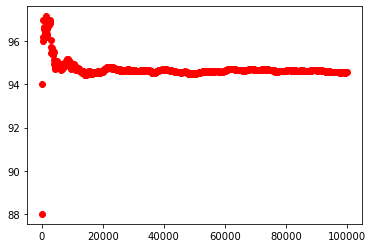

In [18]:
plt.scatter(xl,yl, color='red')
plt.show()

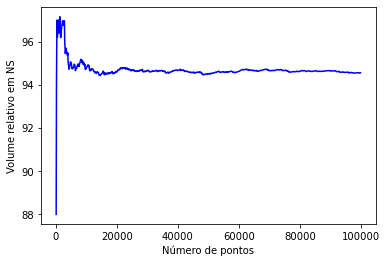

In [21]:
plt.plot(xl,yl, color='blue')
plt.xlabel('Número de pontos')
plt.ylabel('Volume relativo em NS')
plt.show()

In [5]:
for i in range(10,1000,10):
    print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
